# CarDekho Used Car Price Prediction



Problem Statement:

The primary objective of is project is to create a data science solution for predicting used car prices accurately by analyzing a diverse dataset including car model, no. of owners, age, mileage, fuel type, kilometers driven, features and location. The aim is to build a machine learning model that offers users to find current valuations for used cars.



Data Understanding

The Dataset contains multiple excel files, each represents its city, columns in each excel gives you an overview of each car, its details, specification and available features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings


warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
#Import data from all excel files

bang = pd.read_excel("C:\\Users\\User\\Downloads\\bangalore_cars.xlsx")
kolkata = pd.read_excel("C:\\Users\\User\\Downloads\\kolkata_cars.xlsx")
hyderabad = pd.read_excel("C:\\Users\\User\\Downloads\\hyderabad_cars.xlsx")
delhi = pd.read_excel("C:\\Users\\User\\Downloads\\delhi_cars.xlsx")
jaipur = pd.read_excel("C:\\Users\\User\\Downloads\\jaipur_cars (1).xlsx")
chennai = pd.read_excel("C:\\Users\\User\\Downloads\\chennai_cars.xlsx")

In [3]:
bang

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
...,...,...,...,...,...
1476,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1477,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1478,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1479,"{'it': 0, 'ft': 'Diesel', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...



## Overview
## Dataset Structure

The dataset consists of three main sections:

1. **New Car Detail:**
   - `it` (integer): Ignition type.
   - `ft` (string): Fuel type (e.g., Petrol).
   - `bt` (string): Body type (e.g., Hatchback).
   - `km` (string): Kilometers driven.
   - `transmission` (string): Transmission type (e.g., Manual).
   - `ownerNo` (integer): Number of previous owners.
   - `owner` (string): Ownership details.
   - `oem` (string): Original Equipment Manufacturer (e.g., Maruti).
   - `model` (string): Car model (e.g., Maruti Celerio).
   - `modelYear` (integer): Year of car manufacture.
   - `centralVariantId` (integer): Central variant ID.
   - `variantName` (string): Variant name.
   - `price` (string): Price of the used car.
   - `priceActual` (string): Actual price (if available).
   - `priceSaving` (string): Price saving information (if available).
   - `priceFixedText` (string): Fixed price details.
   - `trendingText` (dictionary): Trending car information.

2. **New Car Overview:**
   - `heading` (string): Car overview heading.
   - `top` (list of dictionaries): Top details, including keys like registration year, insurance validity, fuel type, etc.
   - `bottomData` (None): Additional bottom data (currently not available).

3. **New Car Feature:**
   - `heading` (string): Features heading.
   - `top` (list of strings): Top features.
   - `data` (list of dictionaries): Detailed feature information categorized by comfort, interior, exterior, safety, etc.

4. **New Car Specs:**
   - `heading` (string): Specifications heading.
   - `top` (list of dictionaries): Top specifications like mileage, engine, max power, torque, etc.
   - `data` (list of dictionaries): Detailed engine and transmission information, dimensions, capacity, and miscellaneous details.




# new_car_detail	bang Features:

This feature has Fuel_Type,Body_Type,Mileage_km,Transmission,Number ownwer,oem,Car model,modelYear,centralVariantId,variantName,price 


In [4]:
import ast
#The ast module in Python provides functions that allow you to work with the abstract syntax tree of Python code.
#ast.literal_eval function to safely evaluate literal expressions contained in strings. The purpose of applying ast.literal_eval is to interpret the string representation of a Python literal (such as a dictionary, list, tuple, number, string, or boolean) and convert it into the corresponding Python object.
bang['new_car_detail'] = bang['new_car_detail'].apply(ast.literal_eval)
bang['new_car_overview'] = bang['new_car_overview'].apply(ast.literal_eval)
bang['new_car_feature'] = bang['new_car_feature'].apply(ast.literal_eval)
bang['new_car_specs'] = bang['new_car_specs'].apply(ast.literal_eval)

In [5]:
#applies a lambda function to each element in the 'new_car_detail' column.

#The lambda function uses the get method to retrieve the value associated with the key  from each dictionary in the 'new_car_detail' column.
#If the key is not present, it returns an empty string (''). The result is assigned to a new column named 

bang['Fuel_Type'] = bang['new_car_detail'].apply(lambda x: x.get('ft', ''))
bang['Body_Type'] = bang['new_car_detail'].apply(lambda x: x.get('bt', ''))
bang['Mileage_km'] = bang['new_car_detail'].apply(lambda x: x.get('km', ''))
bang['Transmission type']= bang['new_car_detail'].apply(lambda x: x.get('transmission',''))
bang ['Number ownwer']= bang['new_car_detail'].apply(lambda x: x.get('ownerNo',''))
#bang['Ownership details']= bang['new_car_detail'].apply(lambda x: x.get('oem','')) 
bang['oem'] =  bang['new_car_detail'].apply(lambda x: x.get('oem',''))
bang['Car model'] =  bang['new_car_detail'].apply(lambda x: x.get('model',''))
bang['modelYear'] =bang['new_car_detail'].apply(lambda x: x.get('modelYear',''))
bang['centralVariantId' ]= bang['new_car_detail'].apply(lambda x: x.get('centralVariantId',''))
bang['variantName'] = bang['new_car_detail'].apply(lambda x: x.get('variantName',''))
bang['price'] = bang['new_car_detail'].apply(lambda x: x.get('price',''))
bang

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,Fuel_Type,Body_Type,Mileage_km,Transmission type,Number ownwer,oem,Car model,modelYear,centralVariantId,variantName,price
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,Hatchback,"1,20,000",Manual,3,Maruti,Maruti Celerio,2015,3979,VXI,₹ 4 Lakh
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,SUV,"32,706",Manual,2,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,₹ 8.11 Lakh
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,Hatchback,"11,949",Manual,1,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,₹ 5.85 Lakh
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,Sedan,"17,794",Manual,1,Hyundai,Hyundai Xcent,2014,1867,1.2 Kappa S Option,₹ 4.62 Lakh
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,SUV,"60,000",Manual,1,Maruti,Maruti SX4 S Cross,2015,4277,DDiS 200 Zeta,₹ 7.90 Lakh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,SUV,"1,56,039",Manual,2,Toyota,Toyota Fortuner,2012,2253,4x4 MT,₹ 16.49 Lakh
1477,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,Sedan,"56,000",Manual,2,Maruti,Maruti SX4,2008,4257,Zxi BSIII,₹ 3.30 Lakh
1478,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,Hatchback,"42,000",Manual,2,Honda,Honda Brio,2014,1188,S MT,₹ 4.25 Lakh
1479,"{'it': 0, 'ft': 'Diesel', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,Hatchback,"93,003",Manual,1,Hyundai,Hyundai i20,2018,5695,1.4 Asta Dual Tone,₹ 7.50 Lakh


# new_car_overview


In [6]:

#applies same a lambda function to each element in the 'new_car_overview' column.

#The lambda function uses the get method to retrieve the value associated with the key  from each dictionary in the 'new_car_overview' column.
#If the key is not present, it returns an empty string (''). The result is assigned to a new column named 

bang['Overview_heading'] = bang['new_car_overview'].apply(lambda x: x.get('heading', ''))
bang['Top_key'] = bang['new_car_overview'].apply(lambda x: x.get('top', []))


In [7]:
#applies a lambda function to each element in the 'Top_key' column. The lambda function checks if the value.
#If any of the conditions are not met (empty list, not a list, or other), it returns an empty string (''). 
#The result is assigned to a new column named 

bang['Top_key_value'] = bang['Top_key'].apply(lambda x: x[0]['value'] if x and isinstance(x, list) and len(x) > 0 else '')


In [8]:
#bang

# new_car_specs:




In [9]:
bang['Features'] = bang['new_car_specs'].apply(lambda x: x.get('heading', ''))
bang['Top specification'] = bang['new_car_specs'].apply(lambda x: x.get('top', []))
bang['Detailed engine'] = bang['new_car_specs'].apply(lambda x: x.get('data', []))

In [10]:
bang

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,Fuel_Type,Body_Type,Mileage_km,Transmission type,Number ownwer,...,modelYear,centralVariantId,variantName,price,Overview_heading,Top_key,Top_key_value,Features,Top specification,Detailed engine
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,Hatchback,"1,20,000",Manual,3,...,2015,3979,VXI,₹ 4 Lakh,Car overview,"[{'key': 'Registration Year', 'value': '2015',...",2015,Specifications,"[{'key': 'Mileage', 'value': '23.1 kmpl'}, {'k...","[{'heading': 'Engine and Transmission', 'subHe..."
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,SUV,"32,706",Manual,2,...,2018,6087,1.5 Petrol Titanium BSIV,₹ 8.11 Lakh,Car overview,"[{'key': 'Registration Year', 'value': 'Feb 20...",Feb 2018,Specifications,"[{'key': 'Mileage', 'value': '17 kmpl'}, {'key...","[{'heading': 'Engine and Transmission', 'subHe..."
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,Hatchback,"11,949",Manual,1,...,2018,2983,1.2 Revotron XZ,₹ 5.85 Lakh,Car overview,"[{'key': 'Registration Year', 'value': 'Sept 2...",Sept 2018,Specifications,"[{'key': 'Mileage', 'value': '23.84 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe..."
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,Sedan,"17,794",Manual,1,...,2014,1867,1.2 Kappa S Option,₹ 4.62 Lakh,Car overview,"[{'key': 'Registration Year', 'value': 'Dec 20...",Dec 2014,Specifications,"[{'key': 'Mileage', 'value': '19.1 kmpl'}, {'k...","[{'heading': 'Engine and Transmission', 'subHe..."
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,SUV,"60,000",Manual,1,...,2015,4277,DDiS 200 Zeta,₹ 7.90 Lakh,Car overview,"[{'key': 'Registration Year', 'value': '2015',...",2015,Specifications,"[{'key': 'Mileage', 'value': '23.65 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,SUV,"1,56,039",Manual,2,...,2012,2253,4x4 MT,₹ 16.49 Lakh,Car overview,"[{'key': 'Registration Year', 'value': 'May 20...",May 2012,Specifications,"[{'key': 'Mileage', 'value': '12.55 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe..."
1477,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,Sedan,"56,000",Manual,2,...,2008,4257,Zxi BSIII,₹ 3.30 Lakh,Car overview,"[{'key': 'Registration Year', 'value': 'Jun 20...",Jun 2008,Specifications,"[{'key': 'Mileage', 'value': '15 kmpl'}, {'key...","[{'heading': 'Engine and Tra

In [11]:
# removing unnessary features
bang.drop(['new_car_detail', 'new_car_overview', 'new_car_feature', 'new_car_specs', 'car_links','Overview_heading','Top_key','Features'],axis = 1,inplace = True)

In [12]:
bang

,Fuel_Type,Body_Type,Mileage_km,Transmission type,Number ownwer,oem,Car model,modelYear,centralVariantId,variantName,price,Top_key_value,Top specification,Detailed engine
0,Petrol,Hatchback,"1,20,000",Manual,3,Maruti,Maruti Celerio,2015,3979,VXI,₹ 4 Lakh,2015,"[{'key': 'Mileage', 'value': '23.1 kmpl'}, {'k...","[{'heading': 'Engine and Transmission', 'subHe..."
1,Petrol,SUV,"32,706",Manual,2,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,₹ 8.11 Lakh,Feb 2018,"[{'key': 'Mileage', 'value': '17 kmpl'}, {'key...","[{'heading': 'Engine and Transmission', 'subHe..."
2,Petrol,Hatchback,"11,949",Manual,1,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,₹ 5.85 Lakh,Sept 2018,"[{'key': 'Mileage', 'value': '23.84 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe..."
3,Petrol,Sedan,"17,794",Manual,1,Hyundai,Hyundai Xcent,2014,1867,1.2 Kappa S Option,₹ 4.62 Lakh,Dec 2014,"[{'key': 'Mileage', 'value': '19.1 kmpl'}, {'k...","[{'heading': 'Engine and Transmission', 'subHe..."
4,Diesel,SUV,"60,000",Manual,1,Maruti,Maruti SX4 S Cross,2015,4277,DDiS 200 Zeta,₹ 7.90 Lakh,2015,"[{'key': 'Mileage', 'value': '23.65 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476,Diesel,SUV,"1,56,039",Manual,2,Toyota,Toyota Fortuner,2012,2253,4x4 MT,₹ 16.49 Lakh,May 2012,"[{'key': 'Mileage', 'value': '12.55 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe..."
1477,Petrol,Sedan,"56,000",Manual,2,Maruti,Maruti SX4,2008,4257,Zxi BSIII,₹ 3.30 Lakh,Jun 2008,"[{'key': 'Mileage', 'value': '15 kmpl'}, {'key...","[{'heading': 'Engine and Transmission', 'subHe..."
1478,Petrol,Hatchback,"42,000",Manual,2,Honda,Honda Brio,2014,1188,S MT,₹ 4.25 Lakh,Sept 2014,"[{'key': 'Mileage', 'value': '19.4 kmpl'}, {'k...","[{'heading': 'Engine and Transmission', 'subHe..."
1479,Diesel,Hatchback,"93,003",Manual,1,Hyundai,Hyundai i20,2018,5695,1.4 Asta Dual Tone,₹ 7.50 Lakh,Dec 2018,"[{'key': 'Mileage', 'value': '22.54 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe..."


# Top specification	Detailed engine:


In [13]:
selected_features = bang[['Top specification', 'Detailed engine']].copy()
selected_features

,Top specification,Detailed engine
0,"[{'key': 'Mileage', 'value': '23.1 kmpl'}, {'k...","[{'heading': 'Engine and Transmission', 'subHe..."
1,"[{'key': 'Mileage', 'value': '17 kmpl'}, {'key...","[{'heading': 'Engine and Transmission', 'subHe..."
2,"[{'key': 'Mileage', 'value': '23.84 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe..."
3,"[{'key': 'Mileage', 'value': '19.1 kmpl'}, {'k...","[{'heading': 'Engine and Transmission', 'subHe..."
4,"[{'key': 'Mileage', 'value': '23.65 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe..."
...,...,...
1476,"[{'key': 'Mileage', 'value': '12.55 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe..."
1477,"[{'key': 'Mileage', 'value': '15 kmpl'}, {'key...","[{'heading': 'Engine and Transmission', 'subHe..."
1478,"[{'key': 'Mileage', 'value': '19.4 kmpl'}, {'k...","[{'heading': 'Engine and Transmission', 'subHe..."
1479,"[{'key': 'Mileage', 'value': '22.54 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe..."


In [14]:

# Function to extract specified features
def extract_features(row):
    features = {
        'Mileage': None,
        'Engine': None,
        'Max Power': None,
        'Torque': None,
        'Seats': None
    }

    if isinstance(row, list):
        for item in row:
            if 'key' in item and 'value' in item:
                key, value = item['key'], item['value']
                if key in features:
                    features[key] = value

    return features

# Apply the extraction function to create new columns
features_df = selected_features['Top specification'].apply(extract_features).apply(pd.Series)

In [15]:
features_df

,Mileage,Engine,Max Power,Torque,Seats
0,23.1 kmpl,998 CC,67.04bhp,90Nm,5
1,17 kmpl,1497 CC,121.31bhp,150Nm,5
2,23.84 kmpl,1199 CC,84bhp,114Nm,5
3,19.1 kmpl,1197 CC,81.86bhp,113.75Nm,5
4,23.65 kmpl,1248 CC,88.5bhp,200Nm,5
...,...,...,...,...,...
1476,12.55 kmpl,2982 CC,168.5bhp,343Nm,7
1477,15 kmpl,1586 CC,104.68,145,5
1478,19.4 kmpl,1198 CC,86.8bhp,109Nm,5
1479,22.54 kmpl,1396 CC,88.73bhp,219.7Nm,5


In [16]:
#checking the null values 

features_df.isnull().sum()

Mileage      42
Engine        3
Max Power    16
Torque       16
Seats         1
dtype: int64

In [17]:
#handling the null values
mileage_mode = features_df['Mileage'].mode()[0]
Engine_mode = features_df['Engine'].mode()[0]
Max_Power_mode = features_df['Max Power'].mode()[0]
Torque_mode = features_df['Torque'].mode()[0]
Seats_mode = features_df['Seats'].mode()[0]

# Fill missing values with the mode
features_df['Mileage'] = features_df['Mileage'].fillna(mileage_mode)
features_df['Engine'] = features_df['Engine'].fillna(Engine_mode)
features_df['Max Power'] = features_df['Max Power'].fillna(Max_Power_mode)
features_df['Torque'] = features_df['Torque'].fillna(Torque_mode)
features_df['Seats'] = features_df['Seats'].fillna(Seats_mode)

features_df

,Mileage,Engine,Max Power,Torque,Seats
0,23.1 kmpl,998 CC,67.04bhp,90Nm,5
1,17 kmpl,1497 CC,121.31bhp,150Nm,5
2,23.84 kmpl,1199 CC,84bhp,114Nm,5
3,19.1 kmpl,1197 CC,81.86bhp,113.75Nm,5
4,23.65 kmpl,1248 CC,88.5bhp,200Nm,5
...,...,...,...,...,...
1476,12.55 kmpl,2982 CC,168.5bhp,343Nm,7
1477,15 kmpl,1586 CC,104.68,145,5
1478,19.4 kmpl,1198 CC,86.8bhp,109Nm,5
1479,22.54 kmpl,1396 CC,88.73bhp,219.7Nm,5


In [18]:
# Concatenating with Different Indices:
merged_df_bang = pd.concat([bang, features_df], axis=1)

In [19]:
merged_df_bang

,Fuel_Type,Body_Type,Mileage_km,Transmission type,Number ownwer,oem,Car model,modelYear,centralVariantId,variantName,price,Top_key_value,Top specification,Detailed engine,Mileage,Engine,Max Power,Torque,Seats
0,Petrol,Hatchback,"1,20,000",Manual,3,Maruti,Maruti Celerio,2015,3979,VXI,₹ 4 Lakh,2015,"[{'key': 'Mileage', 'value': '23.1 kmpl'}, {'k...","[{'heading': 'Engine and Transmission', 'subHe...",23.1 kmpl,998 CC,67.04bhp,90Nm,5
1,Petrol,SUV,"32,706",Manual,2,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,₹ 8.11 Lakh,Feb 2018,"[{'key': 'Mileage', 'value': '17 kmpl'}, {'key...","[{'heading': 'Engine and Transmission', 'subHe...",17 kmpl,1497 CC,121.31bhp,150Nm,5
2,Petrol,Hatchback,"11,949",Manual,1,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,₹ 5.85 Lakh,Sept 2018,"[{'key': 'Mileage', 'value': '23.84 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe...",23.84 kmpl,1199 CC,84bhp,114Nm,5
3,Petrol,Sedan,"17,794",Manual,1,Hyundai,Hyundai Xcent,2014,1867,1.2 Kappa S Option,₹ 4.62 Lakh,Dec 2014,"[{'key': 'Mileage', 'value': '19.1 kmpl'}, {'k...","[{'heading': 'Engine and Transmission', 'subHe...",19.1 kmpl,1197 CC,81.86bhp,113.75Nm,5
4,Diesel,SUV,"60,000",Manual,1,Maruti,Maruti SX4 S Cross,2015,4277,DDiS 200 Zeta,₹ 7.90 Lakh,2015,"[{'key': 'Mileage', 'value': '23.65 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe...",23.65 kmpl,1248 CC,88.5bhp,200Nm,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476,Diesel,SUV,"1,56,039",Manual,2,Toyota,Toyota Fortuner,2012,2253,4x4 MT,₹ 16.49 Lakh,May 2012,"[{'key': 'Mileage', 'value': '12.55 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe...",12.55 kmpl,2982 CC,168.5bhp,343Nm,7
1477,Petrol,Sedan,"56,000",Manual,2,Maruti,Maruti SX4,2008,4257,Zxi BSIII,₹ 3.30 Lakh,Jun 2008,"[{'key': 'Mileage', 'value': '15 kmpl'}, {'key...","[{'heading': 'Engine and Transmission', 'subHe...",15 kmpl,1586 CC,104.68,145,5
1478,Petrol,Hatchback,"42,000",Manual,2,Honda,Honda Brio,2014,1188,S MT,₹ 4.25 Lakh,Sept 2014,"[{'key': 'Mileage', 'value': '19.4 kmpl'}, {'k...","[{'heading': 'Engine and Transmission', 'subHe...",19.4 kmpl,1198 CC,86.8bhp,109Nm,5
1479,Diesel,Hatchback,"93,003",Manual,1,Hyundai,Hyundai i20,2018,5695,1.4 Asta Dual Tone,₹ 7.50 Lakh,Dec 2018,"[{'key': 'Mileage', 'value': '22.54 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe...",22.54 kmpl,1396 CC,88.73bhp,219.7Nm,5


In [20]:
# removing the duplicate features:
merged_df_bang.drop(['Top specification','Detailed engine'],axis = 1 ,inplace = True)

# next step using hyderabad data set same way :

In [21]:
hyderabad

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
...,...,...,...,...,...
1478,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1479,"{'it': 0, 'ft': 'Diesel', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1480,"{'it': 0, 'ft': 'Diesel', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1481,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


# new_car_detail	hyderabad Features:

In [22]:
import ast
hyderabad['new_car_detail'] = hyderabad['new_car_detail'].apply(ast.literal_eval)
hyderabad['new_car_overview'] = hyderabad['new_car_overview'].apply(ast.literal_eval)
hyderabad['new_car_feature'] = hyderabad['new_car_feature'].apply(ast.literal_eval)
hyderabad['new_car_specs'] = hyderabad['new_car_specs'].apply(ast.literal_eval)

In [23]:
hyderabad['Fuel_Type'] = hyderabad['new_car_detail'].apply(lambda x: x.get('ft', ''))
hyderabad['Body_Type'] = hyderabad['new_car_detail'].apply(lambda x: x.get('bt', ''))
hyderabad['Mileage_km'] = hyderabad['new_car_detail'].apply(lambda x: x.get('km', ''))
hyderabad['Transmission type']= hyderabad['new_car_detail'].apply(lambda x: x.get('transmission',''))
hyderabad ['Number ownwer']= hyderabad['new_car_detail'].apply(lambda x: x.get('ownerNo',''))
#bang['Ownership details']= bang['new_car_detail'].apply(lambda x: x.get('oem','')) 
hyderabad['oem'] =  hyderabad['new_car_detail'].apply(lambda x: x.get('oem',''))
hyderabad['Car model'] =  hyderabad['new_car_detail'].apply(lambda x: x.get('model',''))
hyderabad['modelYear'] =hyderabad['new_car_detail'].apply(lambda x: x.get('modelYear',''))
hyderabad['centralVariantId' ]= hyderabad['new_car_detail'].apply(lambda x: x.get('centralVariantId',''))
hyderabad['variantName'] = hyderabad['new_car_detail'].apply(lambda x: x.get('variantName',''))
hyderabad['price'] = hyderabad['new_car_detail'].apply(lambda x: x.get('price',''))
hyderabad

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,Fuel_Type,Body_Type,Mileage_km,Transmission type,Number ownwer,oem,Car model,modelYear,centralVariantId,variantName,price
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,Hatchback,"20,000",Automatic,1,Volkswagen,Volkswagen Polo,2022,7746,1.0 TSI Highline Plus AT,₹ 10.44 Lakh
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,Hatchback,"85,582",Manual,2,Hyundai,Hyundai EON,2014,1502,Era Plus,₹ 2.60 Lakh
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,SUV,"10,000",Manual,1,Hyundai,Hyundai Venue,2023,9153,S BSVI,₹ 9.55 Lakh
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,Hatchback,"50,750",Manual,1,Maruti,Maruti Baleno,2017,3970,1.2 Alpha,₹ 6.71 Lakh
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,SUV,"10,000",Automatic,1,Mahindra,Mahindra Thar,2022,8074,LX 4-Str Hard Top AT BSVI,₹ 19 Lakh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,SUV,"60,000",Manual,1,Mahindra,Mahindra XUV500,2013,3823,W8 2WD,₹ 7 Lakh
1479,"{'it': 0, 'ft': 'Diesel', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,Sedan,"50,000",Automatic,1,Jaguar,Jaguar XF,2014,5007,3.0 Litre S Premium Luxury,₹ 20 Lakh
1480,"{'it': 0, 'ft': 'Diesel', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,Sedan,"1,20,000",Automatic,3,BMW,BMW 5 Series,2018,250,520d Luxury Line,₹ 35 Lakh
1481,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,SUV,"50,000",Automatic,2,Tata,Tata Nexon,2019,6500,1.5 Revotorq XMA,₹ 8.50 Lakh


# new_car_overview

In [24]:
hyderabad['Overview_heading'] = hyderabad['new_car_overview'].apply(lambda x: x.get('heading', ''))
hyderabad['Top_key'] = hyderabad['new_car_overview'].apply(lambda x: x.get('top', []))


In [25]:
hyderabad['Top_key_value'] = hyderabad['Top_key'].apply(lambda x: x[0]['value'] if x and isinstance(x, list) and len(x) > 0 else '')

In [26]:
#hyderabad

# new_car_specs:

In [27]:

hyderabad['Features'] = hyderabad['new_car_specs'].apply(lambda x: x.get('heading', ''))
hyderabad['Top specification'] = hyderabad['new_car_specs'].apply(lambda x: x.get('top', []))
hyderabad['Detailed engine'] = hyderabad['new_car_specs'].apply(lambda x: x.get('data', []))

In [28]:
#hyderabad

In [29]:
# removing unnessary features
hyderabad.drop(['new_car_detail', 'new_car_overview', 'new_car_feature', 'new_car_specs', 'car_links','Overview_heading','Top_key','Features'],axis = 1,inplace = True)

In [30]:
hyderabad

,Fuel_Type,Body_Type,Mileage_km,Transmission type,Number ownwer,oem,Car model,modelYear,centralVariantId,variantName,price,Top_key_value,Top specification,Detailed engine
0,Petrol,Hatchback,"20,000",Automatic,1,Volkswagen,Volkswagen Polo,2022,7746,1.0 TSI Highline Plus AT,₹ 10.44 Lakh,2022,"[{'key': 'Mileage', 'value': '16.47 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe..."
1,Petrol,Hatchback,"85,582",Manual,2,Hyundai,Hyundai EON,2014,1502,Era Plus,₹ 2.60 Lakh,Oct 2014,"[{'key': 'Mileage', 'value': '21.1 kmpl'}, {'k...","[{'heading': 'Engine and Transmission', 'subHe..."
2,Petrol,SUV,"10,000",Manual,1,Hyundai,Hyundai Venue,2023,9153,S BSVI,₹ 9.55 Lakh,2023,"[{'key': 'Engine', 'value': '1197 CC'}, {'key'...","[{'heading': 'Engine and Transmission', 'subHe..."
3,Petrol,Hatchback,"50,750",Manual,1,Maruti,Maruti Baleno,2017,3970,1.2 Alpha,₹ 6.71 Lakh,Mar 2017,"[{'key': 'Mileage', 'value': '21.4 kmpl'}, {'k...","[{'heading': 'Engine and Transmission', 'subHe..."
4,Petrol,SUV,"10,000",Automatic,1,Mahindra,Mahindra Thar,2022,8074,LX 4-Str Hard Top AT BSVI,₹ 19 Lakh,2022,"[{'key': 'Engine', 'value': '1997 CC'}, {'key'...","[{'heading': 'Engine and Transmission', 'subHe..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,Diesel,SUV,"60,000",Manual,1,Mahindra,Mahindra XUV500,2013,3823,W8 2WD,₹ 7 Lakh,2013,"[{'key': 'Mileage', 'value': '15.1 kmpl'}, {'k...","[{'heading': 'Engine and Transmission', 'subHe..."
1479,Diesel,Sedan,"50,000",Automatic,1,Jaguar,Jaguar XF,2014,5007,3.0 Litre S Premium Luxury,₹ 20 Lakh,2014,"[{'key': 'Mileage', 'value': '14.74 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe..."
1480,Diesel,Sedan,"1,20,000",Automatic,3,BMW,BMW 5 Series,2018,250,520d Luxury Line,₹ 35 Lakh,2018,"[{'key': 'Mileage', 'value': '20.37 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe..."
1481,Diesel,SUV,"50,000",Automatic,2,Tata,Tata Nexon,2019,6500,1.5 Revotorq XMA,₹ 8.50 Lakh,2019,"[{'key': 'Mileage', 'value': '21.5 kmpl'}, {'k...","[{'heading': 'Engine and Transmission', 'subHe..."


# Top specification	Detailed engine for kolkata dataset:

In [31]:
selected_features_df1= hyderabad[['Top specification', 'Detailed engine']].copy()

In [32]:
selected_features_df1

,Top specification,Detailed engine
0,"[{'key': 'Mileage', 'value': '16.47 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe..."
1,"[{'key': 'Mileage', 'value': '21.1 kmpl'}, {'k...","[{'heading': 'Engine and Transmission', 'subHe..."
2,"[{'key': 'Engine', 'value': '1197 CC'}, {'key'...","[{'heading': 'Engine and Transmission', 'subHe..."
3,"[{'key': 'Mileage', 'value': '21.4 kmpl'}, {'k...","[{'heading': 'Engine and Transmission', 'subHe..."
4,"[{'key': 'Engine', 'value': '1997 CC'}, {'key'...","[{'heading': 'Engine and Transmission', 'subHe..."
...,...,...
1478,"[{'key': 'Mileage', 'value': '15.1 kmpl'}, {'k...","[{'heading': 'Engine and Transmission', 'subHe..."
1479,"[{'key': 'Mileage', 'value': '14.74 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe..."
1480,"[{'key': 'Mileage', 'value': '20.37 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe..."
1481,"[{'key': 'Mileage', 'value': '21.5 kmpl'}, {'k...","[{'heading': 'Engine and Transmission', 'subHe..."


In [33]:

# Function to extract specified features
def extract_features(row):
    features = {
        'Mileage': None,
        'Engine': None,
        'Max Power': None,
        'Torque': None,
        'Seats': None
    }

    if isinstance(row, list):
        for item in row:
            if 'key' in item and 'value' in item:
                key, value = item['key'], item['value']
                if key in features:
                    features[key] = value

    return features

# Apply the extraction function to create new columns
hyderabad_features_df = selected_features_df1['Top specification'].apply(extract_features).apply(pd.Series)
hyderabad_features_df

,Mileage,Engine,Max Power,Torque,Seats
0,16.47 kmpl,999 CC,108.62bhp,175nm,5
1,21.1 kmpl,814 CC,55.2bhp,74.5Nm,5
2,None,1197 CC,81.80bhp,113.8Nm,5
3,21.4 kmpl,1197 CC,83.1bhp,115Nm,5
4,None,1997 CC,150bhp,320Nm,4
...,...,...,...,...,...
1478,15.1 kmpl,2179 CC,140bhp,330Nm,7
1479,14.74 kmpl,2993 CC,270.9bhp,600Nm,5
1480,20.37 kmpl,1995 CC,187.74bhp,400Nm,5
1481,21.5 kmpl,1497 CC,108.5bhp,260Nm,5


In [34]:
hyderabad_features_df.isnull().sum()

Mileage      42
Engine        1
Max Power    11
Torque       11
Seats         0
dtype: int64

In [35]:
mileage_mode = hyderabad_features_df['Mileage'].mode()[0]
Engine_mode = hyderabad_features_df['Engine'].mode()[0]
Max_Power_mode = hyderabad_features_df['Max Power'].mode()[0]
Torque_mode = hyderabad_features_df['Torque'].mode()[0]
Seats_mode = hyderabad_features_df['Seats'].mode()[0]

# Fill missing values with the mode
hyderabad_features_df['Mileage'] = hyderabad_features_df['Mileage'].fillna(mileage_mode)
hyderabad_features_df['Engine'] = hyderabad_features_df['Engine'].fillna(Engine_mode)
hyderabad_features_df['Max Power'] = hyderabad_features_df['Max Power'].fillna(Max_Power_mode)
hyderabad_features_df['Torque'] = hyderabad_features_df['Torque'].fillna(Torque_mode)
hyderabad_features_df['Seats'] = hyderabad_features_df['Seats'].fillna(Seats_mode)

In [36]:
hyderabad_features_df.isnull().sum()

Mileage      0
Engine       0
Max Power    0
Torque       0
Seats        0
dtype: int64

In [37]:
merged_hyderabad_df= pd.concat([hyderabad, hyderabad_features_df], axis=1)

In [38]:
merged_hyderabad_df.drop(['Top specification','Detailed engine'],axis = 1 ,inplace = True)

In [39]:
#merged_hyderabad_df

In [40]:
#kolkata this dataset using same way
kolkata

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
...,...,...,...,...,...
1376,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1377,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1378,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1379,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


# new_car_detail for kolkata:

In [41]:
import ast
kolkata['new_car_detail'] = kolkata['new_car_detail'].apply(ast.literal_eval)
kolkata['new_car_overview'] = kolkata['new_car_overview'].apply(ast.literal_eval)
kolkata['new_car_feature'] = kolkata['new_car_feature'].apply(ast.literal_eval)
kolkata['new_car_specs'] = kolkata['new_car_specs'].apply(ast.literal_eval)

In [42]:
kolkata['Fuel_Type'] = kolkata['new_car_detail'].apply(lambda x: x.get('ft', ''))
kolkata['Body_Type'] = kolkata['new_car_detail'].apply(lambda x: x.get('bt', ''))
kolkata['Mileage_km'] = kolkata['new_car_detail'].apply(lambda x: x.get('km', ''))
kolkata['Transmission type']= kolkata['new_car_detail'].apply(lambda x: x.get('transmission',''))
kolkata ['Number ownwer']= kolkata['new_car_detail'].apply(lambda x: x.get('ownerNo',''))
#bang['Ownership details']= bang['new_car_detail'].apply(lambda x: x.get('oem','')) 
kolkata['oem'] =  kolkata['new_car_detail'].apply(lambda x: x.get('oem',''))
kolkata['Car model'] =  kolkata['new_car_detail'].apply(lambda x: x.get('model',''))
kolkata['modelYear'] =kolkata['new_car_detail'].apply(lambda x: x.get('modelYear',''))
kolkata['centralVariantId' ]= kolkata['new_car_detail'].apply(lambda x: x.get('centralVariantId',''))
kolkata['variantName'] = kolkata['new_car_detail'].apply(lambda x: x.get('variantName',''))
kolkata['price'] = kolkata['new_car_detail'].apply(lambda x: x.get('price',''))
kolkata

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,Fuel_Type,Body_Type,Mileage_km,Transmission type,Number ownwer,oem,Car model,modelYear,centralVariantId,variantName,price
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,Sedan,"70,000",Automatic,3,Toyota,Toyota Camry,2014,2123,Hybrid,₹ 9.75 Lakh
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,Hatchback,"23,981",Manual,1,Datsun,Datsun RediGO,2017,5236,T Option,₹ 2.66 Lakh
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,SUV,"7,100",Automatic,1,Renault,Renault Kiger,2021,8352,RXT AMT,₹ 5.95 Lakh
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,Hatchback,"71,574",Manual,2,Hyundai,Hyundai i20,2011,1642,1.2 Sportz,₹ 2.23 Lakh
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,SUV,"50,000",Automatic,2,Audi,Audi Q3,2014,99,35 TDI Quattro Premium,₹ 12 Lakh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,Hatchback,"10,000",Manual,1,Maruti,Maruti Celerio,2022,8682,ZXI BSVI,₹ 5.10 Lakh
1377,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,Hatchback,"1,20,000",Manual,1,Maruti,Maruti Alto 800,2014,3943,LXI,₹ 1.80 Lakh
1378,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,Sedan,"50,000",Automatic,3,Mercedes-Benz,Mercedes-Benz C-Class,2011,4672,C 200 CGI Elegance,₹ 5.50 Lakh
1379,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,Hatchback,"40,000",Manual,1,Maruti,Maruti Ritz,2012,4144,ZXi,₹ 1.40 Lakh


# new_car_overview 

In [43]:
kolkata['Overview_heading'] = kolkata['new_car_overview'].apply(lambda x: x.get('heading', ''))
kolkata['Top_key'] = kolkata['new_car_overview'].apply(lambda x: x.get('top', []))


In [44]:
kolkata['Top_key_value'] = kolkata['Top_key'].apply(lambda x: x[0]['value'] if x and isinstance(x, list) and len(x) > 0 else '')

# new_car_specs:

In [45]:
kolkata['Features'] = kolkata['new_car_specs'].apply(lambda x: x.get('heading', ''))
kolkata['Top specification'] = kolkata['new_car_specs'].apply(lambda x: x.get('top', []))
kolkata['Detailed engine'] = kolkata['new_car_specs'].apply(lambda x: x.get('data', []))

In [46]:
# removing unnessary features
kolkata.drop(['new_car_detail', 'new_car_overview', 'new_car_feature', 'new_car_specs', 'car_links','Overview_heading','Top_key','Features'],axis = 1,inplace = True)

# Top specification	Detailed 

In [47]:
selected_featuresdf2= kolkata[['Top specification', 'Detailed engine']].copy()


In [48]:
selected_featuresdf2

,Top specification,Detailed engine
0,"[{'key': 'Mileage', 'value': '19.16 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe..."
1,"[{'key': 'Mileage', 'value': '22.7 kmpl'}, {'k...","[{'heading': 'Engine and Transmission', 'subHe..."
2,"[{'key': 'Mileage', 'value': '19.03 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe..."
3,"[{'key': 'Mileage', 'value': '17 kmpl'}, {'key...","[{'heading': 'Engine and Transmission', 'subHe..."
4,"[{'key': 'Mileage', 'value': '15.73 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe..."
...,...,...
1376,"[{'key': 'Mileage', 'value': '25.24 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe..."
1377,"[{'key': 'Mileage', 'value': '22.74 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe..."
1378,"[{'key': 'Mileage', 'value': '11.74 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe..."
1379,"[{'key': 'Mileage', 'value': '18.5 kmpl'}, {'k...","[{'heading': 'Engine and Transmission', 'subHe..."


In [49]:

# Function to extract specified features
def extract_features(row):
    features = {
        'Mileage': None,
        'Engine': None,
        'Max Power': None,
        'Torque': None,
        'Seats': None
    }

    if isinstance(row, list):
        for item in row:
            if 'key' in item and 'value' in item:
                key, value = item['key'], item['value']
                if key in features:
                    features[key] = value

    return features

# Apply the extraction function to create new columns
kolkata_features_df = selected_featuresdf2['Top specification'].apply(extract_features).apply(pd.Series)



In [50]:
#checking the null values
kolkata_features_df.isnull().sum()

Mileage      47
Engine        0
Max Power    10
Torque       10
Seats         3
dtype: int64

In [51]:
# implies the null values using Mode method

mileage_mode = kolkata_features_df['Mileage'].mode()[0]
Engine_mode = kolkata_features_df['Engine'].mode()[0]
Max_Power_mode = kolkata_features_df['Max Power'].mode()[0]
Torque_mode = kolkata_features_df['Torque'].mode()[0]
Seats_mode = kolkata_features_df['Seats'].mode()[0]

# Fill missing values with the mode
kolkata_features_df['Mileage'] = kolkata_features_df['Mileage'].fillna(mileage_mode)
kolkata_features_df['Engine'] = kolkata_features_df['Engine'].fillna(Engine_mode)
kolkata_features_df['Max Power'] = kolkata_features_df['Max Power'].fillna(Max_Power_mode)
kolkata_features_df['Torque'] = kolkata_features_df['Torque'].fillna(Torque_mode)
kolkata_features_df['Seats'] = kolkata_features_df['Seats'].fillna(Seats_mode)

In [52]:
merged_kolkata_df = pd.concat([kolkata, kolkata_features_df], axis=1)

In [53]:
merged_kolkata_df

,Fuel_Type,Body_Type,Mileage_km,Transmission type,Number ownwer,oem,Car model,modelYear,centralVariantId,variantName,price,Top_key_value,Top specification,Detailed engine,Mileage,Engine,Max Power,Torque,Seats
0,Petrol,Sedan,"70,000",Automatic,3,Toyota,Toyota Camry,2014,2123,Hybrid,₹ 9.75 Lakh,2014,"[{'key': 'Mileage', 'value': '19.16 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe...",19.16 kmpl,2494 CC,158.2bhp,213Nm,5
1,Petrol,Hatchback,"23,981",Manual,1,Datsun,Datsun RediGO,2017,5236,T Option,₹ 2.66 Lakh,Jul 2017,"[{'key': 'Mileage', 'value': '22.7 kmpl'}, {'k...","[{'heading': 'Engine and Transmission', 'subHe...",22.7 kmpl,799 CC,53.64bhp,72Nm,5
2,Petrol,SUV,"7,100",Automatic,1,Renault,Renault Kiger,2021,8352,RXT AMT,₹ 5.95 Lakh,Nov 2021,"[{'key': 'Mileage', 'value': '19.03 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe...",19.03 kmpl,999 CC,71.01bhp,96Nm,5
3,Petrol,Hatchback,"71,574",Manual,2,Hyundai,Hyundai i20,2011,1642,1.2 Sportz,₹ 2.23 Lakh,Feb 2012,"[{'key': 'Mileage', 'value': '17 kmpl'}, {'key...","[{'heading': 'Engine and Transmission', 'subHe...",17 kmpl,1197 CC,80 PS at 5200 rpm,"11.4 kgm at 4,000 rpm",5
4,Diesel,SUV,"50,000",Automatic,2,Audi,Audi Q3,2014,99,35 TDI Quattro Premium,₹ 12 Lakh,2014,"[{'key': 'Mileage', 'value': '15.73 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe...",15.73 kmpl,1968 CC,174.33bhp,380Nm,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376,Petrol,Hatchback,"10,000",Manual,1,Maruti,Maruti Celerio,2022,8682,ZXI BSVI,₹ 5.10 Lakh,2022,"[{'key': 'Mileage', 'value': '25.24 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe...",25.24 kmpl,998 CC,65.71bhp,89Nm,5
1377,Petrol,Hatchback,"1,20,000",Manual,1,Maruti,Maruti Alto 800,2014,3943,LXI,₹ 1.80 Lakh,2014,"[{'key': 'Mileage', 'value': '22.74 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe...",22.74 kmpl,796 CC,47.3bhp,69Nm,5
1378,Petrol,Sedan,"50,000",Automatic,3,Mercedes-Benz,Mercedes-Benz C-Class,2011,4672,C 200 CGI Elegance,₹ 5.50 Lakh,2011,"[{'key': 'Mileage', 'value': '11.74 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe...",11.74 kmpl,1796 CC,186bhp,285Nm,5
1379,Petrol,Hatchback,"40,000",Manual,1,Maruti,Maruti Ritz,2012,4144,ZXi,₹ 1.40 Lakh,2012,"[{'key': 'Mileage', 'value': '18.5 kmpl'}, {'k...","[{'heading': 'Engine and Transmission', 'subHe...",18.5 kmpl,1197 CC,85.80bhp,114Nm,5


In [54]:
merged_kolkata_df.drop(['Top specification','Detailed engine'],axis = 1 ,inplace = True)
#merged_kolkata_df

# Extracting this feature  chennai dataset new_car_detail :

In [55]:

chennai

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Minivans', 'k...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Low...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
...,...,...,...,...,...
1414,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1415,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1416,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1417,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [56]:
import ast
chennai['new_car_detail'] = chennai['new_car_detail'].apply(ast.literal_eval)
chennai['new_car_overview'] = chennai['new_car_overview'].apply(ast.literal_eval)
chennai['new_car_feature'] = chennai['new_car_feature'].apply(ast.literal_eval)
chennai['new_car_specs'] = chennai['new_car_specs'].apply(ast.literal_eval)

In [57]:
chennai['Fuel_Type'] = chennai['new_car_detail'].apply(lambda x: x.get('ft', ''))
chennai['Body_Type'] = chennai['new_car_detail'].apply(lambda x: x.get('bt', ''))
chennai['Mileage_km'] = chennai['new_car_detail'].apply(lambda x: x.get('km', ''))
chennai['Transmission type']= chennai['new_car_detail'].apply(lambda x: x.get('transmission',''))
chennai ['Number ownwer']= chennai['new_car_detail'].apply(lambda x: x.get('ownerNo',''))
#bang['Ownership details']= bang['new_car_detail'].apply(lambda x: x.get('oem','')) 
chennai['oem'] =  chennai['new_car_detail'].apply(lambda x: x.get('oem',''))
chennai['Car model'] =  chennai['new_car_detail'].apply(lambda x: x.get('model',''))
chennai['modelYear'] =chennai['new_car_detail'].apply(lambda x: x.get('modelYear',''))
chennai['centralVariantId' ]= chennai['new_car_detail'].apply(lambda x: x.get('centralVariantId',''))
chennai['variantName'] = chennai['new_car_detail'].apply(lambda x: x.get('variantName',''))
chennai['price'] = chennai['new_car_detail'].apply(lambda x: x.get('price',''))
chennai

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,Fuel_Type,Body_Type,Mileage_km,Transmission type,Number ownwer,oem,Car model,modelYear,centralVariantId,variantName,price
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,SUV,"20,000",Automatic,1,Kia,Kia Sonet,2022,8654,Turbo DCT Anniversary Edition,₹ 11.50 Lakh
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Minivans', 'k...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Low...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,Minivans,"20,687",Manual,1,Maruti,Maruti Eeco,2015,4025,7 Seater Standard BSIV,₹ 4.15 Lakh
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,SUV,"30,000",Manual,1,Nissan,Nissan Magnite,2021,8135,Turbo XV Premium BSVI,₹ 7.50 Lakh
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,Hatchback,"59,247",Manual,1,Hyundai,Hyundai i10,2015,1579,Sportz 1.1L,₹ 3.98 Lakh
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,Hatchback,"50,000",Manual,1,Honda,Honda Jazz,2015,1341,1.2 VX i VTEC,₹ 5.50 Lakh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,Hatchback,"42,891",Automatic,1,Maruti,Maruti Swift,2018,6190,AMT VXI,₹ 6.20 Lakh
1415,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,SUV,"59,100",Manual,1,Renault,Renault Duster,2018,5050,85PS Diesel RxZ,₹ 8.90 Lakh
1416,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,SUV,"55,913",Automatic,1,Tata,Tata Nexon,2018,6364,1.2 Revotron XZA Plus,₹ 8.01 Lakh
1417,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,SUV,"65,000",Automatic,1,Volkswagen,Volkswagen Tiguan,2017,5849,2.0 TDI Highline,₹ 20.50 Lakh


In [58]:
chennai['Overview_heading'] = chennai['new_car_overview'].apply(lambda x: x.get('heading', ''))
chennai['Top_key'] = chennai['new_car_overview'].apply(lambda x: x.get('top', []))


In [59]:
chennai['Top_key_value'] = chennai['Top_key'].apply(lambda x: x[0]['value'] if x and isinstance(x, list) and len(x) > 0 else '')


In [60]:
#chennai

In [61]:
chennai['Features'] = chennai['new_car_specs'].apply(lambda x: x.get('heading', ''))
chennai['Top specification'] = chennai['new_car_specs'].apply(lambda x: x.get('top', []))
chennai['Detailed engine'] = chennai['new_car_specs'].apply(lambda x: x.get('data', []))

In [62]:
#chennai

In [63]:
# removing unnessary features
chennai.drop(['new_car_detail', 'new_car_overview', 'new_car_feature', 'new_car_specs', 'car_links','Overview_heading','Top_key','Features'],axis = 1,inplace = True)

In [64]:
# Assuming 'bang' is your DataFrame
selected_features_df3 = chennai[['Top specification', 'Detailed engine']].copy()


In [65]:
selected_features_df3

,Top specification,Detailed engine
0,"[{'key': 'Engine', 'value': '998 CC'}, {'key':...","[{'heading': 'Engine and Transmission', 'subHe..."
1,"[{'key': 'Mileage', 'value': '15.37 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe..."
2,"[{'key': 'Mileage', 'value': '20 kmpl'}, {'key...","[{'heading': 'Engine and Transmission', 'subHe..."
3,"[{'key': 'Mileage', 'value': '19.81 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe..."
4,"[{'key': 'Mileage', 'value': '18.7 kmpl'}, {'k...","[{'heading': 'Engine and Transmission', 'subHe..."
...,...,...
1414,"[{'key': 'Mileage', 'value': '22 kmpl'}, {'key...","[{'heading': 'Engine and Transmission', 'subHe..."
1415,"[{'key': 'Mileage', 'value': '19.87 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe..."
1416,"[{'key': 'Mileage', 'value': '17 kmpl'}, {'key...","[{'heading': 'Engine and Transmission', 'subHe..."
1417,"[{'key': 'Mileage', 'value': '16.65 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe..."


In [66]:

# Function to extract specified features
def extract_features(row):
    features = {
        'Mileage': None,
        'Engine': None,
        'Max Power': None,
        'Torque': None,
        'Seats': None
    }

    if isinstance(row, list):
        for item in row:
            if 'key' in item and 'value' in item:
                key, value = item['key'], item['value']
                if key in features:
                    features[key] = value

    return features

# Apply the extraction function to create new columns
features_chennai_df = selected_features_df3['Top specification'].apply(extract_features).apply(pd.Series)



In [67]:
features_chennai_df

,Mileage,Engine,Max Power,Torque,Seats
0,None,998 CC,118.36bhp,172nm,5
1,15.37 kmpl,1196 CC,73bhp,101Nm,7
2,20 kmpl,999 CC,98.63bhp,160Nm,5
3,19.81 kmpl,1086 CC,68.05bhp,99.04Nm,5
4,18.7 kmpl,1199 CC,88.7bhp,110Nm,5
...,...,...,...,...,...
1414,22 kmpl,1197 CC,81.80bhp,113Nm,5
1415,19.87 kmpl,1461 CC,83.8bhp,200Nm,5
1416,17 kmpl,1198 CC,108.5bhp,170Nm,5
1417,16.65 kmpl,1968 CC,141bhp,340Nm,5


In [68]:
features_chennai_df.isnull().sum()

Mileage      44
Engine        0
Max Power    11
Torque       11
Seats         0
dtype: int64

In [69]:

# Handling the null values
mileage_mode = features_chennai_df['Mileage'].mode()[0]
Engine_mode = features_chennai_df['Engine'].mode()[0]
Max_Power_mode = features_chennai_df['Max Power'].mode()[0]
Torque_mode = features_chennai_df['Torque'].mode()[0]
Seats_mode = features_chennai_df['Seats'].mode()[0]

# Fill missing values with the mode
features_chennai_df['Mileage'] = features_chennai_df['Mileage'].fillna(mileage_mode)
features_chennai_df['Engine'] = features_chennai_df['Engine'].fillna(Engine_mode)
features_chennai_df['Max Power'] = features_chennai_df['Max Power'].fillna(Max_Power_mode)
features_chennai_df['Torque'] = features_chennai_df['Torque'].fillna(Torque_mode)
features_chennai_df['Seats'] = features_chennai_df['Seats'].fillna(Seats_mode)

features_chennai_df

,Mileage,Engine,Max Power,Torque,Seats
0,18.6 kmpl,998 CC,118.36bhp,172nm,5
1,15.37 kmpl,1196 CC,73bhp,101Nm,7
2,20 kmpl,999 CC,98.63bhp,160Nm,5
3,19.81 kmpl,1086 CC,68.05bhp,99.04Nm,5
4,18.7 kmpl,1199 CC,88.7bhp,110Nm,5
...,...,...,...,...,...
1414,22 kmpl,1197 CC,81.80bhp,113Nm,5
1415,19.87 kmpl,1461 CC,83.8bhp,200Nm,5
1416,17 kmpl,1198 CC,108.5bhp,170Nm,5
1417,16.65 kmpl,1968 CC,141bhp,340Nm,5


In [70]:
merged_chennai_df = pd.concat([chennai, features_chennai_df], axis=1)


In [71]:
merged_chennai_df.drop(['Top specification','Detailed engine'],axis = 1 ,inplace = True)

In [72]:
merged_chennai_df

,Fuel_Type,Body_Type,Mileage_km,Transmission type,Number ownwer,oem,Car model,modelYear,centralVariantId,variantName,price,Top_key_value,Mileage,Engine,Max Power,Torque,Seats
0,Petrol,SUV,"20,000",Automatic,1,Kia,Kia Sonet,2022,8654,Turbo DCT Anniversary Edition,₹ 11.50 Lakh,2022,18.6 kmpl,998 CC,118.36bhp,172nm,5
1,Petrol,Minivans,"20,687",Manual,1,Maruti,Maruti Eeco,2015,4025,7 Seater Standard BSIV,₹ 4.15 Lakh,Feb 2015,15.37 kmpl,1196 CC,73bhp,101Nm,7
2,Petrol,SUV,"30,000",Manual,1,Nissan,Nissan Magnite,2021,8135,Turbo XV Premium BSVI,₹ 7.50 Lakh,2021,20 kmpl,999 CC,98.63bhp,160Nm,5
3,Petrol,Hatchback,"59,247",Manual,1,Hyundai,Hyundai i10,2015,1579,Sportz 1.1L,₹ 3.98 Lakh,May 2015,19.81 kmpl,1086 CC,68.05bhp,99.04Nm,5
4,Petrol,Hatchback,"50,000",Manual,1,Honda,Honda Jazz,2015,1341,1.2 VX i VTEC,₹ 5.50 Lakh,2015,18.7 kmpl,1199 CC,88.7bhp,110Nm,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414,Petrol,Hatchback,"42,891",Automatic,1,Maruti,Maruti Swift,2018,6190,AMT VXI,₹ 6.20 Lakh,Jun 2018,22 kmpl,1197 CC,81.80bhp,113Nm,5
1415,Diesel,SUV,"59,100",Manual,1,Renault,Renault Duster,2018,5050,85PS Diesel RxZ,₹ 8.90 Lakh,Feb 2019,19.87 kmpl,1461 CC,83.8bhp,200Nm,5
1416,Petrol,SUV,"55,913",Automatic,1,Tata,Tata Nexon,2018,6364,1.2 Revotron XZA Plus,₹ 8.01 Lakh,Aug 2018,17 kmpl,1198 CC,108.5bhp,170Nm,5
1417,Diesel,SUV,"65,000",Automatic,1,Volkswagen,Volkswagen Tiguan,2017,5849,2.0 TDI Highline,₹ 20.50 Lakh,Aug 2017,16.65 kmpl,1968 CC,141bhp,340Nm,5


# jaipur data set :


In [73]:
jaipur

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Diesel', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
...,...,...,...,...,...
1115,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1116,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Low...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1117,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1118,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Low...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [74]:
import ast
jaipur['new_car_detail'] = jaipur['new_car_detail'].apply(ast.literal_eval)
jaipur['new_car_overview'] = jaipur['new_car_overview'].apply(ast.literal_eval)
jaipur['new_car_feature'] = jaipur['new_car_feature'].apply(ast.literal_eval)
jaipur['new_car_specs'] = jaipur['new_car_specs'].apply(ast.literal_eval)

In [75]:
jaipur['Fuel_Type'] = jaipur['new_car_detail'].apply(lambda x: x.get('ft', ''))
jaipur['Body_Type'] = jaipur['new_car_detail'].apply(lambda x: x.get('bt', ''))
jaipur['Mileage_km'] = jaipur['new_car_detail'].apply(lambda x: x.get('km', ''))
jaipur['Transmission type']= jaipur['new_car_detail'].apply(lambda x: x.get('transmission',''))
jaipur ['Number ownwer']= jaipur['new_car_detail'].apply(lambda x: x.get('ownerNo',''))
#bang['Ownership details']= bang['new_car_detail'].apply(lambda x: x.get('oem','')) 
jaipur['oem'] =  jaipur['new_car_detail'].apply(lambda x: x.get('oem',''))
jaipur['Car model'] =  jaipur['new_car_detail'].apply(lambda x: x.get('model',''))
jaipur['modelYear'] =jaipur['new_car_detail'].apply(lambda x: x.get('modelYear',''))
jaipur['centralVariantId' ]= jaipur['new_car_detail'].apply(lambda x: x.get('centralVariantId',''))
jaipur['variantName'] = jaipur['new_car_detail'].apply(lambda x: x.get('variantName',''))
jaipur['price'] = jaipur['new_car_detail'].apply(lambda x: x.get('price',''))
jaipur

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,Fuel_Type,Body_Type,Mileage_km,Transmission type,Number ownwer,oem,Car model,modelYear,centralVariantId,variantName,price
0,"{'it': 0, 'ft': 'Diesel', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,Hatchback,"1,20,000",Manual,2,Hyundai,Hyundai i20,2015,1487,Asta 1.4 CRDi,₹ 5.10 Lakh
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,Hatchback,"66,951",Manual,1,Maruti,Maruti Swift,2012,10403,VXI,₹ 3.81 Lakh
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,Hatchback,"80,000",Automatic,2,Maruti,Maruti Celerio,2016,3982,VXI AT,₹ 3.20 Lakh
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,Hatchback,"44,392",Manual,1,Hyundai,Hyundai Grand i10,2017,5602,1.2 Kappa Magna BSIV,₹ 4.20 Lakh
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,Hatchback,"40,000",Automatic,1,Maruti,Maruti Wagon R,2016,4319,AMT VXI,₹ 3.50 Lakh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,Hatchback,"1,20,000",Manual,1,Chevrolet,Chevrolet Beat,2011,438,LT,₹ 1.08 Lakh
1116,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Low...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,Hatchback,"70,000",Manual,1,Maruti,Maruti Alto,2007,3917,STD,₹ 1.05 Lakh
1117,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,SUV,"20,000",Manual,1,Renault,Renault Kiger,2022,8350,RXZ,₹ 8.50 Lakh
1118,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Low...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,Hatchback,"40,000",Manual,1,Maruti,Maruti Alto,2009,3904,Std,₹ 1 Lakh


# new_car_overview:

In [76]:
jaipur['Overview_heading'] = jaipur['new_car_overview'].apply(lambda x: x.get('heading', ''))
jaipur['Top_key'] = jaipur['new_car_overview'].apply(lambda x: x.get('top', []))


In [77]:
jaipur['Top_key_value'] = jaipur['Top_key'].apply(lambda x: x[0]['value'] if x and isinstance(x, list) and len(x) > 0 else '')


# new_car_specs

In [78]:
jaipur['Features'] = jaipur['new_car_specs'].apply(lambda x: x.get('heading', ''))
jaipur['Top specification'] = jaipur['new_car_specs'].apply(lambda x: x.get('top', []))
jaipur['Detailed engine'] = jaipur['new_car_specs'].apply(lambda x: x.get('data', []))

In [79]:
# removing unnessary features
jaipur.drop(['new_car_detail', 'new_car_overview', 'new_car_feature', 'new_car_specs', 'car_links','Overview_heading','Top_key','Features'],axis = 1,inplace = True)

In [80]:
#jaipur

In [81]:
selected_features_df4 = jaipur[['Top specification', 'Detailed engine']].copy()

In [82]:
selected_features_df4

,Top specification,Detailed engine
0,"[{'key': 'Mileage', 'value': '22.54 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe..."
1,"[{'key': 'Mileage', 'value': '22.38 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe..."
2,"[{'key': 'Mileage', 'value': '23.1 kmpl'}, {'k...","[{'heading': 'Engine and Transmission', 'subHe..."
3,"[{'key': 'Mileage', 'value': '18.9 kmpl'}, {'k...","[{'heading': 'Engine and Transmission', 'subHe..."
4,"[{'key': 'Mileage', 'value': '20.51 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe..."
...,...,...
1115,"[{'key': 'Mileage', 'value': '18.6 kmpl'}, {'k...","[{'heading': 'Engine and Transmission', 'subHe..."
1116,"[{'key': 'Mileage', 'value': '19.7 kmpl'}, {'k...","[{'heading': 'Engine and Transmission', 'subHe..."
1117,"[{'key': 'Mileage', 'value': '19.17 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe..."
1118,"[{'key': 'Mileage', 'value': '19.7 kmpl'}, {'k...","[{'heading': 'Engine and Transmission', 'subHe..."


In [83]:


# Function to extract specified features
def extract_features(row):
    features = {
        'Mileage': None,
        'Engine': None,
        'Max Power': None,
        'Torque': None,
        'Seats': None
    }

    if isinstance(row, list):
        for item in row:
            if 'key' in item and 'value' in item:
                key, value = item['key'], item['value']
                if key in features:
                    features[key] = value

    return features

# Apply the extraction function to create new columns
features_jaipur_df = selected_features_df4['Top specification'].apply(extract_features).apply(pd.Series)

features_jaipur_df

,Mileage,Engine,Max Power,Torque,Seats
0,22.54 kmpl,1396 CC,88.73bhp,219.7Nm,5
1,22.38 kmpl,1197 CC,88.50bhp,113Nm,5
2,23.1 kmpl,998 CC,67.04bhp,90Nm,5
3,18.9 kmpl,1197 CC,81.86bhp,113.75nm,5
4,20.51 kmpl,998 CC,67bhp,90Nm,5
...,...,...,...,...,...
1115,18.6 kmpl,1199 CC,79.4bhp,108Nm,5
1116,19.7 kmpl,796 CC,46.3bhp,62Nm,5
1117,19.17 kmpl,999 CC,71.01bhp,96Nm,5
1118,19.7 kmpl,796 CC,46.3bhp,62Nm,5


In [84]:
features_jaipur_df.isnull().sum()

Mileage      28
Engine        0
Max Power     9
Torque        9
Seats         1
dtype: int64

In [85]:

mileage_mode = features_jaipur_df['Mileage'].mode()[0]
Engine_mode = features_jaipur_df['Engine'].mode()[0]
Max_Power_mode = features_jaipur_df['Max Power'].mode()[0]
Torque_mode = features_jaipur_df['Torque'].mode()[0]
Seats_mode = features_jaipur_df['Seats'].mode()[0]

# Fill missing values with the mode
features_jaipur_df['Mileage'] = features_jaipur_df['Mileage'].fillna(mileage_mode)
features_jaipur_df['Engine'] = features_jaipur_df['Engine'].fillna(Engine_mode)
features_jaipur_df['Max Power'] = features_jaipur_df['Max Power'].fillna(Max_Power_mode)
features_jaipur_df['Torque'] = features_jaipur_df['Torque'].fillna(Torque_mode)
features_jaipur_df['Seats'] = features_jaipur_df['Seats'].fillna(Seats_mode)

features_jaipur_df

,Mileage,Engine,Max Power,Torque,Seats
0,22.54 kmpl,1396 CC,88.73bhp,219.7Nm,5
1,22.38 kmpl,1197 CC,88.50bhp,113Nm,5
2,23.1 kmpl,998 CC,67.04bhp,90Nm,5
3,18.9 kmpl,1197 CC,81.86bhp,113.75nm,5
4,20.51 kmpl,998 CC,67bhp,90Nm,5
...,...,...,...,...,...
1115,18.6 kmpl,1199 CC,79.4bhp,108Nm,5
1116,19.7 kmpl,796 CC,46.3bhp,62Nm,5
1117,19.17 kmpl,999 CC,71.01bhp,96Nm,5
1118,19.7 kmpl,796 CC,46.3bhp,62Nm,5


In [86]:
merged_jaipur_df = pd.concat([jaipur, features_jaipur_df], axis=1)


In [87]:
merged_jaipur_df.drop(['Top specification','Detailed engine'],axis = 1 ,inplace = True)

In [88]:
merged_jaipur_df

,Fuel_Type,Body_Type,Mileage_km,Transmission type,Number ownwer,oem,Car model,modelYear,centralVariantId,variantName,price,Top_key_value,Mileage,Engine,Max Power,Torque,Seats
0,Diesel,Hatchback,"1,20,000",Manual,2,Hyundai,Hyundai i20,2015,1487,Asta 1.4 CRDi,₹ 5.10 Lakh,2015,22.54 kmpl,1396 CC,88.73bhp,219.7Nm,5
1,Petrol,Hatchback,"66,951",Manual,1,Maruti,Maruti Swift,2012,10403,VXI,₹ 3.81 Lakh,Jan 2012,22.38 kmpl,1197 CC,88.50bhp,113Nm,5
2,Petrol,Hatchback,"80,000",Automatic,2,Maruti,Maruti Celerio,2016,3982,VXI AT,₹ 3.20 Lakh,2016,23.1 kmpl,998 CC,67.04bhp,90Nm,5
3,Petrol,Hatchback,"44,392",Manual,1,Hyundai,Hyundai Grand i10,2017,5602,1.2 Kappa Magna BSIV,₹ 4.20 Lakh,Apr 2017,18.9 kmpl,1197 CC,81.86bhp,113.75nm,5
4,Petrol,Hatchback,"40,000",Automatic,1,Maruti,Maruti Wagon R,2016,4319,AMT VXI,₹ 3.50 Lakh,2016,20.51 kmpl,998 CC,67bhp,90Nm,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,Petrol,Hatchback,"1,20,000",Manual,1,Chevrolet,Chevrolet Beat,2011,438,LT,₹ 1.08 Lakh,2011,18.6 kmpl,1199 CC,79.4bhp,108Nm,5
1116,Petrol,Hatchback,"70,000",Manual,1,Maruti,Maruti Alto,2007,3917,STD,₹ 1.05 Lakh,2007,19.7 kmpl,796 CC,46.3bhp,62Nm,5
1117,Petrol,SUV,"20,000",Manual,1,Renault,Renault Kiger,2022,8350,RXZ,₹ 8.50 Lakh,2022,19.17 kmpl,999 CC,71.01bhp,96Nm,5
1118,Petrol,Hatchback,"40,000",Manual,1,Maruti,Maruti Alto,2009,3904,Std,₹ 1 Lakh,2009,19.7 kmpl,796 CC,46.3bhp,62Nm,5


# delhi dataset extract the featue same method :

In [89]:

delhi

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
...,...,...,...,...,...
1480,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1481,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1482,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1483,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [90]:
import ast

delhi['new_car_detail'] = delhi['new_car_detail'].apply(ast.literal_eval)
delhi['new_car_overview'] = delhi['new_car_overview'].apply(ast.literal_eval)
delhi['new_car_feature'] = delhi['new_car_feature'].apply(ast.literal_eval)
delhi['new_car_specs'] = delhi['new_car_specs'].apply(ast.literal_eval)

In [91]:
delhi['Fuel_Type'] = delhi['new_car_detail'].apply(lambda x: x.get('ft', ''))
delhi['Body_Type'] = delhi['new_car_detail'].apply(lambda x: x.get('bt', ''))
delhi['Mileage_km'] = delhi['new_car_detail'].apply(lambda x: x.get('km', ''))
delhi['Transmission type']= delhi['new_car_detail'].apply(lambda x: x.get('transmission',''))
delhi ['Number ownwer']= delhi['new_car_detail'].apply(lambda x: x.get('ownerNo',''))
#bang['Ownership details']= bang['new_car_detail'].apply(lambda x: x.get('oem','')) 
delhi['oem'] =  delhi['new_car_detail'].apply(lambda x: x.get('oem',''))
delhi['Car model'] =  delhi['new_car_detail'].apply(lambda x: x.get('model',''))
delhi['modelYear'] =delhi['new_car_detail'].apply(lambda x: x.get('modelYear',''))
delhi['centralVariantId' ]= delhi['new_car_detail'].apply(lambda x: x.get('centralVariantId',''))
delhi['variantName'] = delhi['new_car_detail'].apply(lambda x: x.get('variantName',''))
delhi['price'] = delhi['new_car_detail'].apply(lambda x: x.get('price',''))
delhi

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,Fuel_Type,Body_Type,Mileage_km,Transmission type,Number ownwer,oem,Car model,modelYear,centralVariantId,variantName,price
0,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,SUV,"10,000",Automatic,1,Kia,Kia Seltos,2022,7121,GTX Plus Diesel AT,₹ 19 Lakh
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,SUV,"57,437",Manual,2,Hyundai,Hyundai Creta,2016,1449,1.6 VTVT S,₹ 7.62 Lakh
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,SUV,"8,000",Automatic,1,Mercedes-Benz,Mercedes-Benz GLC,2020,6837,200,₹ 56 Lakh
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,Hatchback,"28,151",Manual,2,Maruti,Maruti Swift,2018,10403,VXI,₹ 5.23 Lakh
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,SUV,"60,000",Manual,1,Hyundai,Hyundai Creta,2017,5362,1.6 VTVT E Plus,₹ 7.65 Lakh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,Sedan,"60,000",Automatic,1,Honda,Honda City,2019,5627,i-VTEC CVT V,₹ 9 Lakh
1481,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,SUV,"20,000",Manual,1,Kia,Kia Sonet,2021,8000,HTK Plus BSVI,₹ 9.50 Lakh
1482,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,Sedan,"60,000",Manual,1,Hyundai,Hyundai Verna,2011,1832,1.6 SX VTVT,₹ 4.18 Lakh
1483,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,SUV,"38,000",Manual,1,Hyundai,Hyundai Creta,2019,6440,1.6 SX Option Diesel,₹ 11.95 Lakh


In [92]:
delhi['Overview_heading'] = delhi['new_car_overview'].apply(lambda x: x.get('heading', ''))
delhi['Top_key'] = delhi['new_car_overview'].apply(lambda x: x.get('top', []))


In [93]:
delhi['Top_key_value'] = delhi['Top_key'].apply(lambda x: x[0]['value'] if x and isinstance(x, list) and len(x) > 0 else '')


In [94]:
delhi

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,Fuel_Type,Body_Type,Mileage_km,Transmission type,Number ownwer,oem,Car model,modelYear,centralVariantId,variantName,price,Overview_heading,Top_key,Top_key_value
0,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,SUV,"10,000",Automatic,1,Kia,Kia Seltos,2022,7121,GTX Plus Diesel AT,₹ 19 Lakh,Car overview,"[{'key': 'Registration Year', 'value': '2022',...",2022
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,SUV,"57,437",Manual,2,Hyundai,Hyundai Creta,2016,1449,1.6 VTVT S,₹ 7.62 Lakh,Car overview,"[{'key': 'Registration Year', 'value': 'May 20...",May 2016
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,SUV,"8,000",Automatic,1,Mercedes-Benz,Mercedes-Benz GLC,2020,6837,200,₹ 56 Lakh,Car overview,"[{'key': 'Registration Year', 'value': 'Dec 20...",Dec 2020
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,Hatchback,"28,151",Manual,2,Maruti,Maruti Swift,2018,10403,VXI,₹ 5.23 Lakh,Car overview,"[{'key': 'Registration Year', 'value': 'Jan 20...",Jan 2019
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,SUV,"60,000",Manual,1,Hyundai,Hyundai Creta,2017,5362,1.6 VTVT E Plus,₹ 7.65 Lakh,Car overview,"[{'key': 'Registration Year', 'value': '2017',...",2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,Sedan,"60,000",Automatic,1,Honda,Honda City,2019,5627,i-VTEC CVT V,₹ 9 Lakh,Car overview,"[{'key': 'Registration Year', 'value': '2019',...",2019
1481,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,SUV,"20,000",Manual,1,Kia,Kia Sonet,2021,8000,HTK Plus BSVI,₹ 9.50 Lakh,Car overview,"[{'key': 'Registration Year', 'value': '2021',...",2021
1482,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,Sedan,"60,000",Manual,1,Hyundai,Hyundai Verna,2011,1832,1.6 SX VTVT,₹ 4.18 Lakh,Car overview,"[{'key': 'Registration Year', 'value': '2011',...",2011
1483,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,SUV,"38,000",Manual,1,Hyundai,Hyundai Creta,2019,6440,1.6 SX Option Diesel,₹ 1

In [95]:
delhi['Features'] = delhi['new_car_specs'].apply(lambda x: x.get('heading', ''))
delhi['Top specification'] = delhi['new_car_specs'].apply(lambda x: x.get('top', []))
delhi['Detailed engine'] = delhi['new_car_specs'].apply(lambda x: x.get('data', []))


In [96]:
# removing unnessary features
delhi.drop(['new_car_detail', 'new_car_overview', 'new_car_feature', 'new_car_specs', 'car_links','Overview_heading','Top_key','Features'],axis = 1,inplace = True)

In [97]:
delhi

,Fuel_Type,Body_Type,Mileage_km,Transmission type,Number ownwer,oem,Car model,modelYear,centralVariantId,variantName,price,Top_key_value,Top specification,Detailed engine
0,Diesel,SUV,"10,000",Automatic,1,Kia,Kia Seltos,2022,7121,GTX Plus Diesel AT,₹ 19 Lakh,2022,"[{'key': 'Mileage', 'value': '18 kmpl'}, {'key...","[{'heading': 'Engine and Transmission', 'subHe..."
1,Petrol,SUV,"57,437",Manual,2,Hyundai,Hyundai Creta,2016,1449,1.6 VTVT S,₹ 7.62 Lakh,May 2016,"[{'key': 'Mileage', 'value': '15.29 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe..."
2,Petrol,SUV,"8,000",Automatic,1,Mercedes-Benz,Mercedes-Benz GLC,2020,6837,200,₹ 56 Lakh,Dec 2020,"[{'key': 'Mileage', 'value': '12.74 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe..."
3,Petrol,Hatchback,"28,151",Manual,2,Maruti,Maruti Swift,2018,10403,VXI,₹ 5.23 Lakh,Jan 2019,"[{'key': 'Mileage', 'value': '22.38 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe..."
4,Petrol,SUV,"60,000",Manual,1,Hyundai,Hyundai Creta,2017,5362,1.6 VTVT E Plus,₹ 7.65 Lakh,2017,"[{'key': 'Mileage', 'value': '15.29 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,Petrol,Sedan,"60,000",Automatic,1,Honda,Honda City,2019,5627,i-VTEC CVT V,₹ 9 Lakh,2019,"[{'key': 'Mileage', 'value': '18 kmpl'}, {'key...","[{'heading': 'Engine and Transmission', 'subHe..."
1481,Petrol,SUV,"20,000",Manual,1,Kia,Kia Sonet,2021,8000,HTK Plus BSVI,₹ 9.50 Lakh,2021,"[{'key': 'Mileage', 'value': '18.4 kmpl'}, {'k...","[{'heading': 'Engine and Transmission', 'subHe..."
1482,Petrol,Sedan,"60,000",Manual,1,Hyundai,Hyundai Verna,2011,1832,1.6 SX VTVT,₹ 4.18 Lakh,2011,"[{'key': 'Mileage', 'value': '17.01 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe..."
1483,Diesel,SUV,"38,000",Manual,1,Hyundai,Hyundai Creta,2019,6440,1.6 SX Option Diesel,₹ 11.95 Lakh,Oct 2019,"[{'key': 'Mileage', 'value': '20.5 kmpl'}, {'k...","[{'heading': 'Engine and Transmission', 'subHe..."


In [98]:
selected_features_df5= delhi[['Top specification', 'Detailed engine']].copy()

In [99]:
selected_features_df5

,Top specification,Detailed engine
0,"[{'key': 'Mileage', 'value': '18 kmpl'}, {'key...","[{'heading': 'Engine and Transmission', 'subHe..."
1,"[{'key': 'Mileage', 'value': '15.29 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe..."
2,"[{'key': 'Mileage', 'value': '12.74 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe..."
3,"[{'key': 'Mileage', 'value': '22.38 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe..."
4,"[{'key': 'Mileage', 'value': '15.29 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe..."
...,...,...
1480,"[{'key': 'Mileage', 'value': '18 kmpl'}, {'key...","[{'heading': 'Engine and Transmission', 'subHe..."
1481,"[{'key': 'Mileage', 'value': '18.4 kmpl'}, {'k...","[{'heading': 'Engine and Transmission', 'subHe..."
1482,"[{'key': 'Mileage', 'value': '17.01 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe..."
1483,"[{'key': 'Mileage', 'value': '20.5 kmpl'}, {'k...","[{'heading': 'Engine and Transmission', 'subHe..."


In [100]:

# Function to extract specified features
def extract_features(row):
    features = {
        'Mileage': None,
        'Engine': None,
        'Max Power': None,
        'Torque': None,
        'Seats': None
    }

    if isinstance(row, list):
        for item in row:
            if 'key' in item and 'value' in item:
                key, value = item['key'], item['value']
                if key in features:
                    features[key] = value

    return features

# Apply the extraction function to create new columns
features_delhi_df = selected_features_df5['Top specification'].apply(extract_features).apply(pd.Series)

features_delhi_df

,Mileage,Engine,Max Power,Torque,Seats
0,18 kmpl,1493 CC,113.43bhp,250Nm,5
1,15.29 kmpl,1591 CC,121.3bhp,151Nm,5
2,12.74 kmpl,1991 CC,197bhp,320nm,5
3,22.38 kmpl,1197 CC,88.50bhp,113Nm,5
4,15.29 kmpl,1591 CC,121.3bhp,151Nm,5
...,...,...,...,...,...
1480,18 kmpl,1497 CC,117.6bhp,145Nm,5
1481,18.4 kmpl,1197 CC,81.86bhp,115Nm,5
1482,17.01 kmpl,1591 CC,121.3bhp,154.9Nm,5
1483,20.5 kmpl,1582 CC,126.2bhp,259.87NM,5


In [101]:
features_delhi_df.isnull().sum()

Mileage      84
Engine        0
Max Power     3
Torque        3
Seats         0
dtype: int64

In [102]:
# handling the null values
mileage_mode = features_delhi_df['Mileage'].mode()[0]
Engine_mode = features_delhi_df['Engine'].mode()[0]
Max_Power_mode = features_delhi_df['Max Power'].mode()[0]
Torque_mode = features_delhi_df['Torque'].mode()[0]
Seats_mode = features_delhi_df['Seats'].mode()[0]

# Fill missing values with the mode
features_delhi_df['Mileage'] = features_delhi_df['Mileage'].fillna(mileage_mode)
features_delhi_df['Engine'] = features_delhi_df['Engine'].fillna(Engine_mode)
features_delhi_df['Max Power'] = features_delhi_df['Max Power'].fillna(Max_Power_mode)
features_delhi_df['Torque'] = features_delhi_df['Torque'].fillna(Torque_mode)
features_delhi_df['Seats'] = features_delhi_df['Seats'].fillna(Seats_mode)

features_delhi_df

,Mileage,Engine,Max Power,Torque,Seats
0,18 kmpl,1493 CC,113.43bhp,250Nm,5
1,15.29 kmpl,1591 CC,121.3bhp,151Nm,5
2,12.74 kmpl,1991 CC,197bhp,320nm,5
3,22.38 kmpl,1197 CC,88.50bhp,113Nm,5
4,15.29 kmpl,1591 CC,121.3bhp,151Nm,5
...,...,...,...,...,...
1480,18 kmpl,1497 CC,117.6bhp,145Nm,5
1481,18.4 kmpl,1197 CC,81.86bhp,115Nm,5
1482,17.01 kmpl,1591 CC,121.3bhp,154.9Nm,5
1483,20.5 kmpl,1582 CC,126.2bhp,259.87NM,5


In [103]:
merged_delhi_df = pd.concat([delhi, features_delhi_df], axis=1)
merged_delhi_df

,Fuel_Type,Body_Type,Mileage_km,Transmission type,Number ownwer,oem,Car model,modelYear,centralVariantId,variantName,price,Top_key_value,Top specification,Detailed engine,Mileage,Engine,Max Power,Torque,Seats
0,Diesel,SUV,"10,000",Automatic,1,Kia,Kia Seltos,2022,7121,GTX Plus Diesel AT,₹ 19 Lakh,2022,"[{'key': 'Mileage', 'value': '18 kmpl'}, {'key...","[{'heading': 'Engine and Transmission', 'subHe...",18 kmpl,1493 CC,113.43bhp,250Nm,5
1,Petrol,SUV,"57,437",Manual,2,Hyundai,Hyundai Creta,2016,1449,1.6 VTVT S,₹ 7.62 Lakh,May 2016,"[{'key': 'Mileage', 'value': '15.29 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe...",15.29 kmpl,1591 CC,121.3bhp,151Nm,5
2,Petrol,SUV,"8,000",Automatic,1,Mercedes-Benz,Mercedes-Benz GLC,2020,6837,200,₹ 56 Lakh,Dec 2020,"[{'key': 'Mileage', 'value': '12.74 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe...",12.74 kmpl,1991 CC,197bhp,320nm,5
3,Petrol,Hatchback,"28,151",Manual,2,Maruti,Maruti Swift,2018,10403,VXI,₹ 5.23 Lakh,Jan 2019,"[{'key': 'Mileage', 'value': '22.38 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe...",22.38 kmpl,1197 CC,88.50bhp,113Nm,5
4,Petrol,SUV,"60,000",Manual,1,Hyundai,Hyundai Creta,2017,5362,1.6 VTVT E Plus,₹ 7.65 Lakh,2017,"[{'key': 'Mileage', 'value': '15.29 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe...",15.29 kmpl,1591 CC,121.3bhp,151Nm,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,Petrol,Sedan,"60,000",Automatic,1,Honda,Honda City,2019,5627,i-VTEC CVT V,₹ 9 Lakh,2019,"[{'key': 'Mileage', 'value': '18 kmpl'}, {'key...","[{'heading': 'Engine and Transmission', 'subHe...",18 kmpl,1497 CC,117.6bhp,145Nm,5
1481,Petrol,SUV,"20,000",Manual,1,Kia,Kia Sonet,2021,8000,HTK Plus BSVI,₹ 9.50 Lakh,2021,"[{'key': 'Mileage', 'value': '18.4 kmpl'}, {'k...","[{'heading': 'Engine and Transmission', 'subHe...",18.4 kmpl,1197 CC,81.86bhp,115Nm,5
1482,Petrol,Sedan,"60,000",Manual,1,Hyundai,Hyundai Verna,2011,1832,1.6 SX VTVT,₹ 4.18 Lakh,2011,"[{'key': 'Mileage', 'value': '17.01 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe...",17.01 kmpl,1591 CC,121.3bhp,154.9Nm,5
1483,Diesel,SUV,"38,000",Manual,1,Hyundai,Hyundai Creta,2019,6440,1.6 SX Option Diesel,₹ 11.95 Lakh,Oct 2019,"[{'key': 'Mileage', 'value': '20.5 kmpl'}, {'k...","[{'heading': 'Engine and Transmission', 'subHe...",20.5 kmpl,1582 CC,126.2bhp,259.87NM,5


In [104]:
merged_delhi_df.drop(['Top specification','Detailed engine'],axis = 1 ,inplace = True)

In [105]:
#merged_delhi_df

In [106]:
#merged_jaipur_df

In [107]:
#merged_chennai_df

In [108]:
merged_kolkata_df

,Fuel_Type,Body_Type,Mileage_km,Transmission type,Number ownwer,oem,Car model,modelYear,centralVariantId,variantName,price,Top_key_value,Mileage,Engine,Max Power,Torque,Seats
0,Petrol,Sedan,"70,000",Automatic,3,Toyota,Toyota Camry,2014,2123,Hybrid,₹ 9.75 Lakh,2014,19.16 kmpl,2494 CC,158.2bhp,213Nm,5
1,Petrol,Hatchback,"23,981",Manual,1,Datsun,Datsun RediGO,2017,5236,T Option,₹ 2.66 Lakh,Jul 2017,22.7 kmpl,799 CC,53.64bhp,72Nm,5
2,Petrol,SUV,"7,100",Automatic,1,Renault,Renault Kiger,2021,8352,RXT AMT,₹ 5.95 Lakh,Nov 2021,19.03 kmpl,999 CC,71.01bhp,96Nm,5
3,Petrol,Hatchback,"71,574",Manual,2,Hyundai,Hyundai i20,2011,1642,1.2 Sportz,₹ 2.23 Lakh,Feb 2012,17 kmpl,1197 CC,80 PS at 5200 rpm,"11.4 kgm at 4,000 rpm",5
4,Diesel,SUV,"50,000",Automatic,2,Audi,Audi Q3,2014,99,35 TDI Quattro Premium,₹ 12 Lakh,2014,15.73 kmpl,1968 CC,174.33bhp,380Nm,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376,Petrol,Hatchback,"10,000",Manual,1,Maruti,Maruti Celerio,2022,8682,ZXI BSVI,₹ 5.10 Lakh,2022,25.24 kmpl,998 CC,65.71bhp,89Nm,5
1377,Petrol,Hatchback,"1,20,000",Manual,1,Maruti,Maruti Alto 800,2014,3943,LXI,₹ 1.80 Lakh,2014,22.74 kmpl,796 CC,47.3bhp,69Nm,5
1378,Petrol,Sedan,"50,000",Automatic,3,Mercedes-Benz,Mercedes-Benz C-Class,2011,4672,C 200 CGI Elegance,₹ 5.50 Lakh,2011,11.74 kmpl,1796 CC,186bhp,285Nm,5
1379,Petrol,Hatchback,"40,000",Manual,1,Maruti,Maruti Ritz,2012,4144,ZXi,₹ 1.40 Lakh,2012,18.5 kmpl,1197 CC,85.80bhp,114Nm,5


In [109]:
#merged_df_bang

In [110]:
#merged_hyderabad_df

# Concatenating with All Different dataframes :

In [111]:
#Concatenating with All Different dataframes :


final_car_df = pd.concat([merged_df_bang,merged_hyderabad_df,merged_kolkata_df,merged_chennai_df,merged_jaipur_df,merged_delhi_df],axis = 0)

In [112]:
final_car_df

,Fuel_Type,Body_Type,Mileage_km,Transmission type,Number ownwer,oem,Car model,modelYear,centralVariantId,variantName,price,Top_key_value,Mileage,Engine,Max Power,Torque,Seats
0,Petrol,Hatchback,"1,20,000",Manual,3,Maruti,Maruti Celerio,2015,3979,VXI,₹ 4 Lakh,2015,23.1 kmpl,998 CC,67.04bhp,90Nm,5
1,Petrol,SUV,"32,706",Manual,2,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,₹ 8.11 Lakh,Feb 2018,17 kmpl,1497 CC,121.31bhp,150Nm,5
2,Petrol,Hatchback,"11,949",Manual,1,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,₹ 5.85 Lakh,Sept 2018,23.84 kmpl,1199 CC,84bhp,114Nm,5
3,Petrol,Sedan,"17,794",Manual,1,Hyundai,Hyundai Xcent,2014,1867,1.2 Kappa S Option,₹ 4.62 Lakh,Dec 2014,19.1 kmpl,1197 CC,81.86bhp,113.75Nm,5
4,Diesel,SUV,"60,000",Manual,1,Maruti,Maruti SX4 S Cross,2015,4277,DDiS 200 Zeta,₹ 7.90 Lakh,2015,23.65 kmpl,1248 CC,88.5bhp,200Nm,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,Petrol,Sedan,"60,000",Automatic,1,Honda,Honda City,2019,5627,i-VTEC CVT V,₹ 9 Lakh,2019,18 kmpl,1497 CC,117.6bhp,145Nm,5
1481,Petrol,SUV,"20,000",Manual,1,Kia,Kia Sonet,2021,8000,HTK Plus BSVI,₹ 9.50 Lakh,2021,18.4 kmpl,1197 CC,81.86bhp,115Nm,5
1482,Petrol,Sedan,"60,000",Manual,1,Hyundai,Hyundai Verna,2011,1832,1.6 SX VTVT,₹ 4.18 Lakh,2011,17.01 kmpl,1591 CC,121.3bhp,154.9Nm,5
1483,Diesel,SUV,"38,000",Manual,1,Hyundai,Hyundai Creta,2019,6440,1.6 SX Option Diesel,₹ 11.95 Lakh,Oct 2019,20.5 kmpl,1582 CC,126.2bhp,259.87NM,5


In [113]:
#final_car_df['price']= pd.to_numeric(final_car_df['price'],errors='coerce')

In [114]:
# converting price feature string to numeric format example like this ₹ 4 Lakh to 400000.0

final_car_df['price'] = final_car_df['price'].apply(
    lambda x: float(x.replace(',', '').split(' ')[1]) * 100000 if isinstance(x, str) else x
)


In [115]:
final_car_df

,Fuel_Type,Body_Type,Mileage_km,Transmission type,Number ownwer,oem,Car model,modelYear,centralVariantId,variantName,price,Top_key_value,Mileage,Engine,Max Power,Torque,Seats
0,Petrol,Hatchback,"1,20,000",Manual,3,Maruti,Maruti Celerio,2015,3979,VXI,400000.0,2015,23.1 kmpl,998 CC,67.04bhp,90Nm,5
1,Petrol,SUV,"32,706",Manual,2,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,811000.0,Feb 2018,17 kmpl,1497 CC,121.31bhp,150Nm,5
2,Petrol,Hatchback,"11,949",Manual,1,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,585000.0,Sept 2018,23.84 kmpl,1199 CC,84bhp,114Nm,5
3,Petrol,Sedan,"17,794",Manual,1,Hyundai,Hyundai Xcent,2014,1867,1.2 Kappa S Option,462000.0,Dec 2014,19.1 kmpl,1197 CC,81.86bhp,113.75Nm,5
4,Diesel,SUV,"60,000",Manual,1,Maruti,Maruti SX4 S Cross,2015,4277,DDiS 200 Zeta,790000.0,2015,23.65 kmpl,1248 CC,88.5bhp,200Nm,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,Petrol,Sedan,"60,000",Automatic,1,Honda,Honda City,2019,5627,i-VTEC CVT V,900000.0,2019,18 kmpl,1497 CC,117.6bhp,145Nm,5
1481,Petrol,SUV,"20,000",Manual,1,Kia,Kia Sonet,2021,8000,HTK Plus BSVI,950000.0,2021,18.4 kmpl,1197 CC,81.86bhp,115Nm,5
1482,Petrol,Sedan,"60,000",Manual,1,Hyundai,Hyundai Verna,2011,1832,1.6 SX VTVT,418000.0,2011,17.01 kmpl,1591 CC,121.3bhp,154.9Nm,5
1483,Diesel,SUV,"38,000",Manual,1,Hyundai,Hyundai Creta,2019,6440,1.6 SX Option Diesel,1195000.0,Oct 2019,20.5 kmpl,1582 CC,126.2bhp,259.87NM,5


In [116]:
# removing the ' CC' string in the feature 
final_car_df['Engine'] = final_car_df['Engine'].str.replace(' CC', '')
final_car_df['Max Power']=final_car_df['Max Power'].str.replace(' BHP', '')
#final_car_df['Mileage']=final_car_df['Mileage'].str.replace(' kmpl', '')
#final_car_df['Torque']=final_car_df['Torque'].str.replace(' Nm', '')

In [117]:
final_car_df

,Fuel_Type,Body_Type,Mileage_km,Transmission type,Number ownwer,oem,Car model,modelYear,centralVariantId,variantName,price,Top_key_value,Mileage,Engine,Max Power,Torque,Seats
0,Petrol,Hatchback,"1,20,000",Manual,3,Maruti,Maruti Celerio,2015,3979,VXI,400000.0,2015,23.1 kmpl,998,67.04bhp,90Nm,5
1,Petrol,SUV,"32,706",Manual,2,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,811000.0,Feb 2018,17 kmpl,1497,121.31bhp,150Nm,5
2,Petrol,Hatchback,"11,949",Manual,1,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,585000.0,Sept 2018,23.84 kmpl,1199,84bhp,114Nm,5
3,Petrol,Sedan,"17,794",Manual,1,Hyundai,Hyundai Xcent,2014,1867,1.2 Kappa S Option,462000.0,Dec 2014,19.1 kmpl,1197,81.86bhp,113.75Nm,5
4,Diesel,SUV,"60,000",Manual,1,Maruti,Maruti SX4 S Cross,2015,4277,DDiS 200 Zeta,790000.0,2015,23.65 kmpl,1248,88.5bhp,200Nm,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,Petrol,Sedan,"60,000",Automatic,1,Honda,Honda City,2019,5627,i-VTEC CVT V,900000.0,2019,18 kmpl,1497,117.6bhp,145Nm,5
1481,Petrol,SUV,"20,000",Manual,1,Kia,Kia Sonet,2021,8000,HTK Plus BSVI,950000.0,2021,18.4 kmpl,1197,81.86bhp,115Nm,5
1482,Petrol,Sedan,"60,000",Manual,1,Hyundai,Hyundai Verna,2011,1832,1.6 SX VTVT,418000.0,2011,17.01 kmpl,1591,121.3bhp,154.9Nm,5
1483,Diesel,SUV,"38,000",Manual,1,Hyundai,Hyundai Creta,2019,6440,1.6 SX Option Diesel,1195000.0,Oct 2019,20.5 kmpl,1582,126.2bhp,259.87NM,5


In [118]:
final_car_df['Max Power'] = final_car_df['Max Power'].str.strip().str.replace(' bhp', '')
final_car_df['Max Power'] = final_car_df['Max Power'].str.replace(r'\s*bhp', '', case=False, regex=True)
final_car_df['Mileage'] = final_car_df['Mileage'].str.replace(r'\s*kmpl', '', regex=True)
final_car_df['Torque'] = final_car_df['Torque'].str.replace(r'\s*Nm', '', regex=True)
final_car_df


,Fuel_Type,Body_Type,Mileage_km,Transmission type,Number ownwer,oem,Car model,modelYear,centralVariantId,variantName,price,Top_key_value,Mileage,Engine,Max Power,Torque,Seats
0,Petrol,Hatchback,"1,20,000",Manual,3,Maruti,Maruti Celerio,2015,3979,VXI,400000.0,2015,23.1,998,67.04,90,5
1,Petrol,SUV,"32,706",Manual,2,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,811000.0,Feb 2018,17,1497,121.31,150,5
2,Petrol,Hatchback,"11,949",Manual,1,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,585000.0,Sept 2018,23.84,1199,84,114,5
3,Petrol,Sedan,"17,794",Manual,1,Hyundai,Hyundai Xcent,2014,1867,1.2 Kappa S Option,462000.0,Dec 2014,19.1,1197,81.86,113.75,5
4,Diesel,SUV,"60,000",Manual,1,Maruti,Maruti SX4 S Cross,2015,4277,DDiS 200 Zeta,790000.0,2015,23.65,1248,88.5,200,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,Petrol,Sedan,"60,000",Automatic,1,Honda,Honda City,2019,5627,i-VTEC CVT V,900000.0,2019,18,1497,117.6,145,5
1481,Petrol,SUV,"20,000",Manual,1,Kia,Kia Sonet,2021,8000,HTK Plus BSVI,950000.0,2021,18.4,1197,81.86,115,5
1482,Petrol,Sedan,"60,000",Manual,1,Hyundai,Hyundai Verna,2011,1832,1.6 SX VTVT,418000.0,2011,17.01,1591,121.3,154.9,5
1483,Diesel,SUV,"38,000",Manual,1,Hyundai,Hyundai Creta,2019,6440,1.6 SX Option Diesel,1195000.0,Oct 2019,20.5,1582,126.2,259.87NM,5


In [119]:
final_car_df.shape

(8369, 17)

In [120]:
final_car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8369 entries, 0 to 1484
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fuel_Type          8369 non-null   object 
 1   Body_Type          8369 non-null   object 
 2   Mileage_km         8369 non-null   object 
 3   Transmission type  8369 non-null   object 
 4   Number ownwer      8369 non-null   int64  
 5   oem                8369 non-null   object 
 6   Car model          8369 non-null   object 
 7   modelYear          8369 non-null   int64  
 8   centralVariantId   8369 non-null   int64  
 9   variantName        8369 non-null   object 
 10  price              8369 non-null   float64
 11  Top_key_value      8369 non-null   object 
 12  Mileage            8369 non-null   object 
 13  Engine             8369 non-null   object 
 14  Max Power          8369 non-null   object 
 15  Torque             8369 non-null   object 
 16  Seats              8369 non-n

In [121]:
final_car_df['Mileage_km'].nunique()

4090

In [122]:
#final_car_df['Mileage_km'] = pd.to_numeric(final_car_df['Mileage_km'], errors='coerce')
final_car_df['Mileage'] = pd.to_numeric(final_car_df['Mileage'], errors='coerce')
final_car_df['Engine'] = pd.to_numeric(final_car_df['Engine'], errors='coerce')
final_car_df['Max Power'] = pd.to_numeric(final_car_df['Max Power'], errors='coerce')
final_car_df['Torque'] = pd.to_numeric(final_car_df['Torque'], errors='coerce')
final_car_df['Seats'] = pd.to_numeric(final_car_df['Seats'], errors='coerce')


In [123]:
#final_car_df['Mileage_km'] = pd.to_numeric(final_car_df['Mileage_km'], errors='coerce')


In [124]:
final_car_df.isnull().sum()

Fuel_Type              0
Body_Type              0
Mileage_km             0
Transmission type      0
Number ownwer          0
oem                    0
Car model              0
modelYear              0
centralVariantId       0
variantName            0
price                  0
Top_key_value          0
Mileage               36
Engine                 0
Max Power            181
Torque               772
Seats                  1
dtype: int64

In [125]:
final_car_df

,Fuel_Type,Body_Type,Mileage_km,Transmission type,Number ownwer,oem,Car model,modelYear,centralVariantId,variantName,price,Top_key_value,Mileage,Engine,Max Power,Torque,Seats
0,Petrol,Hatchback,"1,20,000",Manual,3,Maruti,Maruti Celerio,2015,3979,VXI,400000.0,2015,23.10,998,67.04,90.00,5.0
1,Petrol,SUV,"32,706",Manual,2,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,811000.0,Feb 2018,17.00,1497,121.31,150.00,5.0
2,Petrol,Hatchback,"11,949",Manual,1,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,585000.0,Sept 2018,23.84,1199,84.00,114.00,5.0
3,Petrol,Sedan,"17,794",Manual,1,Hyundai,Hyundai Xcent,2014,1867,1.2 Kappa S Option,462000.0,Dec 2014,19.10,1197,81.86,113.75,5.0
4,Diesel,SUV,"60,000",Manual,1,Maruti,Maruti SX4 S Cross,2015,4277,DDiS 200 Zeta,790000.0,2015,23.65,1248,88.50,200.00,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,Petrol,Sedan,"60,000",Automatic,1,Honda,Honda City,2019,5627,i-VTEC CVT V,900000.0,2019,18.00,1497,117.60,145.00,5.0
1481,Petrol,SUV,"20,000",Manual,1,Kia,Kia Sonet,2021,8000,HTK Plus BSVI,950000.0,2021,18.40,1197,81.86,115.00,5.0
1482,Petrol,Sedan,"60,000",Manual,1,Hyundai,Hyundai Verna,2011,1832,1.6 SX VTVT,418000.0,2011,17.01,1591,121.30,154.90,5.0
1483,Diesel,SUV,"38,000",Manual,1,Hyundai,Hyundai Creta,2019,6440,1.6 SX Option Diesel,1195000.0,Oct 2019,20.50,1582,126.20,NaN,5.0


In [126]:
final_car_df.describe()

,Number ownwer,modelYear,centralVariantId,price,Mileage,Engine,Max Power,Torque,Seats
count,8369.000000,8369.000000,8369.000000,8.369000e+03,8333.000000,8369.000000,8188.000000,7597.000000,8368.000000
mean,1.360139,2016.503286,4962.537340,8.890303e+07,19.202429,1424.627076,105.171342,178.504552,5.203155
std,0.641958,3.921465,2747.040479,7.914973e+08,3.912372,477.540920,46.412545,110.700102,0.663609
min,0.000000,1985.000000,5.000000,1.000000e+05,7.080000,0.000000,25.400000,7.800000,2.000000
25%,1.000000,2014.000000,2042.000000,4.000000e+05,17.010000,1197.000000,78.900000,110.000000,5.000000
50%,1.000000,2017.000000,5320.000000,6.190000e+05,18.900000,1248.000000,88.500000,140.000000,5.000000
75%,2.000000,2019.000000,7121.000000,9.750000e+05,21.400000,1498.000000,119.350000,213.000000,5.000000
max,5.000000,2023.000000,11098.000000,9.970300e+09,140.000000,5000.000000,576.630000,800.000000,10.000000


In [127]:
final_car_df['Car model'].unique()

array(['Maruti Celerio', 'Ford Ecosport', 'Tata Tiago', 'Hyundai Xcent',
       'Maruti SX4 S Cross', 'Jeep Compass', 'Datsun GO', 'Hyundai Venue',
       'Maruti Ciaz', 'Maruti Baleno', 'Hyundai Grand i10', 'Honda Jazz',
       'Mahindra XUV500', 'Mercedes-Benz GLA', 'Hyundai i20',
       'Tata Nexon', 'Honda City', 'BMW 5 Series', 'Maruti Swift',
       'Renault Duster', 'Mercedes-Benz S-Class', 'Hyundai Santro',
       'Hyundai Santro Xing', 'Mercedes-Benz E-Class', 'Audi A4',
       'Maruti Wagon R', 'Maruti Ertiga', 'Mercedes-Benz C-Class',
       'Toyota Fortuner', 'Hyundai Elantra', 'Audi A6', 'Maruti Alto 800',
       'Mahindra Scorpio', 'Mini 3 DOOR', 'Kia Seltos', 'Maruti Alto',
       'Mercedes-Benz GL-Class', 'Tata New Safari', 'Audi Q7',
       'Renault KWID', 'Hyundai Getz', 'Skoda Rapid', 'Hyundai Creta',
       'Tata Harrier', 'BMW 3 Series GT', 'Renault Lodgy',
       'Skoda Octavia', 'Maruti Ritz', 'Volkswagen Polo',
       'Mahindra KUV 100', 'BMW X3', 'Hyundai i10',

In [128]:
final_car_df['Body_Type'].value_counts()

Body_Type
Hatchback        3567
SUV              2225
Sedan            2174
MUV               352
Minivans           23
Coupe              10
Pickup Trucks       6
Convertibles        6
                    4
Hybrids             1
Wagon               1
Name: count, dtype: int64

In [129]:
final_car_df['Fuel_Type'].value_counts()

Fuel_Type
Petrol      5554
Diesel      2673
Cng           98
Electric      28
Lpg           16
Name: count, dtype: int64

In [130]:
final_car_df['Transmission type'].value_counts()

Transmission type
Manual       6052
Automatic    2317
Name: count, dtype: int64

In [131]:
#final_car_df.info()

In [132]:
non_numeric_values = final_car_df['Mileage_km'][~final_car_df['Mileage_km'].str.isnumeric()]
final_car_df['Mileage_km'] = final_car_df['Mileage_km'].str.replace('[^0-9.]', '', regex=True)
final_car_df

,Fuel_Type,Body_Type,Mileage_km,Transmission type,Number ownwer,oem,Car model,modelYear,centralVariantId,variantName,price,Top_key_value,Mileage,Engine,Max Power,Torque,Seats
0,Petrol,Hatchback,120000,Manual,3,Maruti,Maruti Celerio,2015,3979,VXI,400000.0,2015,23.10,998,67.04,90.00,5.0
1,Petrol,SUV,32706,Manual,2,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,811000.0,Feb 2018,17.00,1497,121.31,150.00,5.0
2,Petrol,Hatchback,11949,Manual,1,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,585000.0,Sept 2018,23.84,1199,84.00,114.00,5.0
3,Petrol,Sedan,17794,Manual,1,Hyundai,Hyundai Xcent,2014,1867,1.2 Kappa S Option,462000.0,Dec 2014,19.10,1197,81.86,113.75,5.0
4,Diesel,SUV,60000,Manual,1,Maruti,Maruti SX4 S Cross,2015,4277,DDiS 200 Zeta,790000.0,2015,23.65,1248,88.50,200.00,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,Petrol,Sedan,60000,Automatic,1,Honda,Honda City,2019,5627,i-VTEC CVT V,900000.0,2019,18.00,1497,117.60,145.00,5.0
1481,Petrol,SUV,20000,Manual,1,Kia,Kia Sonet,2021,8000,HTK Plus BSVI,950000.0,2021,18.40,1197,81.86,115.00,5.0
1482,Petrol,Sedan,60000,Manual,1,Hyundai,Hyundai Verna,2011,1832,1.6 SX VTVT,418000.0,2011,17.01,1591,121.30,154.90,5.0
1483,Diesel,SUV,38000,Manual,1,Hyundai,Hyundai Creta,2019,6440,1.6 SX Option Diesel,1195000.0,Oct 2019,20.50,1582,126.20,NaN,5.0


In [133]:
final_car_df['Mileage_km'] = pd.to_numeric(final_car_df['Mileage_km'], errors='coerce')


In [134]:
final_car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8369 entries, 0 to 1484
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fuel_Type          8369 non-null   object 
 1   Body_Type          8369 non-null   object 
 2   Mileage_km         8369 non-null   int64  
 3   Transmission type  8369 non-null   object 
 4   Number ownwer      8369 non-null   int64  
 5   oem                8369 non-null   object 
 6   Car model          8369 non-null   object 
 7   modelYear          8369 non-null   int64  
 8   centralVariantId   8369 non-null   int64  
 9   variantName        8369 non-null   object 
 10  price              8369 non-null   float64
 11  Top_key_value      8369 non-null   object 
 12  Mileage            8333 non-null   float64
 13  Engine             8369 non-null   int64  
 14  Max Power          8188 non-null   float64
 15  Torque             7597 non-null   float64
 16  Seats              8368 non-n

In [135]:
final_car_df


,Fuel_Type,Body_Type,Mileage_km,Transmission type,Number ownwer,oem,Car model,modelYear,centralVariantId,variantName,price,Top_key_value,Mileage,Engine,Max Power,Torque,Seats
0,Petrol,Hatchback,120000,Manual,3,Maruti,Maruti Celerio,2015,3979,VXI,400000.0,2015,23.10,998,67.04,90.00,5.0
1,Petrol,SUV,32706,Manual,2,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,811000.0,Feb 2018,17.00,1497,121.31,150.00,5.0
2,Petrol,Hatchback,11949,Manual,1,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,585000.0,Sept 2018,23.84,1199,84.00,114.00,5.0
3,Petrol,Sedan,17794,Manual,1,Hyundai,Hyundai Xcent,2014,1867,1.2 Kappa S Option,462000.0,Dec 2014,19.10,1197,81.86,113.75,5.0
4,Diesel,SUV,60000,Manual,1,Maruti,Maruti SX4 S Cross,2015,4277,DDiS 200 Zeta,790000.0,2015,23.65,1248,88.50,200.00,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,Petrol,Sedan,60000,Automatic,1,Honda,Honda City,2019,5627,i-VTEC CVT V,900000.0,2019,18.00,1497,117.60,145.00,5.0
1481,Petrol,SUV,20000,Manual,1,Kia,Kia Sonet,2021,8000,HTK Plus BSVI,950000.0,2021,18.40,1197,81.86,115.00,5.0
1482,Petrol,Sedan,60000,Manual,1,Hyundai,Hyundai Verna,2011,1832,1.6 SX VTVT,418000.0,2011,17.01,1591,121.30,154.90,5.0
1483,Diesel,SUV,38000,Manual,1,Hyundai,Hyundai Creta,2019,6440,1.6 SX Option Diesel,1195000.0,Oct 2019,20.50,1582,126.20,NaN,5.0


In [136]:
#XY =final_car_df[final_car_df['Top_key_value']=='Third Party insurance']

In [137]:


# Function to create a new feature 'Age of car'
def create_current_year(row):
    current_year = pd.Timestamp.now().year
    return current_year - row['modelYear']

# Apply the function to create a new feature 'current_year'
final_car_df['Age of car'] = bang.apply(create_current_year, axis=1)

final_car_df

,Fuel_Type,Body_Type,Mileage_km,Transmission type,Number ownwer,oem,Car model,modelYear,centralVariantId,variantName,price,Top_key_value,Mileage,Engine,Max Power,Torque,Seats,Age of car
0,Petrol,Hatchback,120000,Manual,3,Maruti,Maruti Celerio,2015,3979,VXI,400000.0,2015,23.10,998,67.04,90.00,5.0,9.0
1,Petrol,SUV,32706,Manual,2,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,811000.0,Feb 2018,17.00,1497,121.31,150.00,5.0,6.0
2,Petrol,Hatchback,11949,Manual,1,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,585000.0,Sept 2018,23.84,1199,84.00,114.00,5.0,6.0
3,Petrol,Sedan,17794,Manual,1,Hyundai,Hyundai Xcent,2014,1867,1.2 Kappa S Option,462000.0,Dec 2014,19.10,1197,81.86,113.75,5.0,10.0
4,Diesel,SUV,60000,Manual,1,Maruti,Maruti SX4 S Cross,2015,4277,DDiS 200 Zeta,790000.0,2015,23.65,1248,88.50,200.00,5.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,Petrol,Sedan,60000,Automatic,1,Honda,Honda City,2019,5627,i-VTEC CVT V,900000.0,2019,18.00,1497,117.60,145.00,5.0,7.0
1481,Petrol,SUV,20000,Manual,1,Kia,Kia Sonet,2021,8000,HTK Plus BSVI,950000.0,2021,18.40,1197,81.86,115.00,5.0,NaN
1482,Petrol,Sedan,60000,Manual,1,Hyundai,Hyundai Verna,2011,1832,1.6 SX VTVT,418000.0,2011,17.01,1591,121.30,154.90,5.0,NaN
1483,Diesel,SUV,38000,Manual,1,Hyundai,Hyundai Creta,2019,6440,1.6 SX Option Diesel,1195000.0,Oct 2019,20.50,1582,126.20,NaN,5.0,NaN


In [138]:
# dropping the unnecessary features
final_car_df.drop(['modelYear','centralVariantId','Top_key_value',],axis = 1 ,inplace = True)

In [139]:
final_car_df


,Fuel_Type,Body_Type,Mileage_km,Transmission type,Number ownwer,oem,Car model,variantName,price,Mileage,Engine,Max Power,Torque,Seats,Age of car
0,Petrol,Hatchback,120000,Manual,3,Maruti,Maruti Celerio,VXI,400000.0,23.10,998,67.04,90.00,5.0,9.0
1,Petrol,SUV,32706,Manual,2,Ford,Ford Ecosport,1.5 Petrol Titanium BSIV,811000.0,17.00,1497,121.31,150.00,5.0,6.0
2,Petrol,Hatchback,11949,Manual,1,Tata,Tata Tiago,1.2 Revotron XZ,585000.0,23.84,1199,84.00,114.00,5.0,6.0
3,Petrol,Sedan,17794,Manual,1,Hyundai,Hyundai Xcent,1.2 Kappa S Option,462000.0,19.10,1197,81.86,113.75,5.0,10.0
4,Diesel,SUV,60000,Manual,1,Maruti,Maruti SX4 S Cross,DDiS 200 Zeta,790000.0,23.65,1248,88.50,200.00,5.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,Petrol,Sedan,60000,Automatic,1,Honda,Honda City,i-VTEC CVT V,900000.0,18.00,1497,117.60,145.00,5.0,7.0
1481,Petrol,SUV,20000,Manual,1,Kia,Kia Sonet,HTK Plus BSVI,950000.0,18.40,1197,81.86,115.00,5.0,NaN
1482,Petrol,Sedan,60000,Manual,1,Hyundai,Hyundai Verna,1.6 SX VTVT,418000.0,17.01,1591,121.30,154.90,5.0,NaN
1483,Diesel,SUV,38000,Manual,1,Hyundai,Hyundai Creta,1.6 SX Option Diesel,1195000.0,20.50,1582,126.20,NaN,5.0,NaN


In [140]:
#Handling the null values:
final_car_df['Mileage'] = final_car_df['Mileage'].fillna(final_car_df['Mileage'].mean())
final_car_df['Torque'] = final_car_df['Torque'].fillna(final_car_df['Torque'].mean())
final_car_df['Max Power'] = final_car_df['Max Power'].fillna(final_car_df['Max Power'].mean())
final_car_df['Seats'] = final_car_df['Seats'].fillna(final_car_df['Seats'].mean())
final_car_df['Age of car'] = final_car_df['Age of car'].fillna(final_car_df['Age of car'].mean())

In [141]:
numerical_features = [feature for feature in final_car_df.columns if final_car_df[feature].dtype != 'O']

categorical_features = [feature for feature in final_car_df.columns if final_car_df[feature].dtype == 'O']


In [142]:
final_car_df.isnull().sum()

Fuel_Type            0
Body_Type            0
Mileage_km           0
Transmission type    0
Number ownwer        0
oem                  0
Car model            0
variantName          0
price                0
Mileage              0
Engine               0
Max Power            0
Torque               0
Seats                0
Age of car           0
dtype: int64

In [143]:
numerical_features

['Mileage_km',
 'Number ownwer',
 'price',
 'Mileage',
 'Engine',
 'Max Power',
 'Torque',
 'Seats',
 'Age of car']

# EDA Part:
    
1.Univariate analysis:

In [144]:

def plot(final_car_df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=final_car_df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=final_car_df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

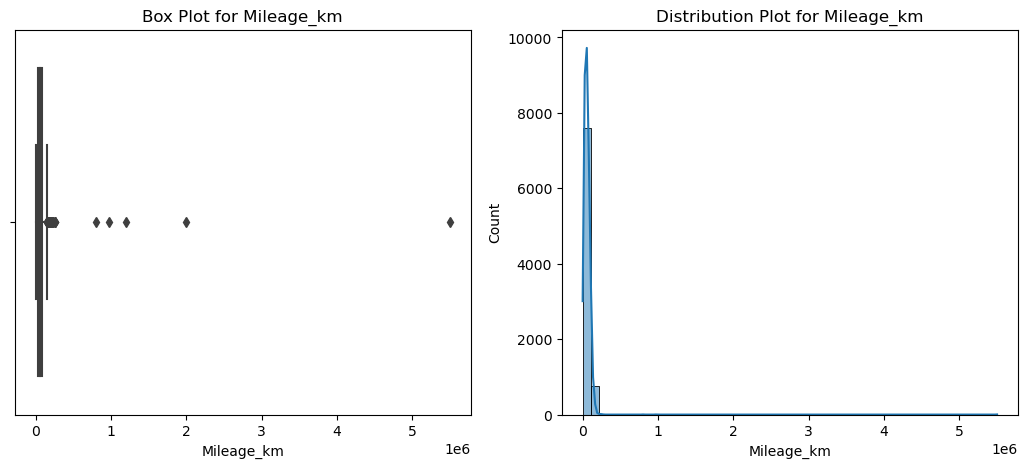

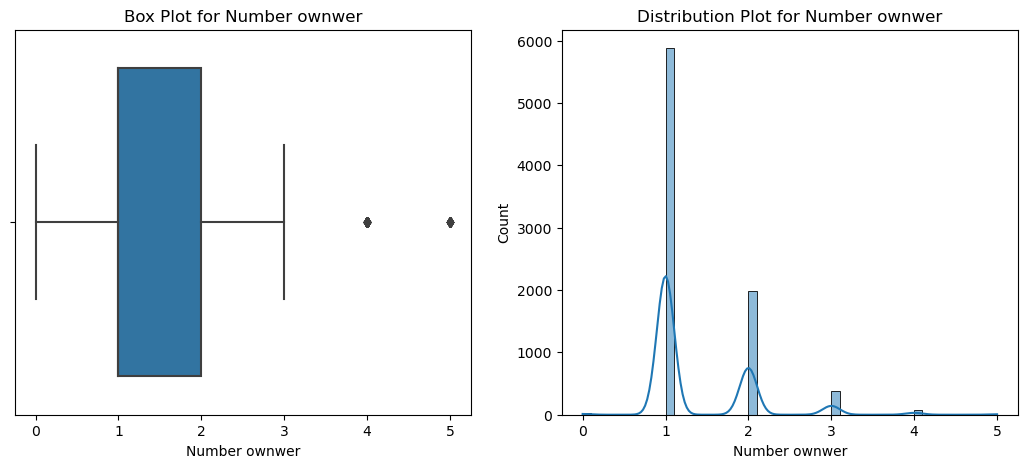

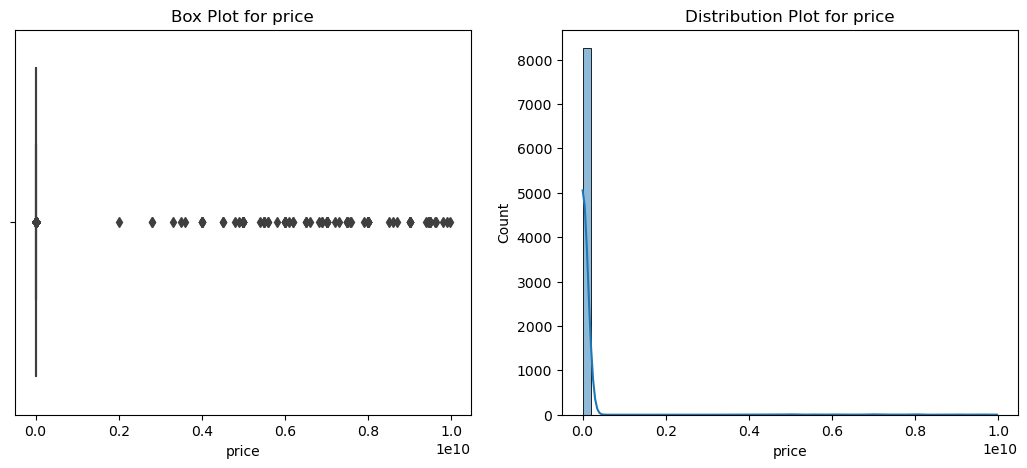

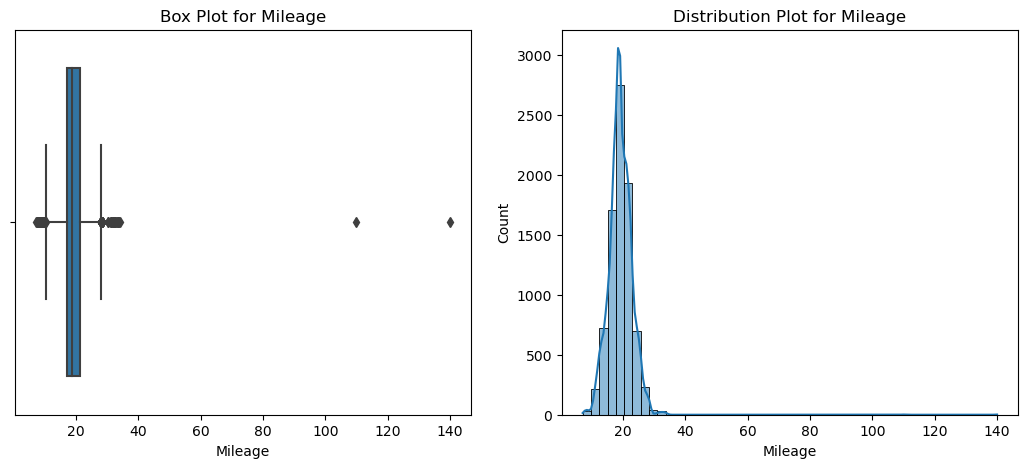

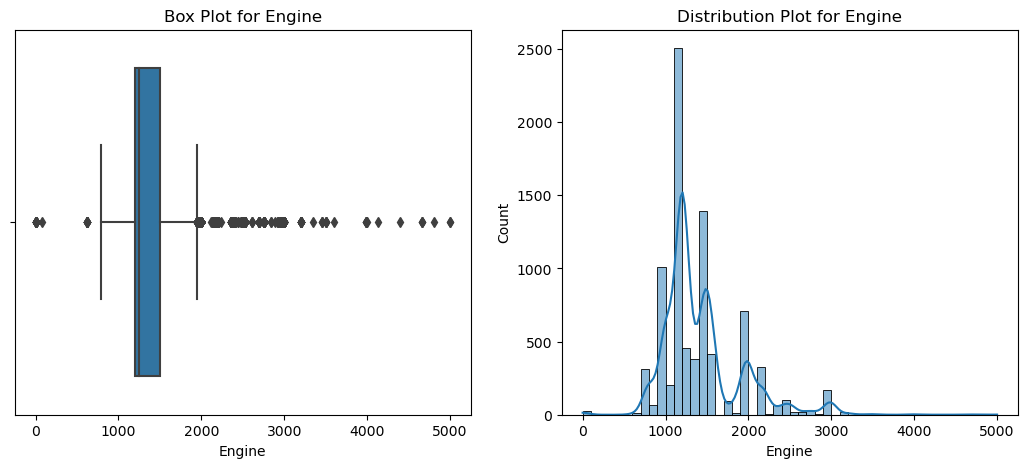

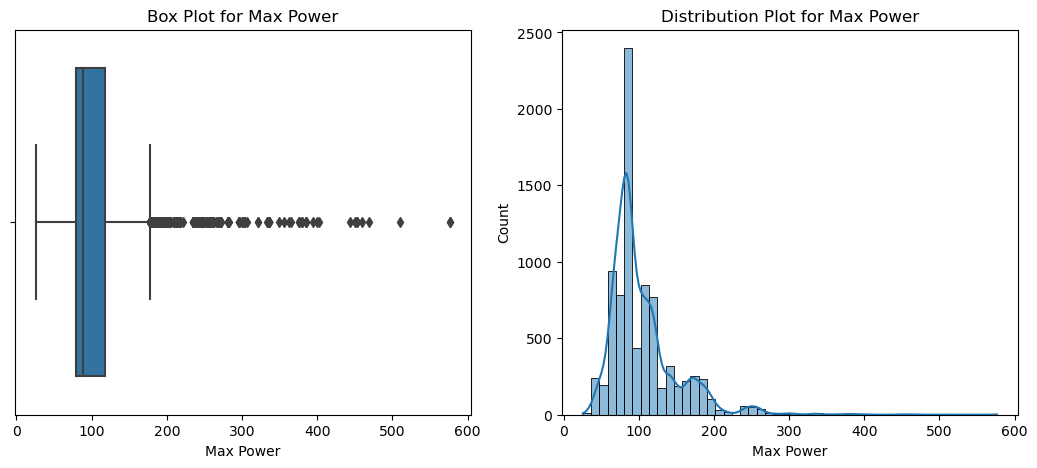

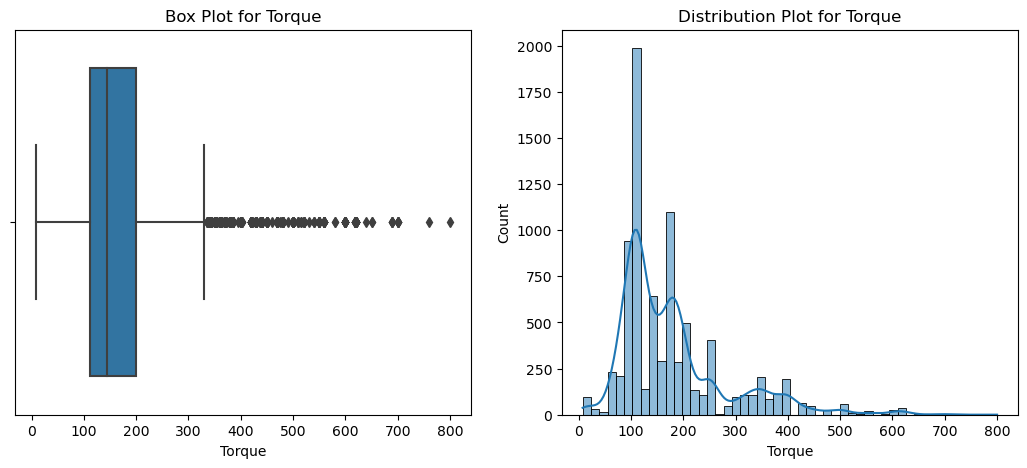

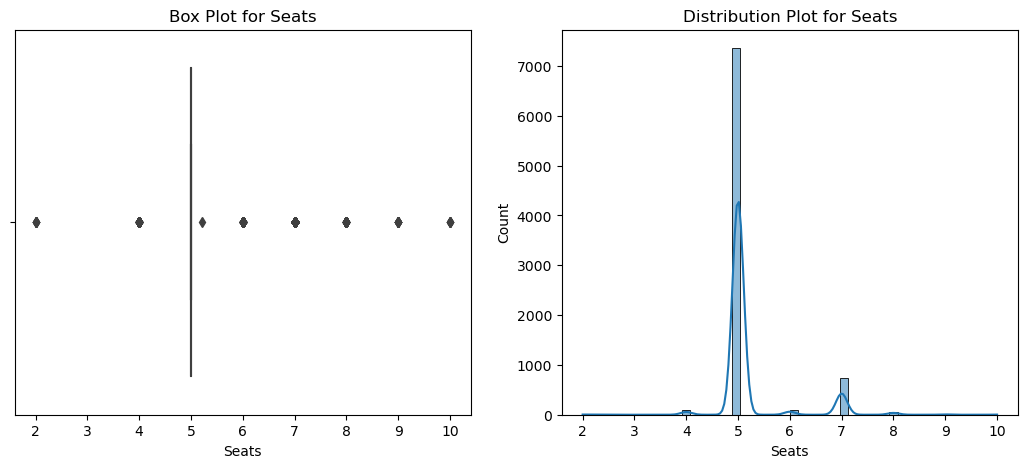

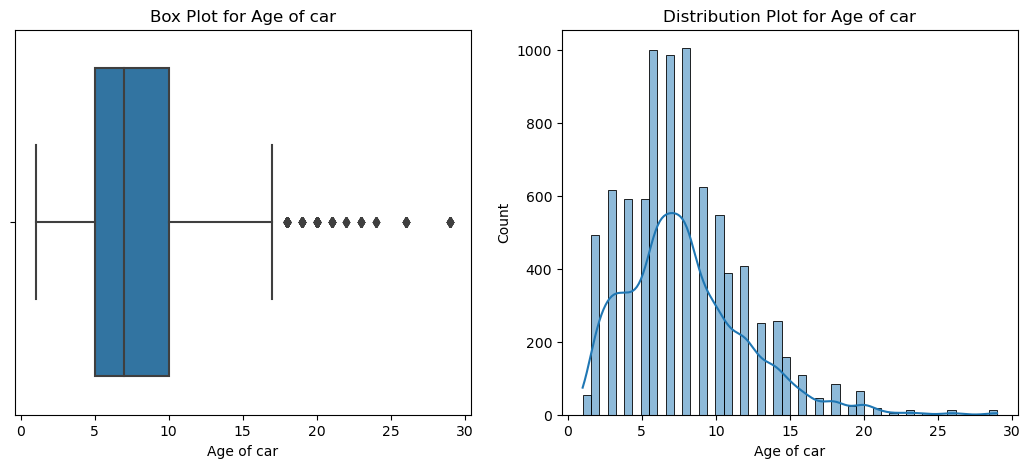

In [145]:
for i in ['Mileage_km','Number ownwer','price','Mileage','Engine','Max Power','Torque','Seats','Age of car']:
    plot(final_car_df,i)

In [146]:

#Mileage_km, max_power, selling_price, and engine ,Torqueare right skewed and postively skewed.
# Outliers in km_driven, enginer, selling_price, and max power,Torque.

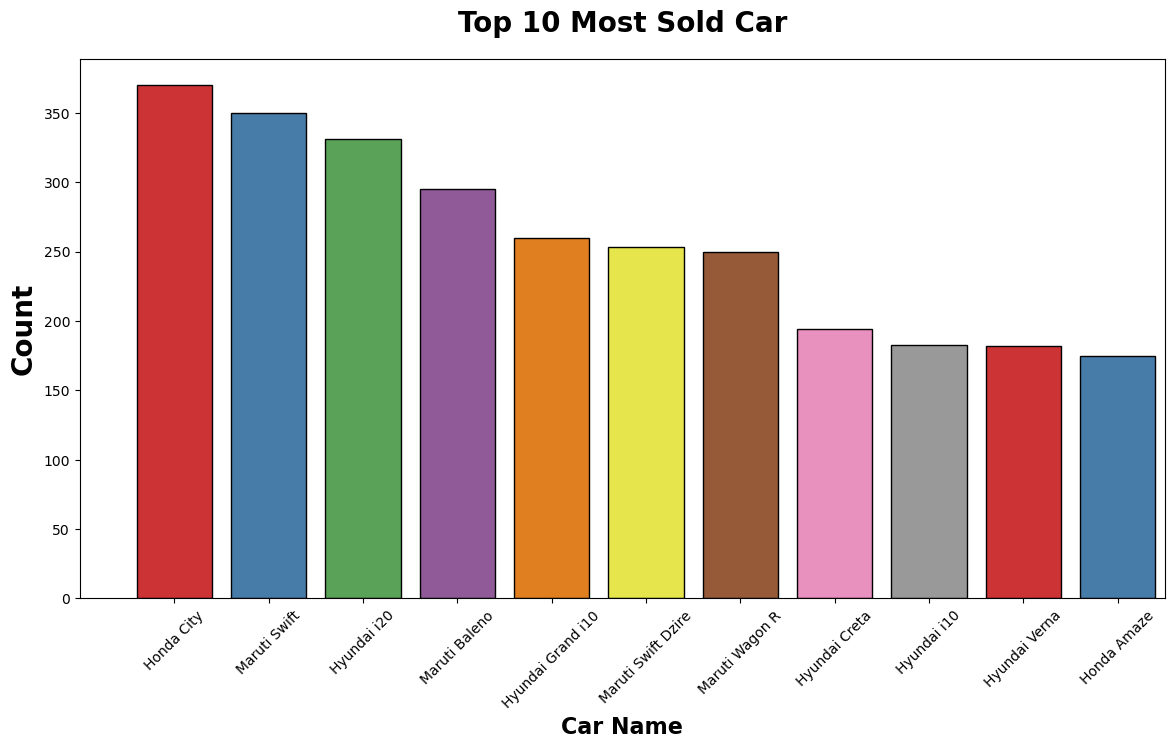

In [147]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Car model", data=final_car_df,ec = "black",palette="Set1",order = final_car_df['Car model'].value_counts().index)
plt.title("Top 10 Most Sold Car", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Car Name", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

In [148]:
#Honda city is most sold cars in dataset

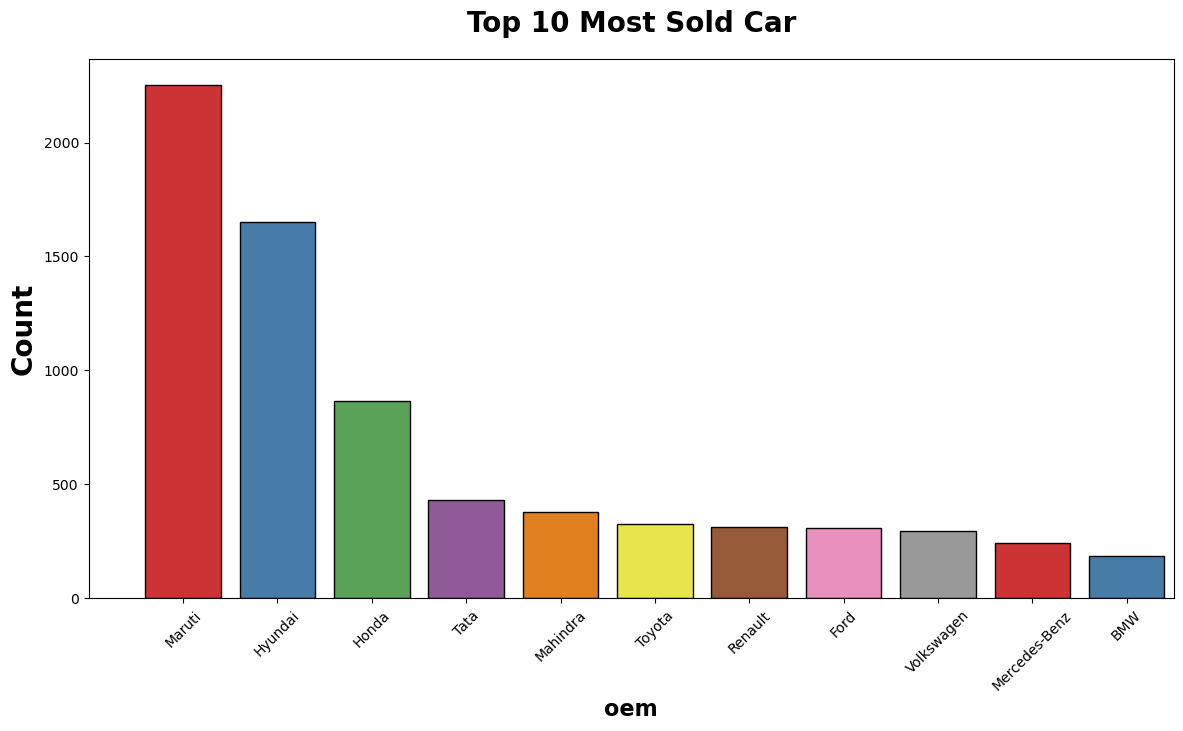

In [149]:
plt.subplots(figsize=(14,7))
sns.countplot(x="oem", data=final_car_df,ec = "black",palette="Set1",order = final_car_df['oem'].value_counts().index)
plt.title("Top 10 Most Sold Car", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("oem", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

In [150]:
#Maruti brand  is most sold cars OEM  in dataset

# 2.Bivariate analysis:

In [151]:
#Top 10 Costlier Brands on CarDekho Website
brand = final_car_df.groupby('Car model')['price'].max()
brand = brand.to_frame().sort_values('price',ascending=False)[0:10]
brand

,price
Car model,
Tata Indica,9.970300e+09
Maruti Zen Estilo,9.900000e+09
Maruti Alto,9.800000e+09
Maruti Alto 800,9.629500e+09
Hyundai Santro Xing,9.600000e+09
Hyundai i10,9.500000e+09
Honda Jazz,9.500000e+09
Maruti Omni,9.435300e+09
Maruti Ritz,9.398200e+09


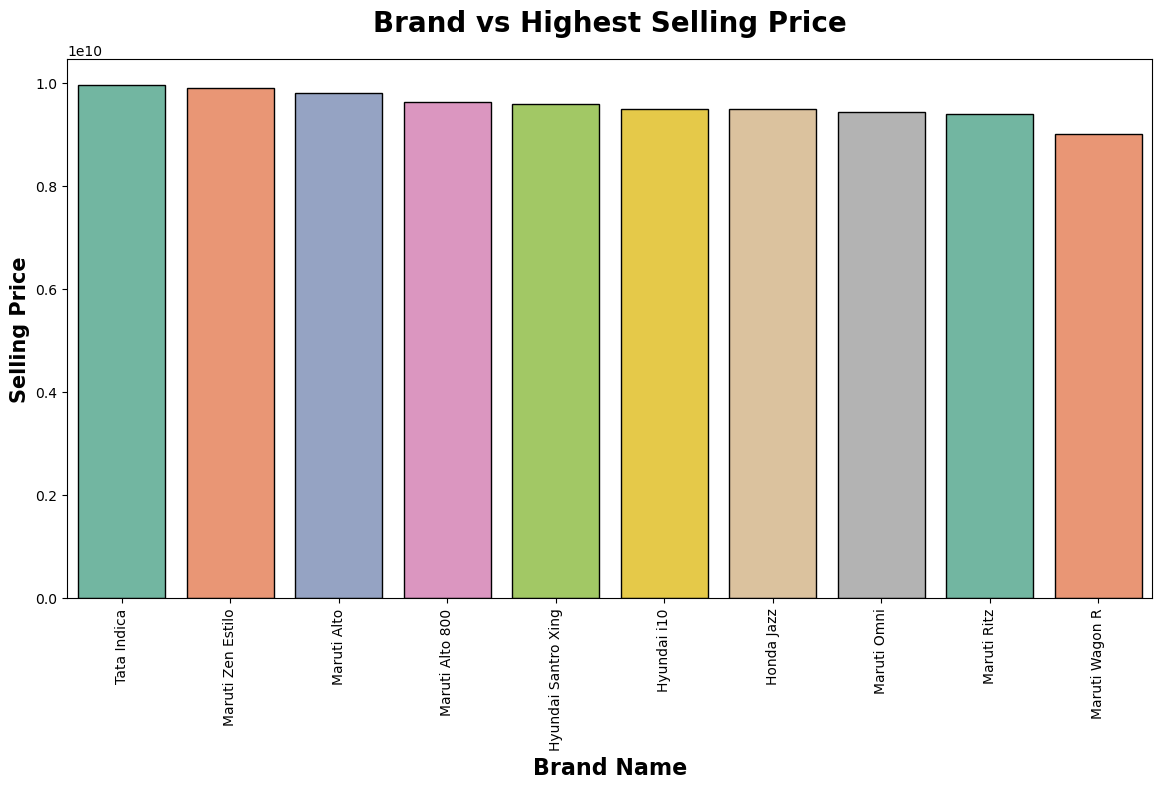

In [152]:
plt.subplots(figsize=(14,7))
sns.barplot(x=brand.index, y=brand.price,ec = "black",palette="Set2")
plt.title("Brand vs Highest Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=15)
plt.xlabel("Brand Name", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()


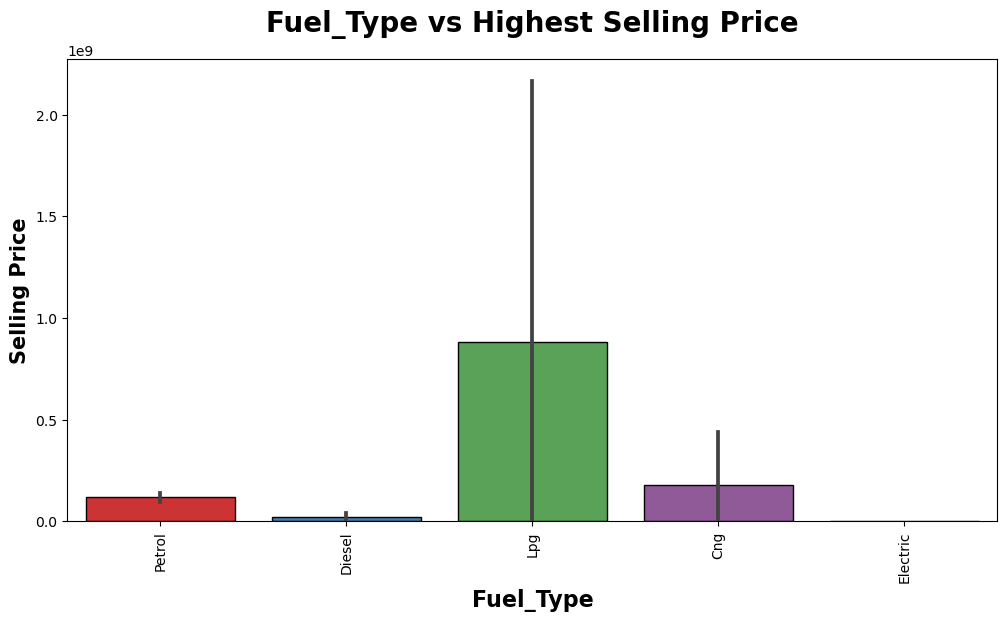

In [153]:
plt.figure(figsize= (12,6))
sns.barplot(x= 'Fuel_Type',y = 'price',data =final_car_df,ec = "black",palette="Set1")
plt.title("Fuel_Type vs Highest Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=15)
plt.xlabel("Fuel_Type", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

In [154]:
# LPG fuel type of cars has most sold in dataset.

In [155]:
fuel_mileage = final_car_df.groupby('Fuel_Type')['Mileage'].mean().sort_values(ascending=False)
fuel_mileage.to_frame()

,Mileage
Fuel_Type,
Electric,26.467857
Cng,23.754031
Diesel,19.401530
Petrol,18.996425
Lpg,16.856402


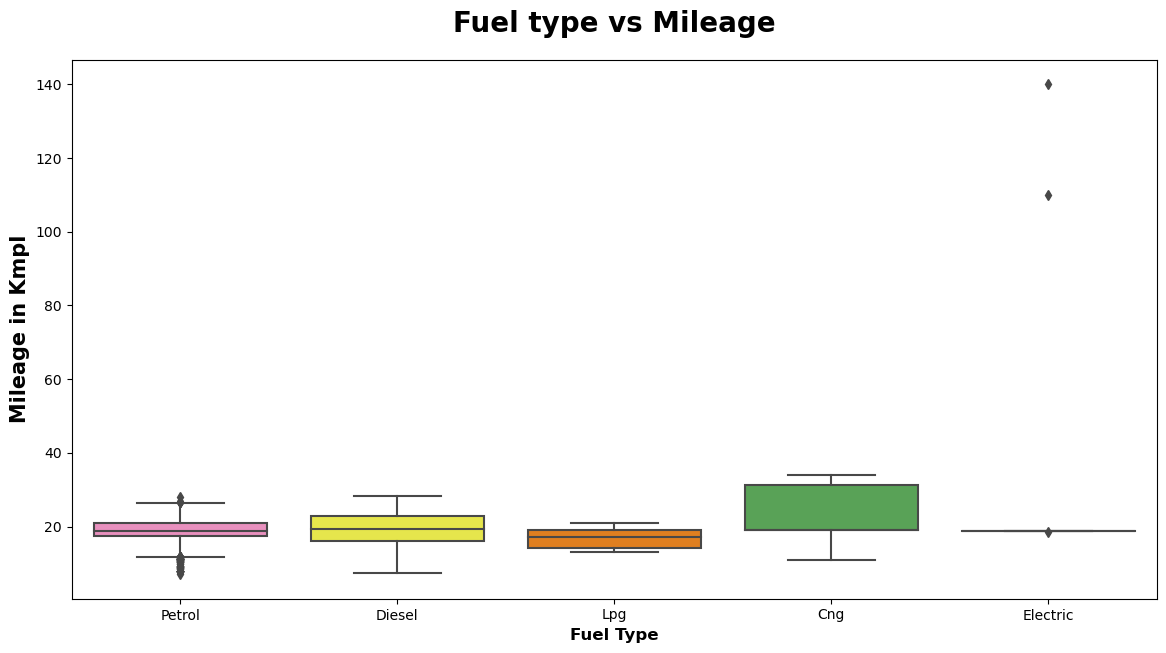

In [156]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='Fuel_Type', y='Mileage', data=final_car_df,palette="Set1_r")
plt.title("Fuel type vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage in Kmpl", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()

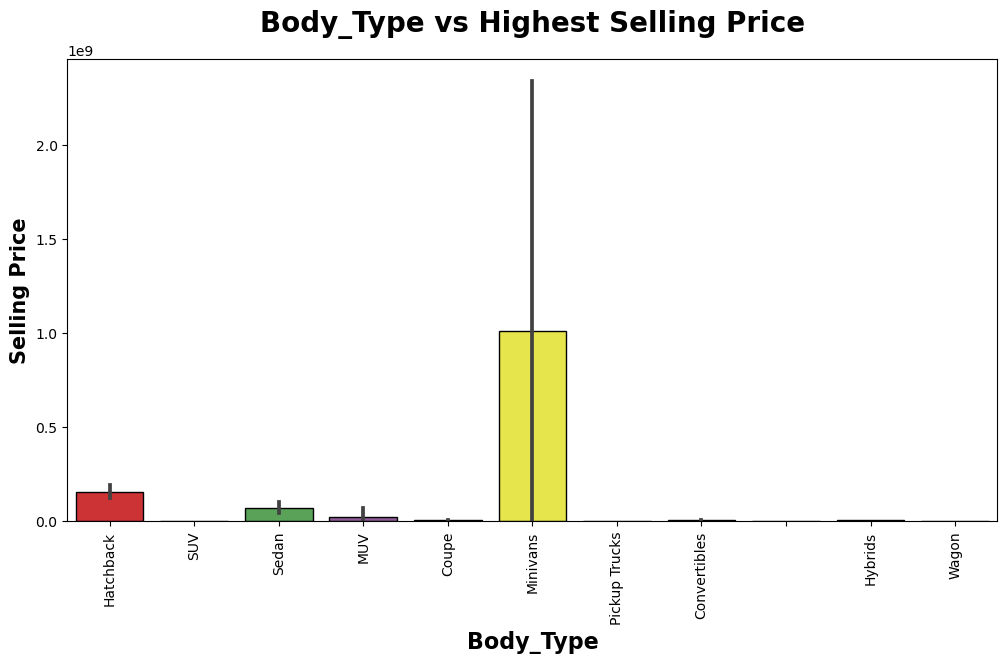

In [157]:
plt.figure(figsize= (12,6))
sns.barplot(x= 'Body_Type',y= 'price',data =final_car_df,ec = "black",palette="Set1")
plt.title("Body_Type vs Highest Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=15)
plt.xlabel("Body_Type", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

In [158]:
# Mini_vans of body_types has most cars in the dataset

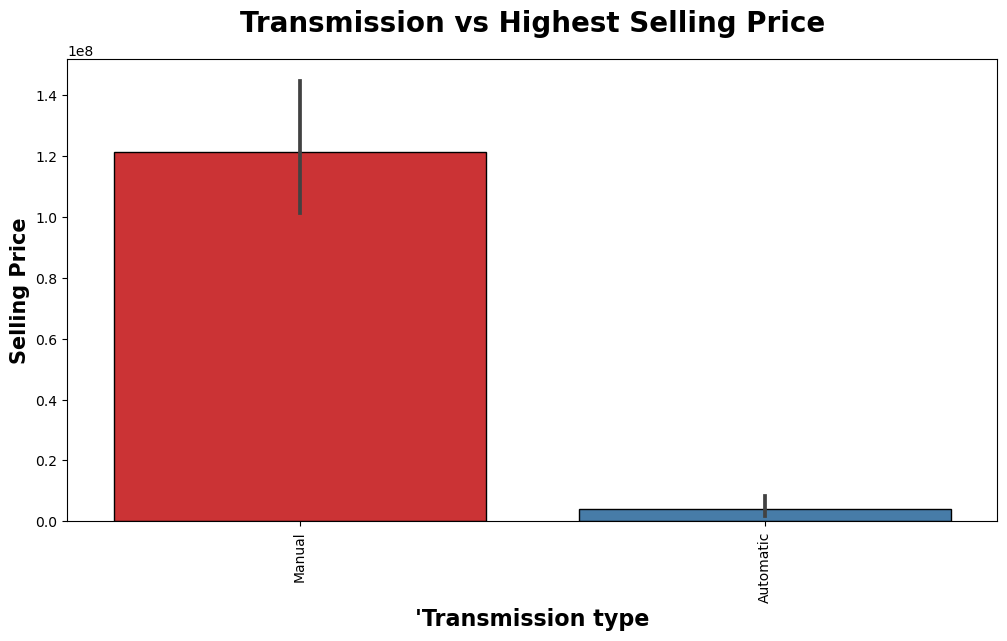

In [159]:
plt.figure(figsize= (12,6))
sns.barplot(x= 'Transmission type',y= 'price',data =final_car_df,ec = "black",palette="Set1")
plt.title("Transmission vs Highest Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=15)
plt.xlabel("'Transmission type", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

In [160]:
# manual Transmission type of cars most cars in the dataset

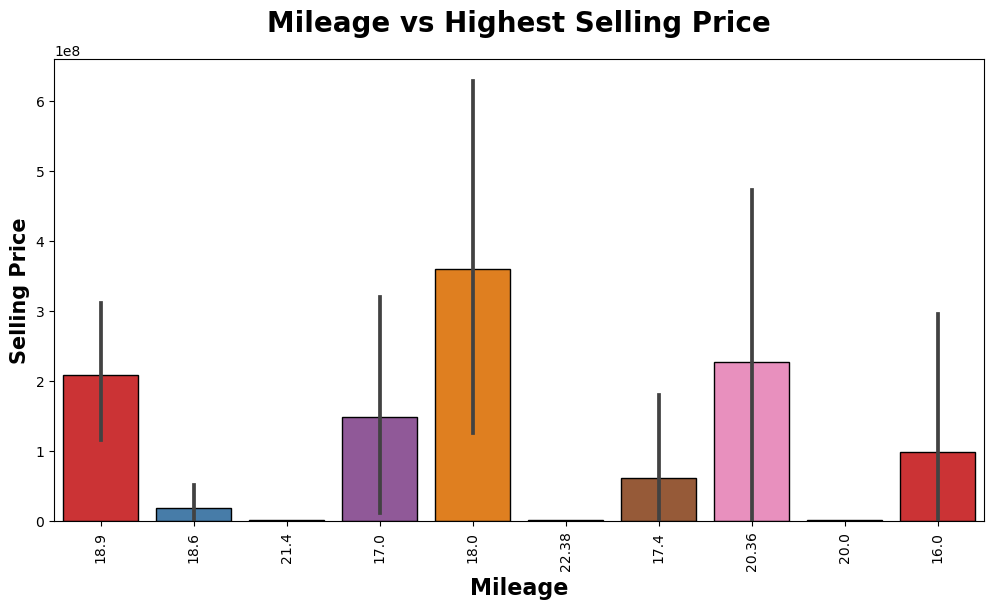

In [161]:

plt.figure(figsize=(12, 6))
sns.barplot(x='Mileage', y='price', data=final_car_df, ec="black", palette="Set1", order=final_car_df['Mileage'].value_counts().index[:10])
plt.title("Mileage vs Highest Selling Price", weight="bold", fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=15)
plt.xlabel("Mileage", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()


In [162]:
# 18.0 Mileage is  cars most sold in the dataset

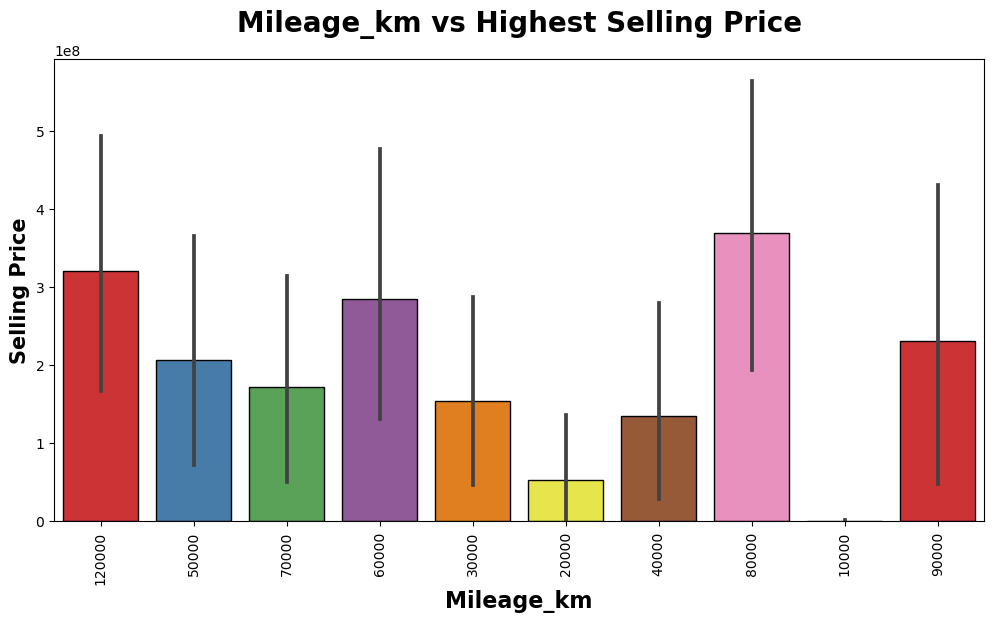

In [163]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Mileage_km', y='price', data=final_car_df, ec="black", palette="Set1", order=final_car_df['Mileage_km'].value_counts().index[:10])
plt.title("Mileage_km vs Highest Selling Price", weight="bold", fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=15)
plt.xlabel("Mileage_km", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()


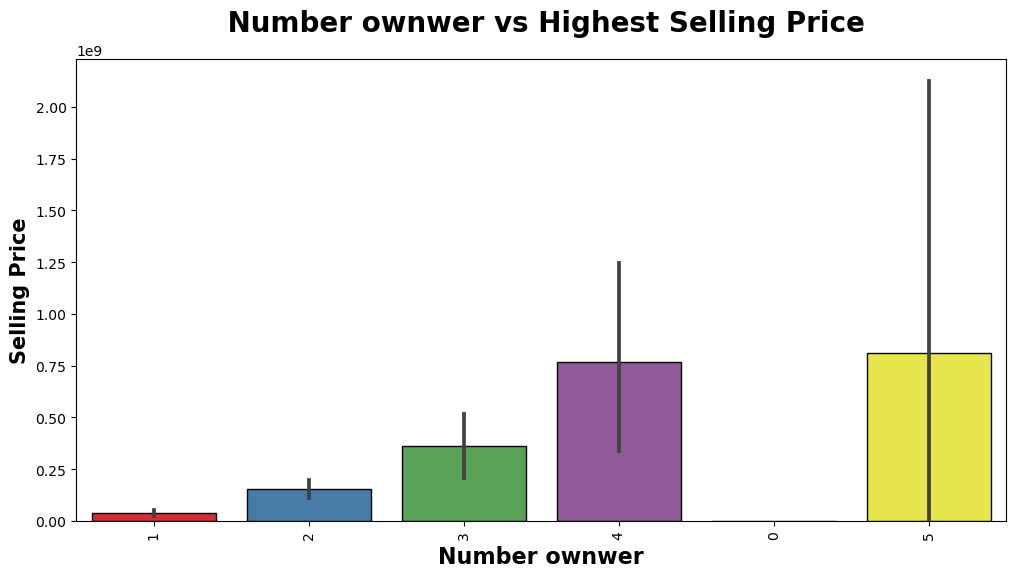

In [164]:

plt.figure(figsize=(12, 6))
sns.barplot(x='Number ownwer', y='price', data=final_car_df, ec="black", palette="Set1", order=final_car_df['Number ownwer'].value_counts().index[:10])
plt.title(" Number ownwer vs Highest Selling Price", weight="bold", fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=15)
plt.xlabel("Number ownwer", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()


In [165]:
# 5 NO of Owners has most sold in the dataset.

In [166]:
brand = final_car_df.groupby('Car model')['price'].max()
brand = brand.to_frame().sort_values('price',ascending=False)[0:10]
brand

,price
Car model,
Tata Indica,9.970300e+09
Maruti Zen Estilo,9.900000e+09
Maruti Alto,9.800000e+09
Maruti Alto 800,9.629500e+09
Hyundai Santro Xing,9.600000e+09
Hyundai i10,9.500000e+09
Honda Jazz,9.500000e+09
Maruti Omni,9.435300e+09
Maruti Ritz,9.398200e+09


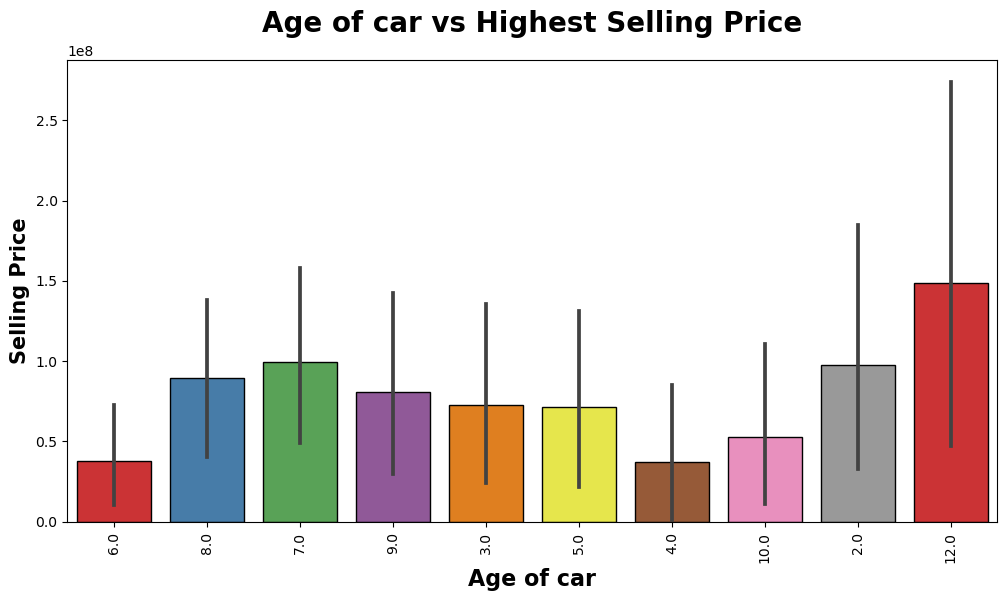

In [167]:

plt.figure(figsize=(12, 6))
sns.barplot(x='Age of car', y='price', data=final_car_df, ec="black", palette="Set1", order=final_car_df['Age of car'].value_counts().index[:10])
plt.title("Age of car vs Highest Selling Price", weight="bold", fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=15)
plt.xlabel("Age of car", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()


In [168]:
#12 Age of cars has most sold cars in the dataset.

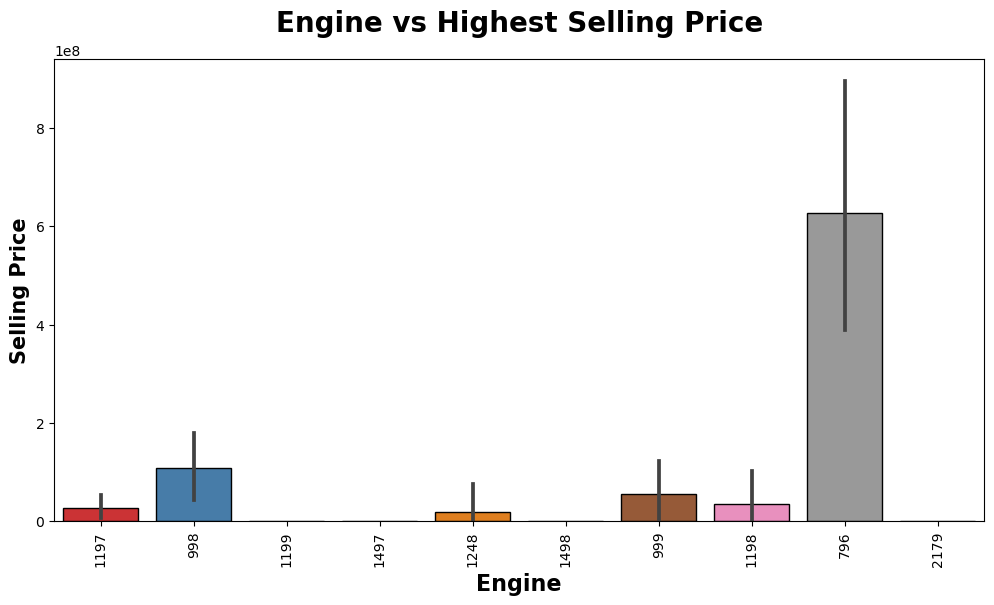

In [169]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Engine', y='price', data=final_car_df, ec="black", palette="Set1", order=final_car_df['Engine'].value_counts().index[:10])
plt.title("Engine vs Highest Selling Price", weight="bold", fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=15)
plt.xlabel("Engine", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()


In [170]:
# 796 CC engine type of cars most sold in dataset

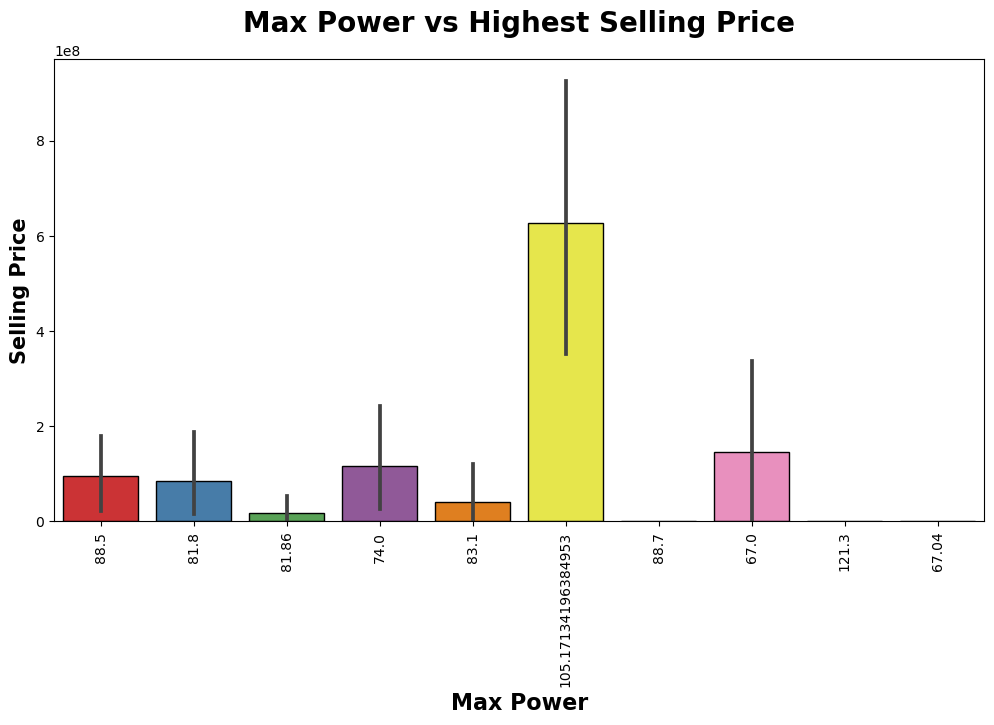

In [171]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Max Power', y='price', data=final_car_df, ec="black", palette="Set1", order=final_car_df['Max Power'].value_counts().index[:10])
plt.title("Max Power vs Highest Selling Price", weight="bold", fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=15)
plt.xlabel("Max Power", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()


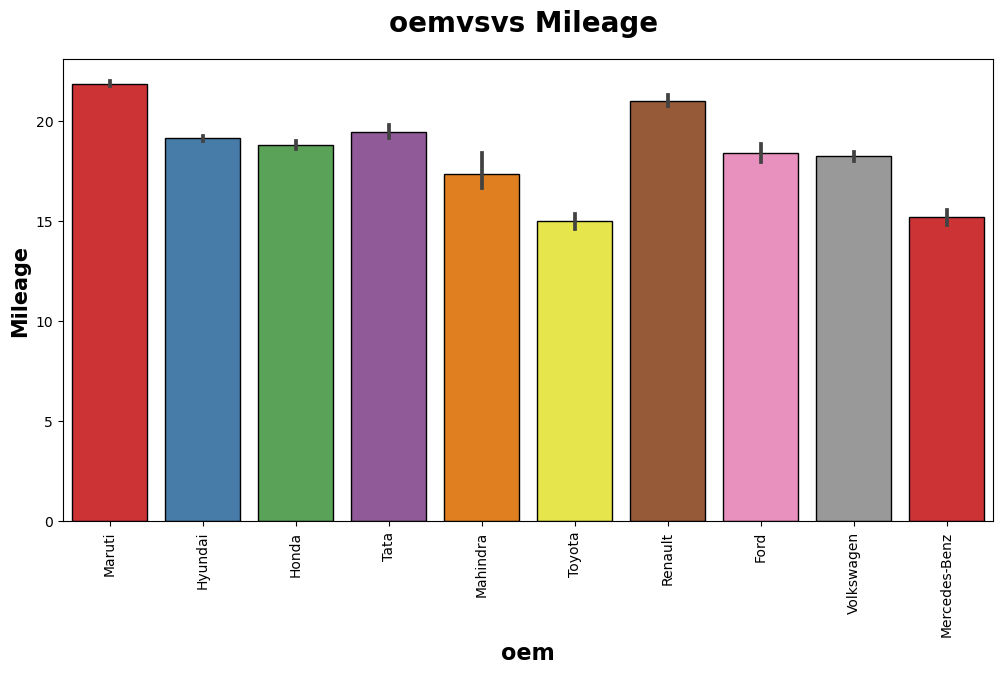

In [172]:
plt.figure(figsize=(12, 6))
sns.barplot(x='oem', y='Mileage', data=final_car_df, ec="black", palette="Set1", order=final_car_df['oem'].value_counts().index[:10])
plt.title("oemvsvs Mileage ", weight="bold", fontsize=20, pad=20)
plt.ylabel("Mileage", weight="bold", fontsize=15)
plt.xlabel("oem", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()


In [173]:
# maruti brand  is highest giving mikeage car brand in the dataset

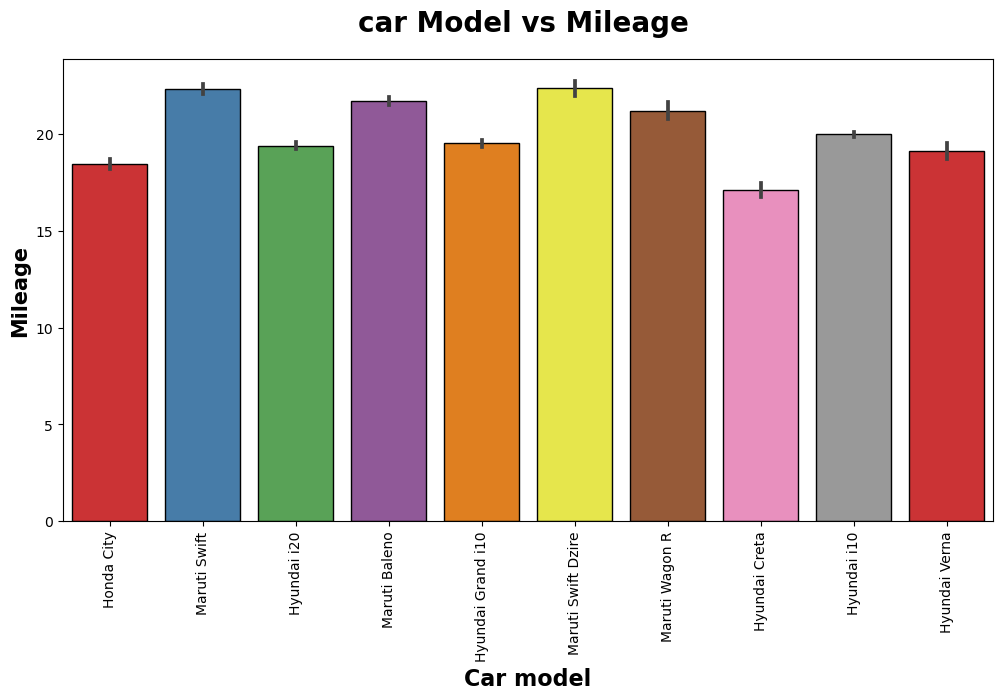

In [174]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Car model', y='Mileage', data=final_car_df, ec="black", palette="Set1", order=final_car_df['Car model'].value_counts().index[:10])
plt.title("car Model vs Mileage ", weight="bold", fontsize=20, pad=20)
plt.ylabel("Mileage", weight="bold", fontsize=15)
plt.xlabel("Car model", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()


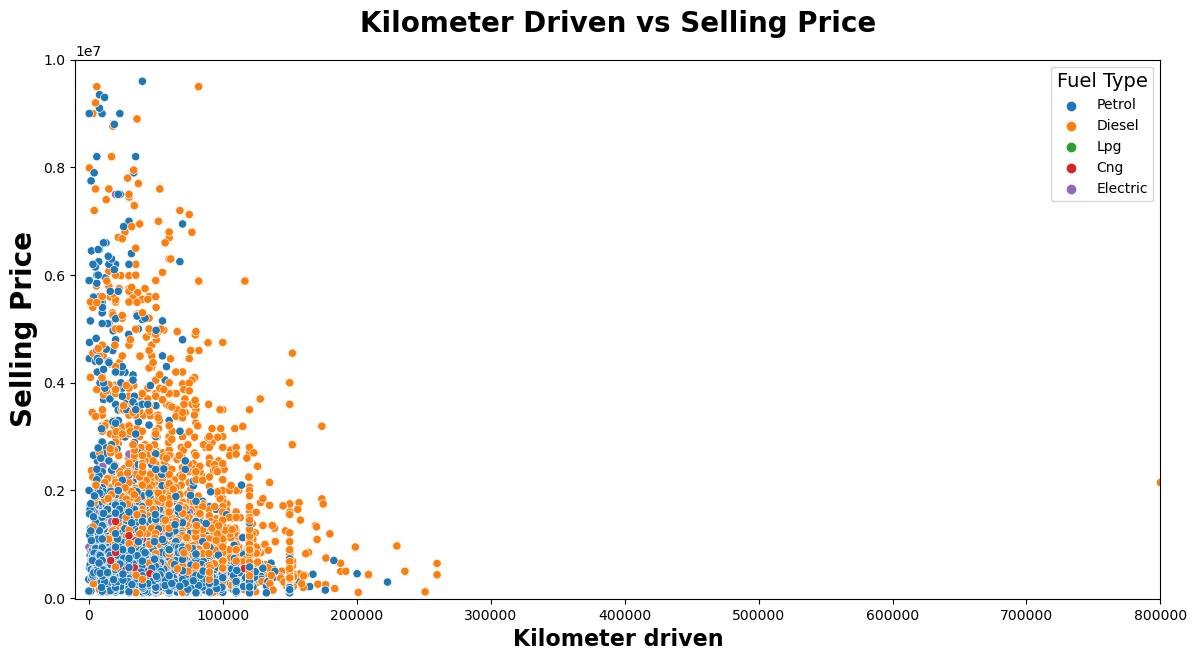

In [175]:

plt.subplots(figsize=(14, 7))
sns.scatterplot(x="Mileage_km", y='price', data=final_car_df, ec="white", color='b', hue='Fuel_Type')  # Use 'Fuel_Type' instead of 'Fuel_type'
plt.title("Kilometer Driven vs Selling Price", weight="bold", fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=20)
plt.xlim(-10000, 800000)  # Adjusted limits for better visualization
plt.ylim(-10000, 10000000)
plt.xlabel("Kilometer driven", weight="bold", fontsize=16)
plt.legend(title='Fuel Type', title_fontsize='14', loc='upper right')  # Add a legend for Fuel Type
plt.show()


In [176]:
#Many Cars were sold with kms between 0 to 100k Kilometers
#Low Kms driven cars had more selling price compared to cars which had more kms driven.

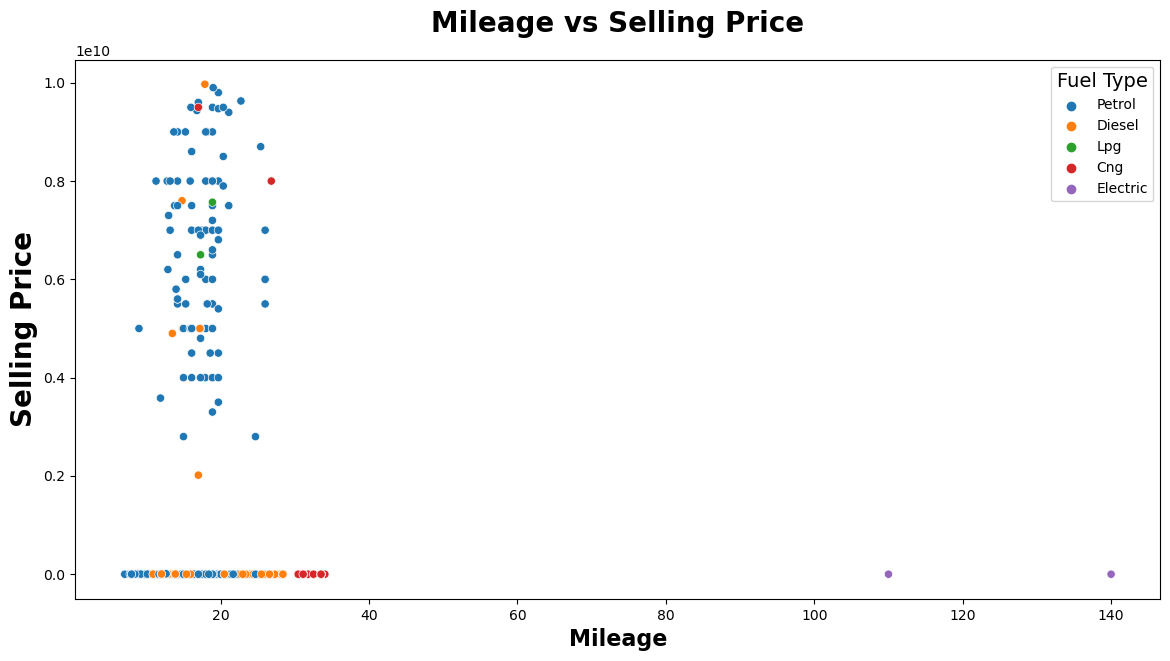

In [177]:

plt.subplots(figsize=(14, 7))
sns.scatterplot(x="Mileage", y='price', data=final_car_df, ec="white", color='b', hue='Fuel_Type')  # Use 'Fuel_Type' instead of 'Fuel_type'
plt.title("Mileage vs Selling Price", weight="bold", fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=20)
plt.xlabel("Mileage", weight="bold", fontsize=16)
plt.legend(title='Fuel Type', title_fontsize='14', loc='upper right')  # Add a legend for Fuel Type
plt.show()

In [178]:
#Many Cars were sold with kms between 0 to 20 Kmpl
#Low Kmpl driven cars had more selling price compared to cars which had more kms driven.

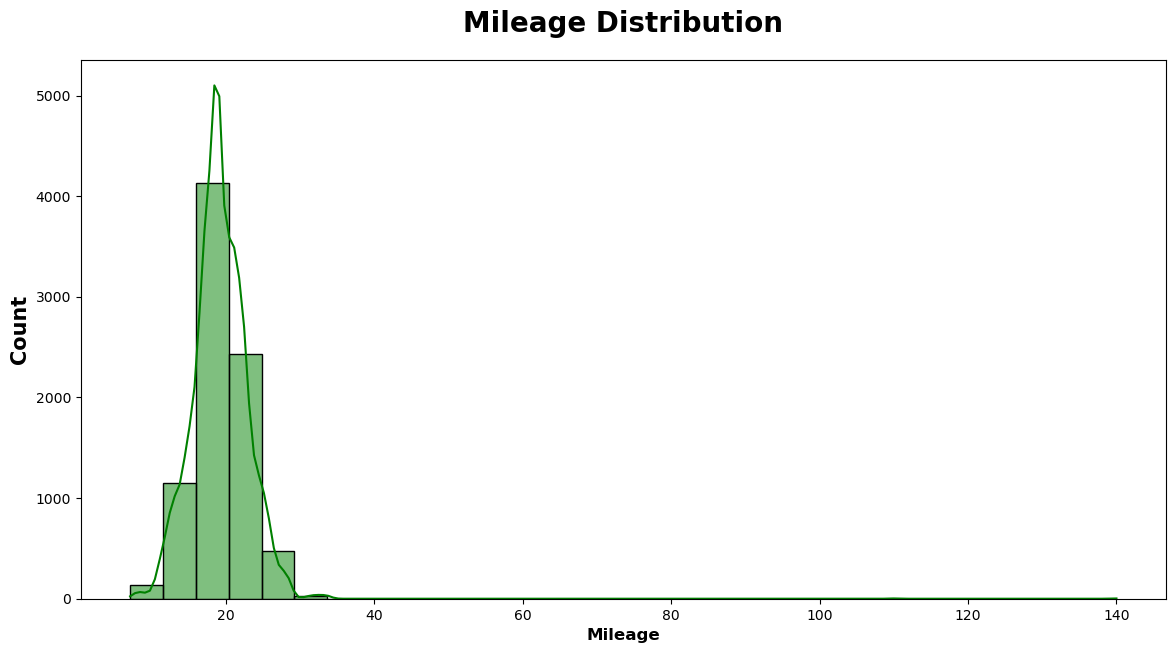

In [179]:

plt.subplots(figsize=(14, 7))
sns.histplot(x=final_car_df['Mileage'], bins=30, color='g', kde=True, edgecolor="black")
plt.title("Mileage Distribution", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Mileage", weight="bold", fontsize=12)
plt.show()


# Selling Price Distribution (Target Feature Distribution)¶


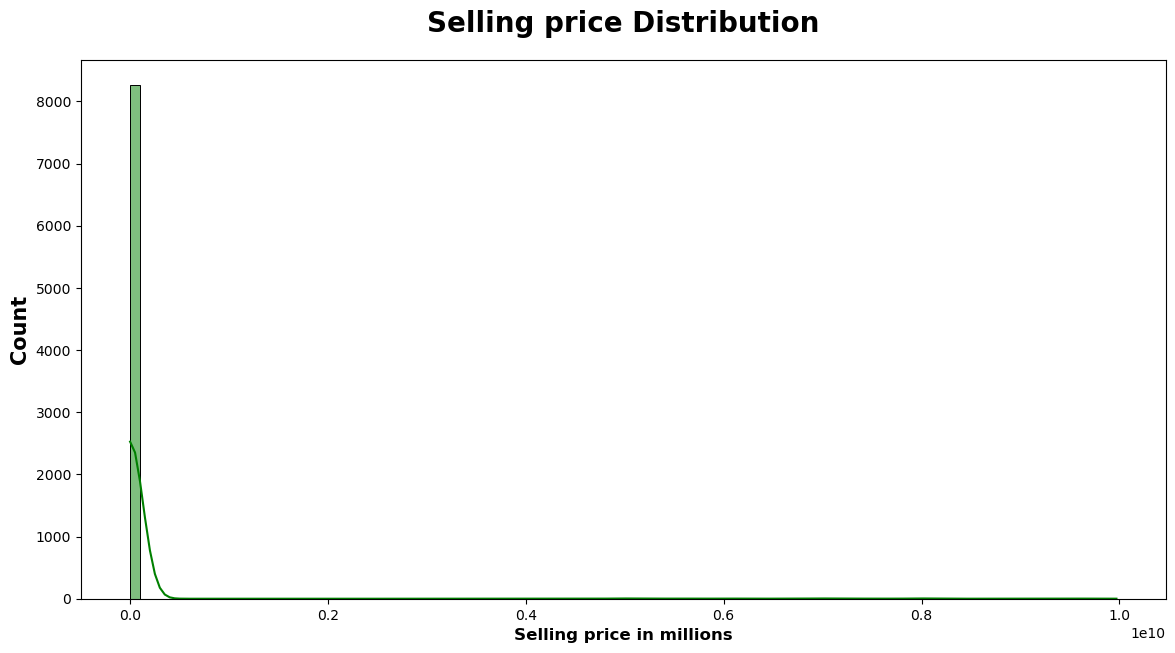

In [180]:

plt.subplots(figsize=(14, 7))
sns.histplot(x=final_car_df['price'], bins=100, color='g', kde=True, edgecolor="black")
plt.title("Selling price Distribution", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Selling price in millions", weight="bold", fontsize=12)
plt.show()


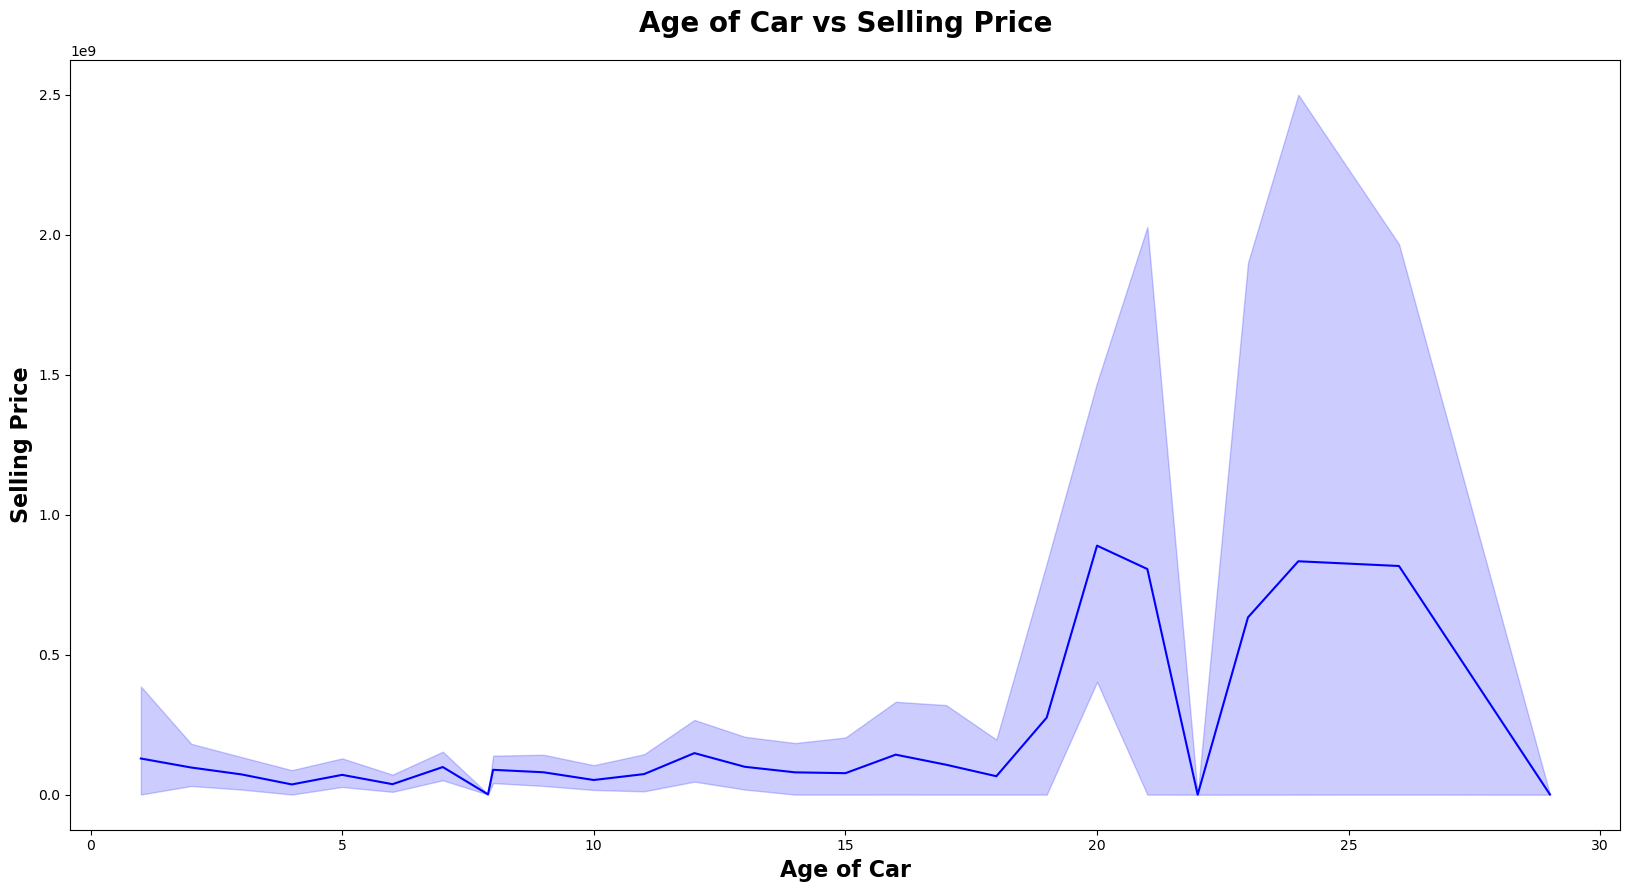

In [181]:

plt.subplots(figsize=(20, 10))
sns.lineplot(x='Age of car', y='price', data=final_car_df, color='b')
plt.title("Age of Car vs Selling Price", weight="bold", fontsize=20, pad=20)
plt.xlabel("Age of Car", weight="bold", fontsize=16)
plt.ylabel("Selling Price", weight="bold", fontsize=16)
plt.show()


In [182]:
#As the Vehicle age increases the price also get reduced.
#Vehicle age has Negative impact on selling price

In [183]:
final_car_df['Age of car'].isnull().sum()

0

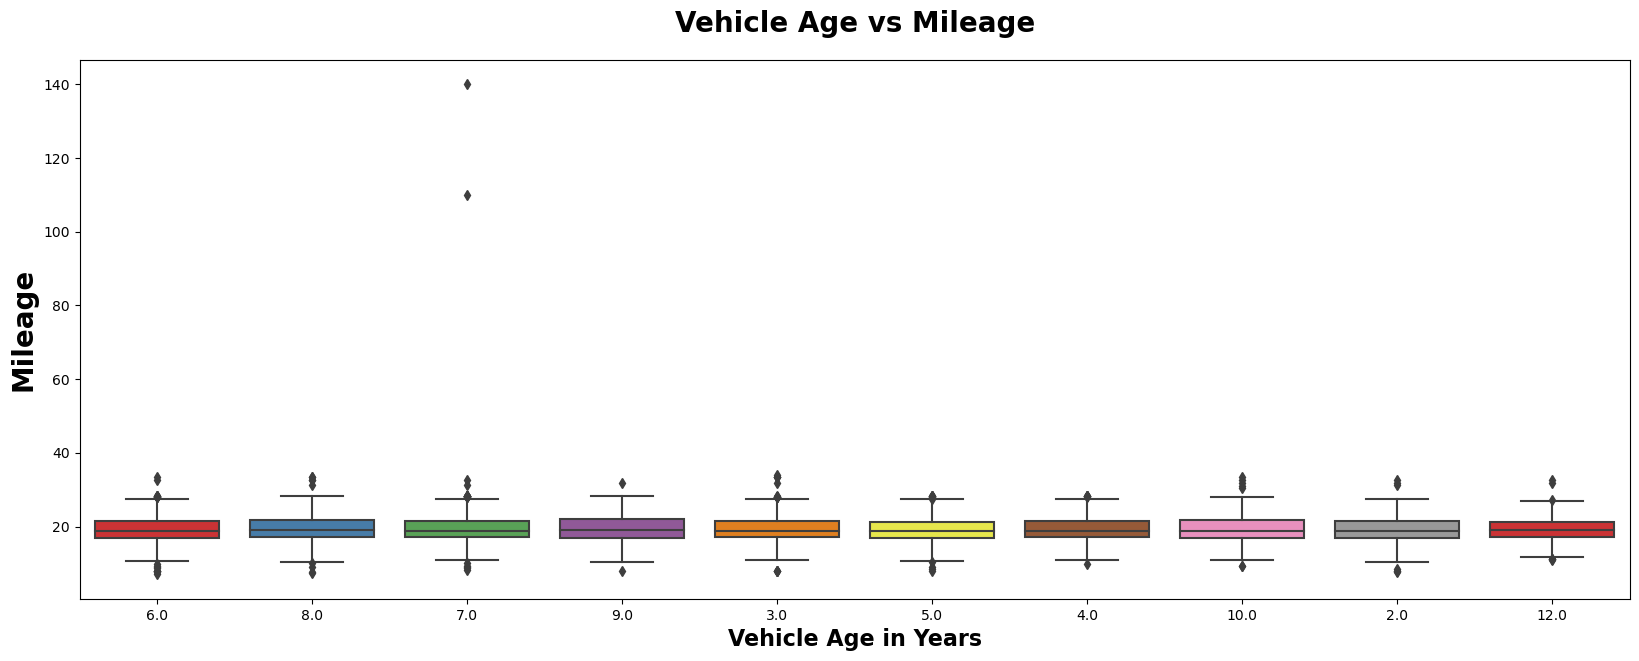

In [184]:

plt.subplots(figsize=(20,7))
sns.boxplot(x='Age of car', y= 'Mileage',data =final_car_df , palette="Set1",order = final_car_df['Age of car'].value_counts().index[:10] )
plt.title("Vehicle Age vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage", weight="bold", fontsize=20)
plt.xlabel("Vehicle Age in Years", weight="bold", fontsize=16)
plt.show()

In [185]:
oldest = final_car_df.groupby('Car model')['Age of car'].max().sort_values(ascending=False).head(10)
oldest.to_frame()

,Age of car
Car model,
Hyundai Santa Fe,29.0
Maruti Ritz,29.0
Honda Amaze,29.0
Renault KWID,29.0
BMW X3,29.0
Mahindra Bolero Power Plus,29.0
Maruti SX4 S Cross,29.0
Mahindra Scorpio,29.0
Audi A6,29.0


# 3.Multivariate Analysis:

Check Multicollinearity in Numerical features

In [186]:
car_corr = final_car_df[numerical_features].corr()
car_corr

,Mileage_km,Number ownwer,price,Mileage,Engine,Max Power,Torque,Seats,Age of car
Mileage_km,1.000000,0.115419,0.037923,-0.008496,0.091089,-0.009430,0.049647,0.074925,0.051826
Number ownwer,0.115419,1.000000,0.129965,-0.074169,0.053909,-0.026324,-0.024477,0.010631,0.092109
price,0.037923,0.129965,1.000000,-0.042913,-0.070744,-0.077656,-0.087867,-0.041133,0.053897
Mileage,-0.008496,-0.074169,-0.042913,1.000000,-0.537537,-0.511808,-0.339750,-0.300614,-0.013649
Engine,0.091089,0.053909,-0.070744,-0.537537,1.000000,0.807108,0.764874,0.414223,0.002646
Max Power,-0.009430,-0.026324,-0.077656,-0.511808,0.807108,1.000000,0.819173,0.164544,-0.025410
Torque,0.049647,-0.024477,-0.087867,-0.339750,0.764874,0.819173,1.000000,0.260942,-0.031158
Seats,0.074925,0.010631,-0.041133,-0.300614,0.414223,0.164544,0.260942,1.000000,0.007191
Age of car,0.051826,0.092109,0.053897,-0.013649,0.002646,-0.025410,-0.031158,0.007191,1.000000


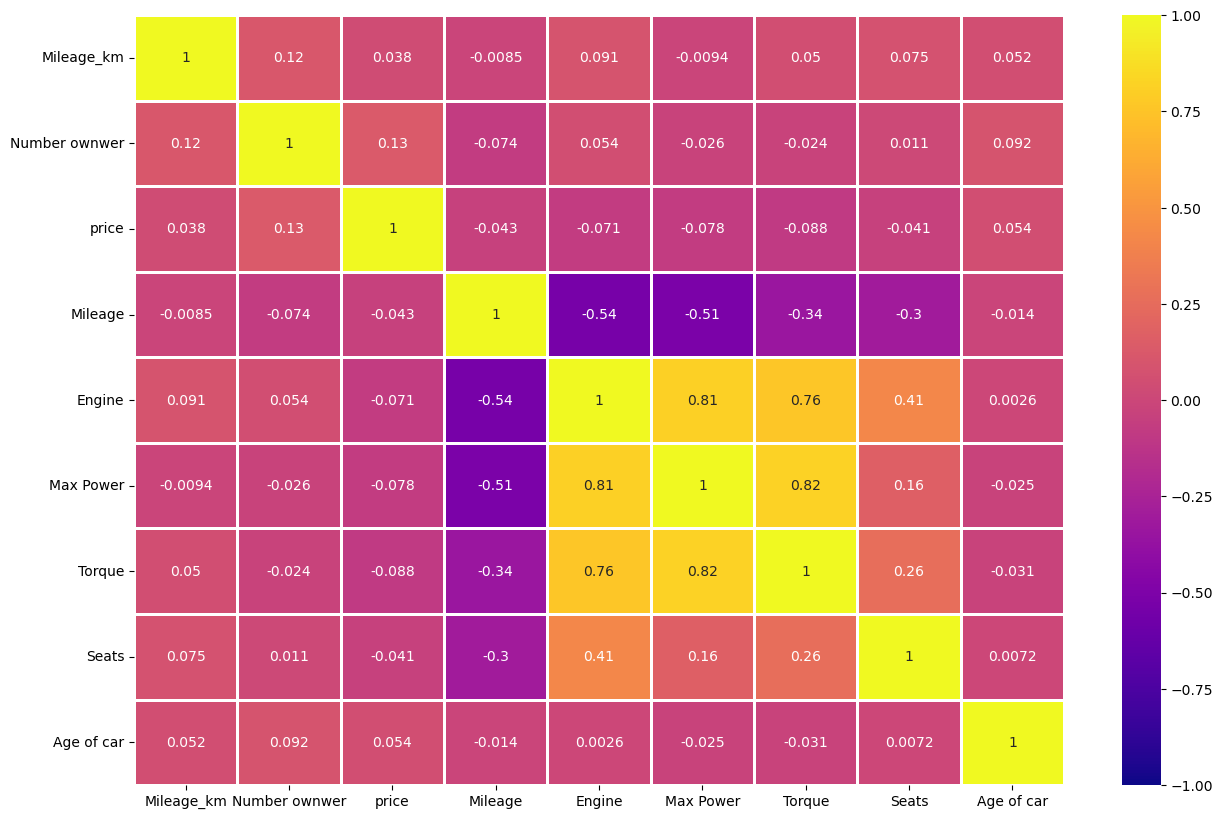

In [187]:
# ploting the heatmap:

plt.figure(figsize=(15,10))
sns.heatmap(car_corr, annot= True, cmap= 'plasma', vmin= -1 , vmax= 1, linecolor='white', linewidths=2)
plt.show()

In [188]:
#Max Power and Torque are and max power and engine highly correlated
#number of owner  and Selling Price are highly correlated.

In [189]:
from scipy.stats import chi2_contingency
chi2_test = []

for feature in categorical_features:
    if chi2_contingency(pd.crosstab(final_car_df['price'], final_car_df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
test_result = pd.DataFrame(data=[categorical_features, chi2_test]).T
test_result.columns = ['Categorical Features', 'Hypothesis Result']

test_result

,Categorical Features,Hypothesis Result
0,Fuel_Type,Reject Null Hypothesis
1,Body_Type,Reject Null Hypothesis
2,Transmission type,Reject Null Hypothesis
3,oem,Reject Null Hypothesis
4,Car model,Reject Null Hypothesis
5,variantName,Reject Null Hypothesis


In [190]:
final_car_df

,Fuel_Type,Body_Type,Mileage_km,Transmission type,Number ownwer,oem,Car model,variantName,price,Mileage,Engine,Max Power,Torque,Seats,Age of car
0,Petrol,Hatchback,120000,Manual,3,Maruti,Maruti Celerio,VXI,400000.0,23.10,998,67.04,90.000000,5.0,9.000000
1,Petrol,SUV,32706,Manual,2,Ford,Ford Ecosport,1.5 Petrol Titanium BSIV,811000.0,17.00,1497,121.31,150.000000,5.0,6.000000
2,Petrol,Hatchback,11949,Manual,1,Tata,Tata Tiago,1.2 Revotron XZ,585000.0,23.84,1199,84.00,114.000000,5.0,6.000000
3,Petrol,Sedan,17794,Manual,1,Hyundai,Hyundai Xcent,1.2 Kappa S Option,462000.0,19.10,1197,81.86,113.750000,5.0,10.000000
4,Diesel,SUV,60000,Manual,1,Maruti,Maruti SX4 S Cross,DDiS 200 Zeta,790000.0,23.65,1248,88.50,200.000000,5.0,9.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,Petrol,Sedan,60000,Automatic,1,Honda,Honda City,i-VTEC CVT V,900000.0,18.00,1497,117.60,145.000000,5.0,7.000000
1481,Petrol,SUV,20000,Manual,1,Kia,Kia Sonet,HTK Plus BSVI,950000.0,18.40,1197,81.86,115.000000,5.0,7.897525
1482,Petrol,Sedan,60000,Manual,1,Hyundai,Hyundai Verna,1.6 SX VTVT,418000.0,17.01,1591,121.30,154.900000,5.0,7.897525
1483,Diesel,SUV,38000,Manual,1,Hyundai,Hyundai Creta,1.6 SX Option Diesel,1195000.0,20.50,1582,126.20,178.504552,5.0,7.897525


# Treating Outliars Using IQR Method:

In [191]:
#using the IQR & Clips  method removing the outliars :
def outlier(final_car_df, column):
    iqr = final_car_df[column].quantile(0.75) - final_car_df[column].quantile(0.25)
    upper_value = final_car_df[column].quantile(0.75) + (1.5*iqr)
    lower_value = final_car_df[column].quantile(0.25) - (1.5*iqr)
    final_car_df[column] = final_car_df[column].clip(lower_value, upper_value)
    
outlier(final_car_df, 'Mileage_km')
outlier(final_car_df, 'price')
outlier(final_car_df, 'Mileage')
outlier(final_car_df, 'Engine')
outlier(final_car_df, 'Max Power')
outlier(final_car_df, 'Torque')

final_car_df

,Fuel_Type,Body_Type,Mileage_km,Transmission type,Number ownwer,oem,Car model,variantName,price,Mileage,Engine,Max Power,Torque,Seats,Age of car
0,Petrol,Hatchback,120000,Manual,3,Maruti,Maruti Celerio,VXI,400000.0,23.10,998.0,67.04,90.000000,5.0,9.000000
1,Petrol,SUV,32706,Manual,2,Ford,Ford Ecosport,1.5 Petrol Titanium BSIV,811000.0,17.00,1497.0,121.31,150.000000,5.0,6.000000
2,Petrol,Hatchback,11949,Manual,1,Tata,Tata Tiago,1.2 Revotron XZ,585000.0,23.84,1199.0,84.00,114.000000,5.0,6.000000
3,Petrol,Sedan,17794,Manual,1,Hyundai,Hyundai Xcent,1.2 Kappa S Option,462000.0,19.10,1197.0,81.86,113.750000,5.0,10.000000
4,Diesel,SUV,60000,Manual,1,Maruti,Maruti SX4 S Cross,DDiS 200 Zeta,790000.0,23.65,1248.0,88.50,200.000000,5.0,9.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,Petrol,Sedan,60000,Automatic,1,Honda,Honda City,i-VTEC CVT V,900000.0,18.00,1497.0,117.60,145.000000,5.0,7.000000
1481,Petrol,SUV,20000,Manual,1,Kia,Kia Sonet,HTK Plus BSVI,950000.0,18.40,1197.0,81.86,115.000000,5.0,7.897525
1482,Petrol,Sedan,60000,Manual,1,Hyundai,Hyundai Verna,1.6 SX VTVT,418000.0,17.01,1591.0,121.30,154.900000,5.0,7.897525
1483,Diesel,SUV,38000,Manual,1,Hyundai,Hyundai Creta,1.6 SX Option Diesel,1195000.0,20.50,1582.0,126.20,178.504552,5.0,7.897525


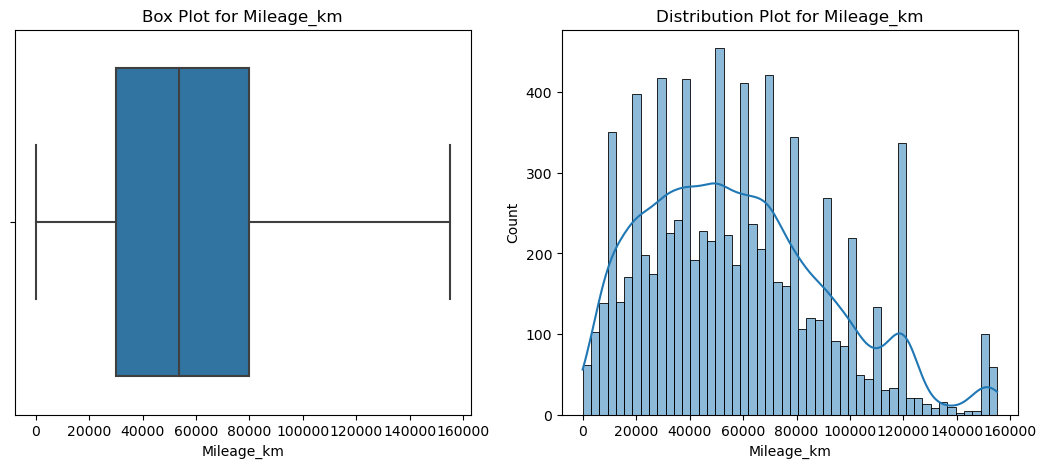

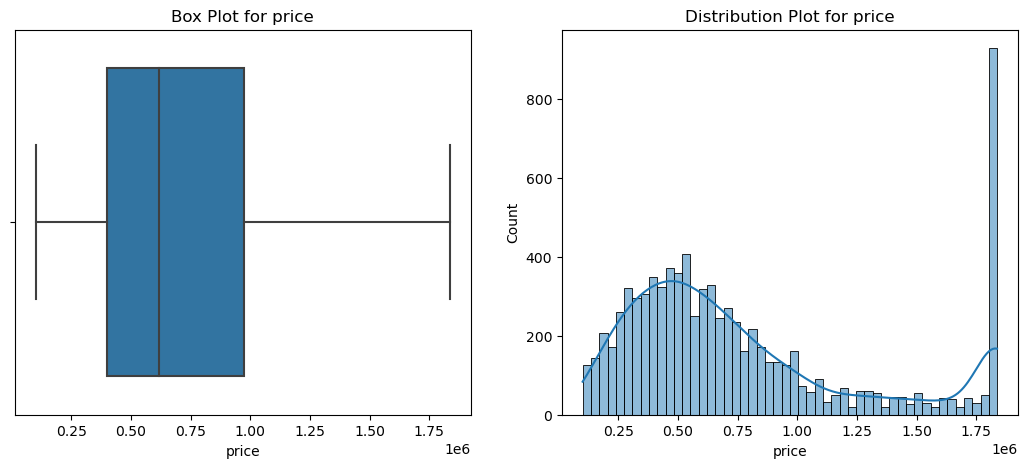

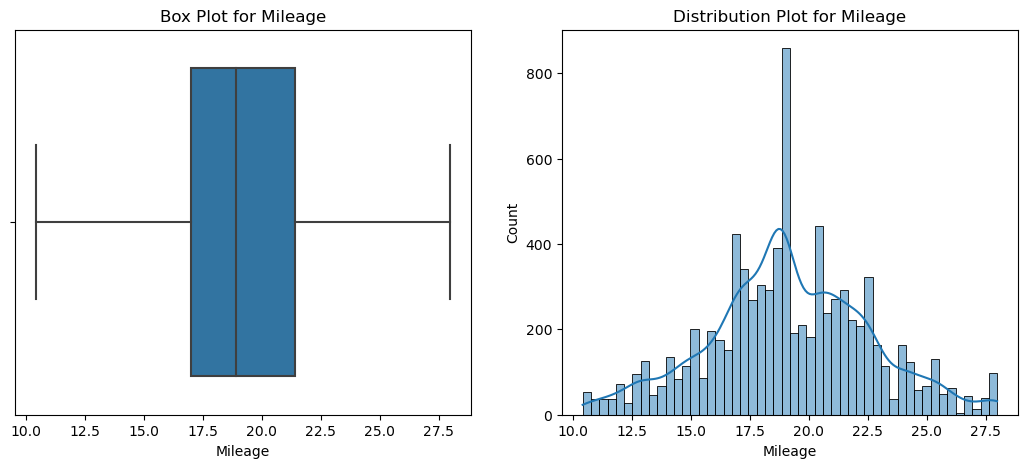

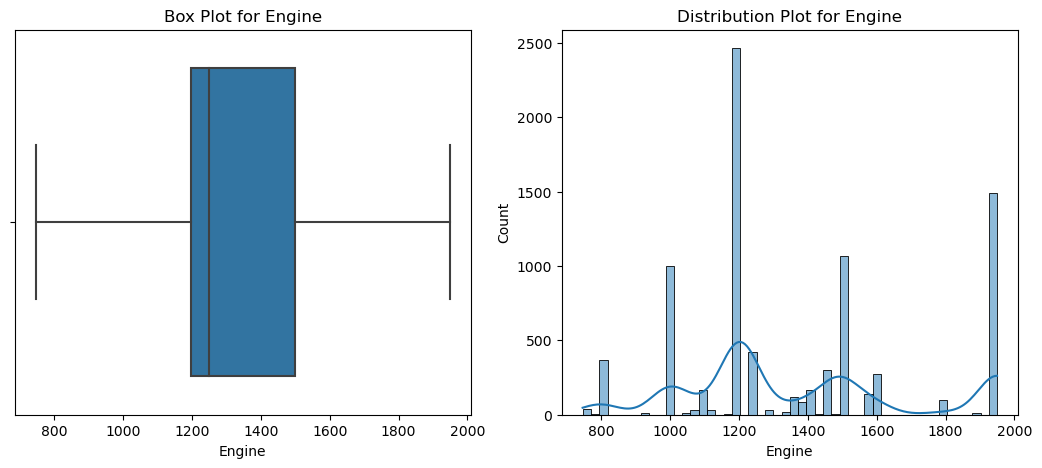

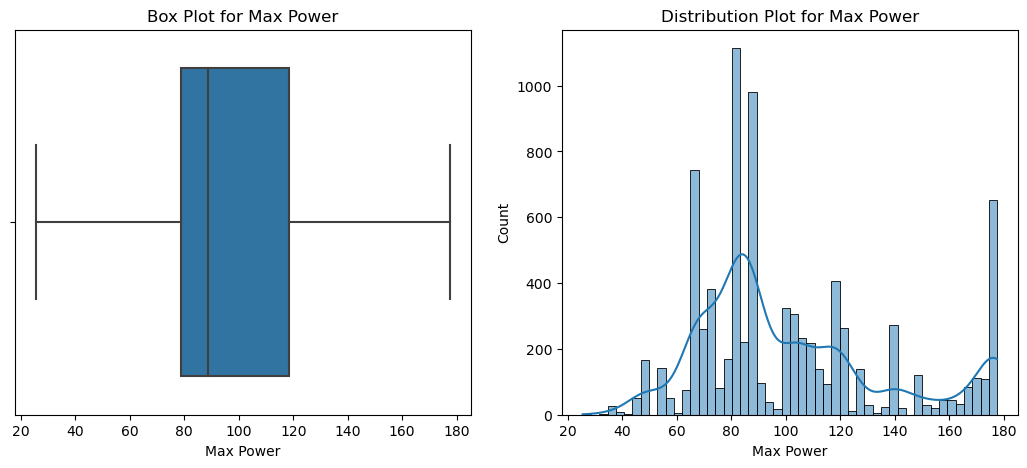

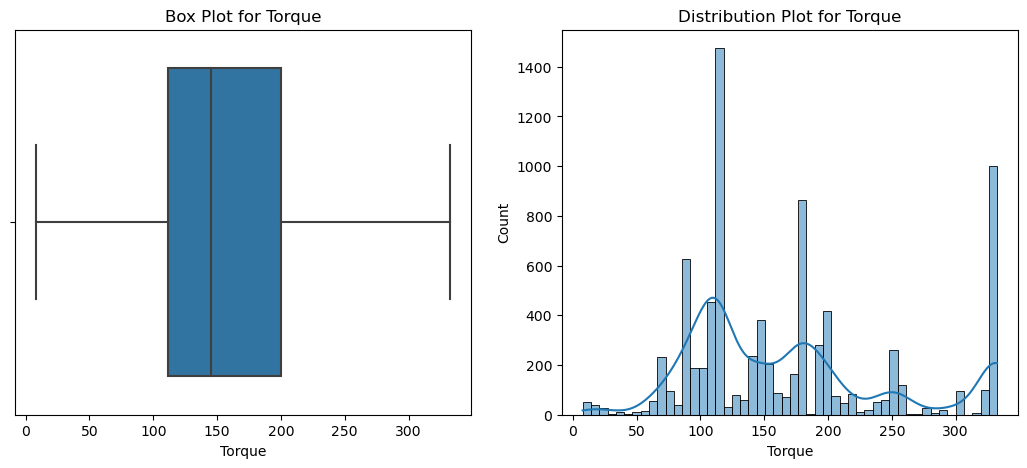

In [192]:
for i in ['Mileage_km','price','Mileage','Engine','Max Power','Torque',]:
    plot(final_car_df,i)

In [193]:
final_car_df.drop(['Car model','oem','variantName'],axis = 1 ,inplace = True)

In [194]:
final_car_df

,Fuel_Type,Body_Type,Mileage_km,Transmission type,Number ownwer,price,Mileage,Engine,Max Power,Torque,Seats,Age of car
0,Petrol,Hatchback,120000,Manual,3,400000.0,23.10,998.0,67.04,90.000000,5.0,9.000000
1,Petrol,SUV,32706,Manual,2,811000.0,17.00,1497.0,121.31,150.000000,5.0,6.000000
2,Petrol,Hatchback,11949,Manual,1,585000.0,23.84,1199.0,84.00,114.000000,5.0,6.000000
3,Petrol,Sedan,17794,Manual,1,462000.0,19.10,1197.0,81.86,113.750000,5.0,10.000000
4,Diesel,SUV,60000,Manual,1,790000.0,23.65,1248.0,88.50,200.000000,5.0,9.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1480,Petrol,Sedan,60000,Automatic,1,900000.0,18.00,1497.0,117.60,145.000000,5.0,7.000000
1481,Petrol,SUV,20000,Manual,1,950000.0,18.40,1197.0,81.86,115.000000,5.0,7.897525
1482,Petrol,Sedan,60000,Manual,1,418000.0,17.01,1591.0,121.30,154.900000,5.0,7.897525
1483,Diesel,SUV,38000,Manual,1,1195000.0,20.50,1582.0,126.20,178.504552,5.0,7.897525


In [195]:
final_car_df['Body_Type'].value_counts()

Body_Type
Hatchback        3567
SUV              2225
Sedan            2174
MUV               352
Minivans           23
Coupe              10
Pickup Trucks       6
Convertibles        6
                    4
Hybrids             1
Wagon               1
Name: count, dtype: int64

In [196]:
final_car_df['Body_Type'].isnull().sum()

0

In [197]:
#final_car_df['Car model'].nunique()

In [198]:
final_car_df['Body_Type'].value_counts()

Body_Type
Hatchback        3567
SUV              2225
Sedan            2174
MUV               352
Minivans           23
Coupe              10
Pickup Trucks       6
Convertibles        6
                    4
Hybrids             1
Wagon               1
Name: count, dtype: int64

In [199]:
final_car_df['Fuel_Type'].value_counts()

Fuel_Type
Petrol      5554
Diesel      2673
Cng           98
Electric      28
Lpg           16
Name: count, dtype: int64

# Feature Encoding: 
#Converting Categorical Columns into numerical using mapping method:

In [200]:
#final_car_df['oem'].nunique()

In [201]:
final_car_df['Body_Type_numeric'] = final_car_df['Body_Type'].map({
    'Hatchback': 0,
    'SUV': 1,
    'Sedan': 2,
    'MUV': 3,
    'Minivans': 4,
    'Coupe': 5,
    'Pickup Trucks': 6,
    'Convertibles': 7,
    '': 8,  # You may replace this with the appropriate numerical value for empty values
    'Hybrids': 9,
    'Wagon': 10
})


In [202]:
final_car_df['Fuel_Type_numeric'] = final_car_df['Fuel_Type'].map({
    'Petrol': 0,
    'Diesel': 1,
    'Cng': 2,
    'Electric': 3,
    'Lpg': 4
})


In [203]:
final_car_df['Transmission_numeric'] = final_car_df['Transmission type'].map({
    'Manual': 0,
    'Automatic': 1
})


In [204]:
final_car_df

,Fuel_Type,Body_Type,Mileage_km,Transmission type,Number ownwer,price,Mileage,Engine,Max Power,Torque,Seats,Age of car,Body_Type_numeric,Fuel_Type_numeric,Transmission_numeric
0,Petrol,Hatchback,120000,Manual,3,400000.0,23.10,998.0,67.04,90.000000,5.0,9.000000,0,0,0
1,Petrol,SUV,32706,Manual,2,811000.0,17.00,1497.0,121.31,150.000000,5.0,6.000000,1,0,0
2,Petrol,Hatchback,11949,Manual,1,585000.0,23.84,1199.0,84.00,114.000000,5.0,6.000000,0,0,0
3,Petrol,Sedan,17794,Manual,1,462000.0,19.10,1197.0,81.86,113.750000,5.0,10.000000,2,0,0
4,Diesel,SUV,60000,Manual,1,790000.0,23.65,1248.0,88.50,200.000000,5.0,9.000000,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,Petrol,Sedan,60000,Automatic,1,900000.0,18.00,1497.0,117.60,145.000000,5.0,7.000000,2,0,1
1481,Petrol,SUV,20000,Manual,1,950000.0,18.40,1197.0,81.86,115.000000,5.0,7.897525,1,0,0
1482,Petrol,Sedan,60000,Manual,1,418000.0,17.01,1591.0,121.30,154.900000,5.0,7.897525,2,0,0
1483,Diesel,SUV,38000,Manual,1,1195000.0,20.50,1582.0,126.20,178.504552,5.0,7.897525,1,1,0


In [205]:
final_car_df.drop(['Fuel_Type','Body_Type','Transmission type'],axis = 1,inplace = True)

In [206]:
final_car_df.dtypes

Mileage_km                int64
Number ownwer             int64
price                   float64
Mileage                 float64
Engine                  float64
Max Power               float64
Torque                  float64
Seats                   float64
Age of car              float64
Body_Type_numeric         int64
Fuel_Type_numeric         int64
Transmission_numeric      int64
dtype: object

In [220]:

# convert to float to numerical
final_car_df['Age of car'] = final_car_df['Age of car'].astype('int64')
final_car_df['price'] = final_car_df['price'].astype('int64')
final_car_df['Mileage'] = final_car_df['Mileage'].astype('int64')
final_car_df['Engine'] = final_car_df['Engine'].astype('int64')
final_car_df['Seats'] = final_car_df['Seats'].astype('int64')
final_car_df['Max Power'] = final_car_df['Max Power'].astype('int64')
final_car_df['Torque'] = final_car_df['Torque'].astype('int64')
final_car_df

,Mileage_km,Number ownwer,price,Mileage,Engine,Max Power,Torque,Seats,Age of car,Body_Type_numeric,Fuel_Type_numeric,Transmission_numeric
0,120000,3,400000,23,998,67,90,5,9,0,0,0
1,32706,2,811000,17,1497,121,150,5,6,1,0,0
2,11949,1,585000,23,1199,84,114,5,6,0,0,0
3,17794,1,462000,19,1197,81,113,5,10,2,0,0
4,60000,1,790000,23,1248,88,200,5,9,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1480,60000,1,900000,18,1497,117,145,5,7,2,0,1
1481,20000,1,950000,18,1197,81,115,5,7,1,0,0
1482,60000,1,418000,17,1591,121,154,5,7,2,0,0
1483,38000,1,1195000,20,1582,126,178,5,7,1,1,0


In [208]:
final_car_df.dtypes

Mileage_km              int64
Number ownwer           int64
price                   int64
Mileage                 int64
Engine                  int64
Max Power               int64
Torque                  int64
Seats                   int64
Age of car              int64
Body_Type_numeric       int64
Fuel_Type_numeric       int64
Transmission_numeric    int64
dtype: object

# Model Building:

In [209]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import pickle

In [210]:
X = final_car_df.drop('price', axis=1)  
y = final_car_df['price'] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)


y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)


print("R-squared (R2) Score - Training Set:", r2_train)
print("R-squared (R2) Score - Testing Set:", r2_test)

R-squared (R2) Score - Training Set: 0.6372394723439567
R-squared (R2) Score - Testing Set: 0.6550580550913073


In [212]:


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestRegressor model
RFR = RandomForestRegressor() 
RFR = RandomForestRegressor(n_estimators= 50,random_state= 0)
# Train the model

RFR.fit(X_train,y_train)
y_train_pred = RFR.predict(X_train)
y_test_pred =  RFR.predict(X_test)

# Evaluate the model test and trainig score 
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test,y_test_pred)
r2_train, r2_test
     

(0.9664422444406221, 0.767657373691037)

In [ ]:
#  RandomForestRegressor  have good testing accuracy, but in training accuracy is overfitting.



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [25, 50, 75, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Perform GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Make predictions with the best model
best_model = grid_search.best_estimator_
y_test_pred_best = best_model.predict(X_test)


In [213]:
#GridsearchCV is a cross validation function

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 42)
X_train.shape,X_test.shape

RFR = RandomForestRegressor()

Hyper_model= RandomForestRegressor(max_depth= 20 ,max_features='log2' ,min_samples_leaf=1, min_samples_split=2,n_estimators =50)

# fitting the model: 

Hyper_model.fit(X_train,y_train)

y_pred_train = Hyper_model.predict(X_train)
y_pred_test = Hyper_model.predict(X_test)

r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)

r2_train,r2_test

(0.9651792174812217, 0.7730279618826168)

In [214]:

X_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 42)
X_train.shape,x_test.shape

RFR = RandomForestRegressor()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 42)
X_train.shape,X_test.shape

RFR = RandomForestRegressor()

Hyper_model= RandomForestRegressor(max_depth= 20 ,max_features='log2' ,min_samples_leaf=1, min_samples_split=2,n_estimators =50)

# fitting the model: 

Hyper_model.fit(X_train,y_train)

y_pred_train = Hyper_model.predict(X_train)
y_pred_test = Hyper_model.predict(X_test)

r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)

r2_train,r2_test

# Model Evaluation:

Hyper_model.fit(X_train,y_train)

y_pred_train = Hyper_model.predict(X_train)
y_pred_test = Hyper_model.predict(X_test)                      
print('Mean Squared Error:' ,mean_squared_error(y_test,y_pred_test))
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred_test))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_pred_test)))
print(r2_score(y_test,y_pred_test))

Mean Squared Error: 59355452074.124016
Mean Absolute Error: 141378.40541235887
Root Mean Squared Error: 243629.74382066738
0.7733147047736064


In [215]:
user_data = np.array([[120000,3,23,998,67,90,5,9,0,0,0]])
y_p = Hyper_model.predict(user_data)
print(y_p[0])

399277.13712080935


In [216]:
import pickle
# save the regression model by using pickle

with open("C:\\Users\\User\\OneDrive\\Desktop\\fair_project\\car_dehko_model.pkl", 'wb') as f:
    pickle.dump(Hyper_model, f)


In [217]:
# Load the model
with open("C:\\Users\\User\\OneDrive\\Desktop\\fair_project\\car_dehko_model.pkl", 'rb') as f:
    model = pickle.load(f)


In [219]:
# load pickle model to predict the status (like Trained brain).
user_data = np.array([[120000,3,23,998,67,90,5,9,0,0,0]])
y_p = model.predict(user_data)
print(y_p[0])

399277.13712080935
